/Users/a071887/pdip/venv/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


<IPython.core.display.Javascript object>


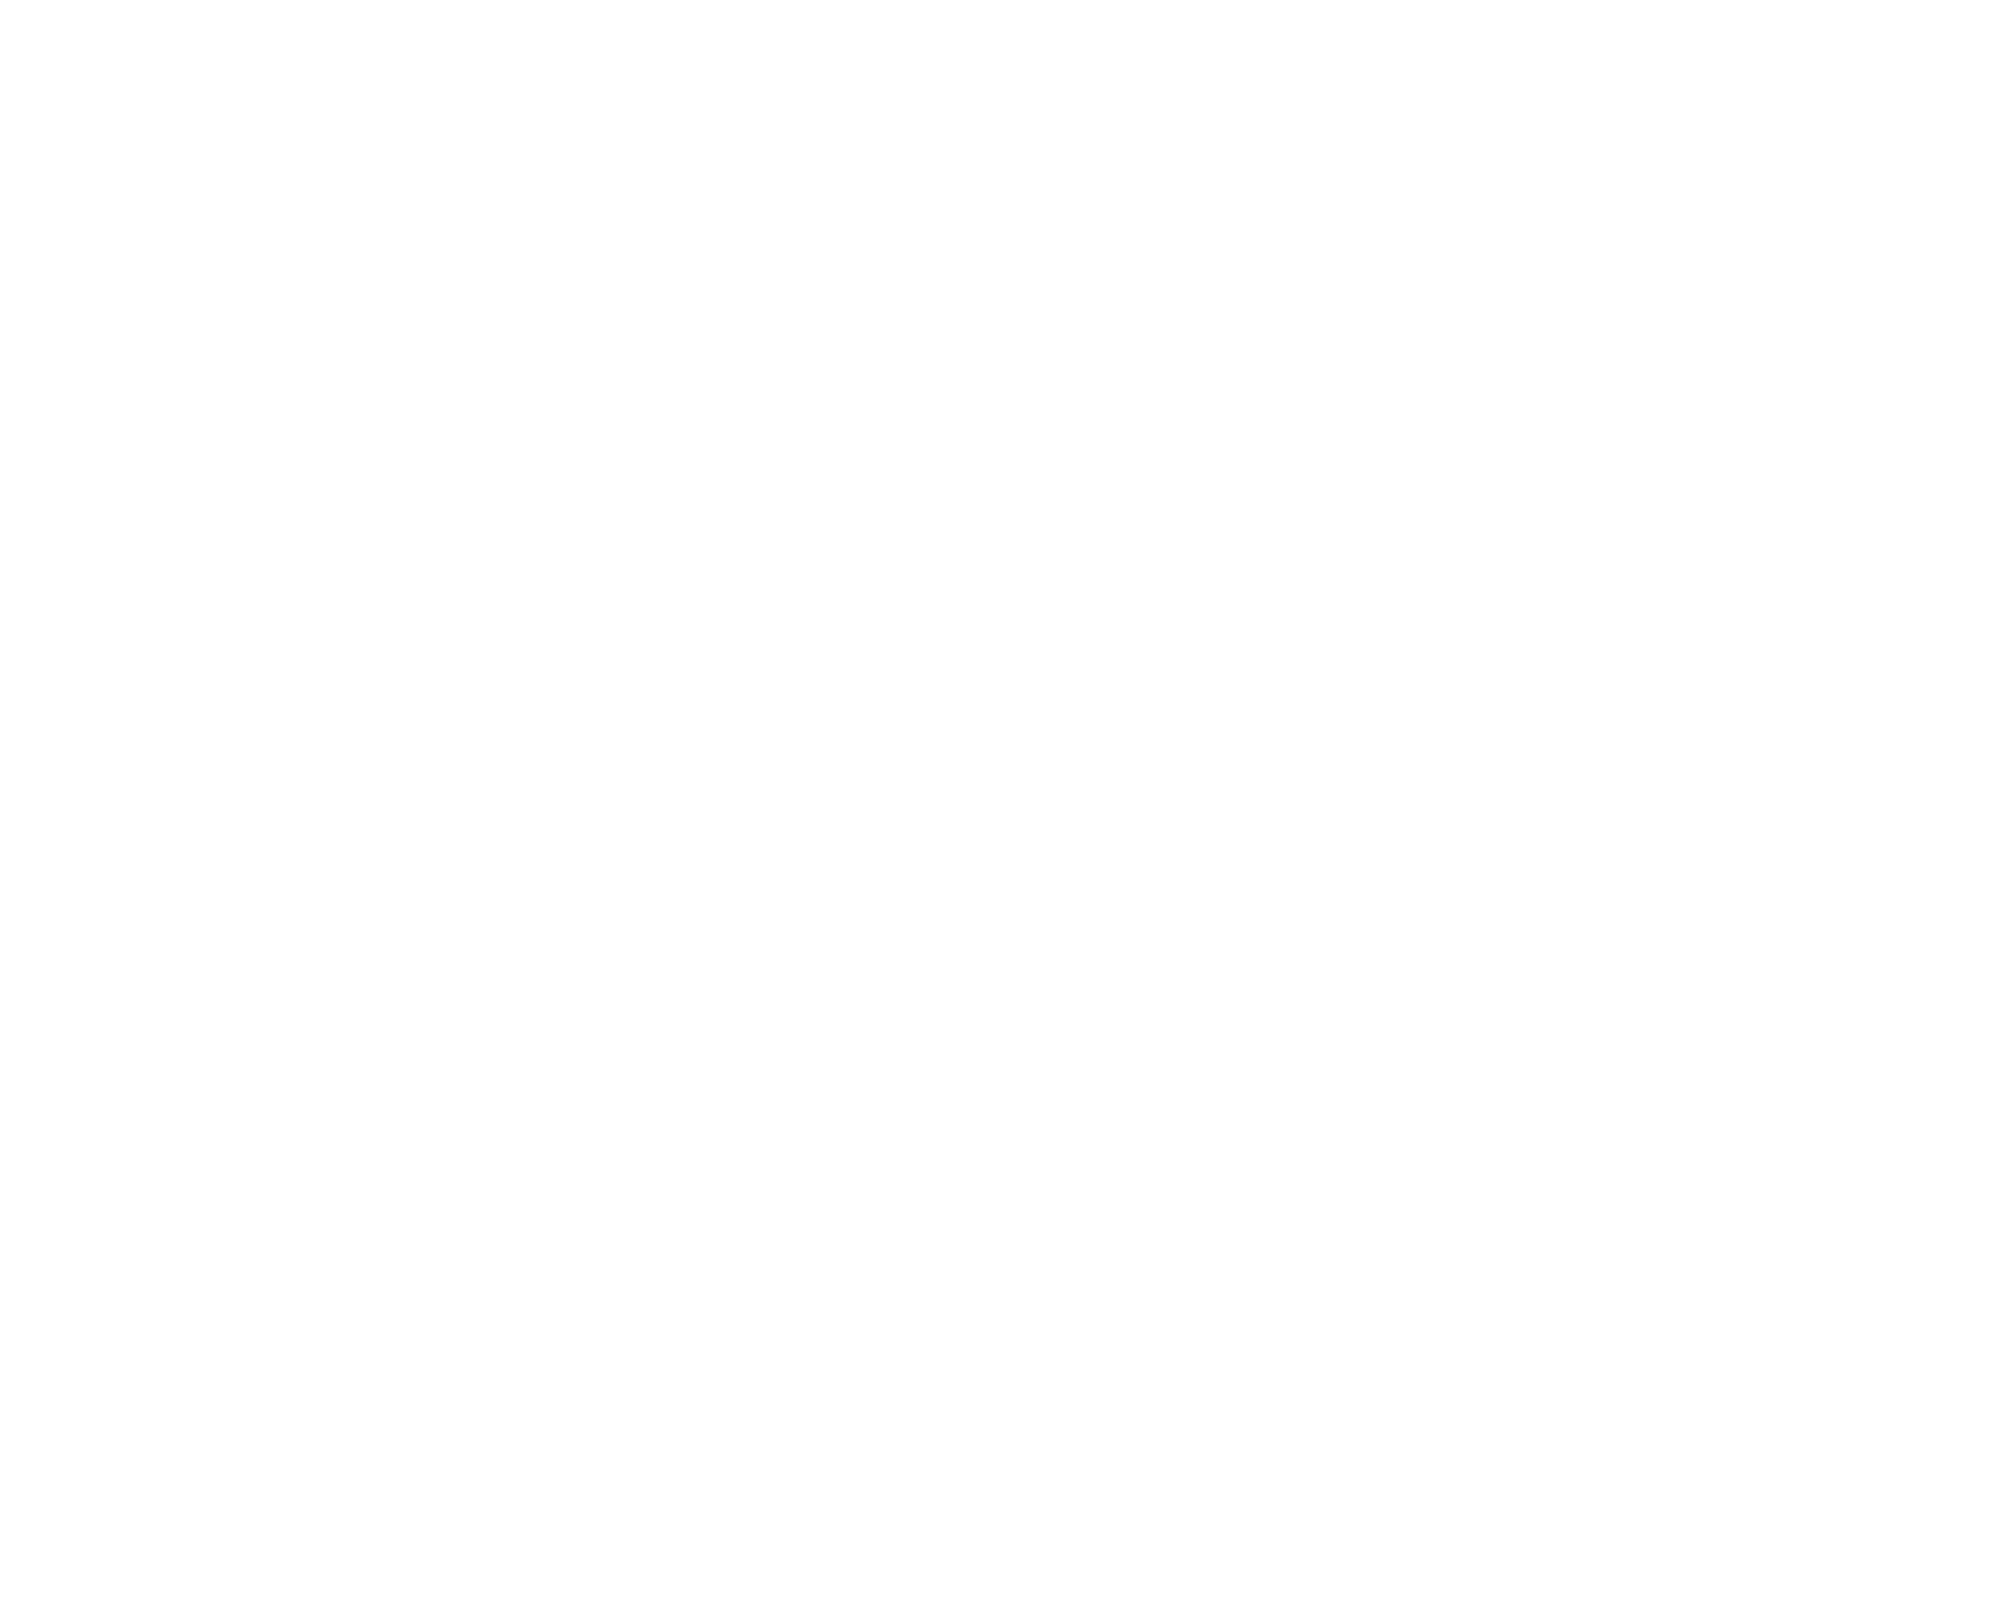

/Users/a071887/pdip/venv/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,
/Users/a071887/pdip/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


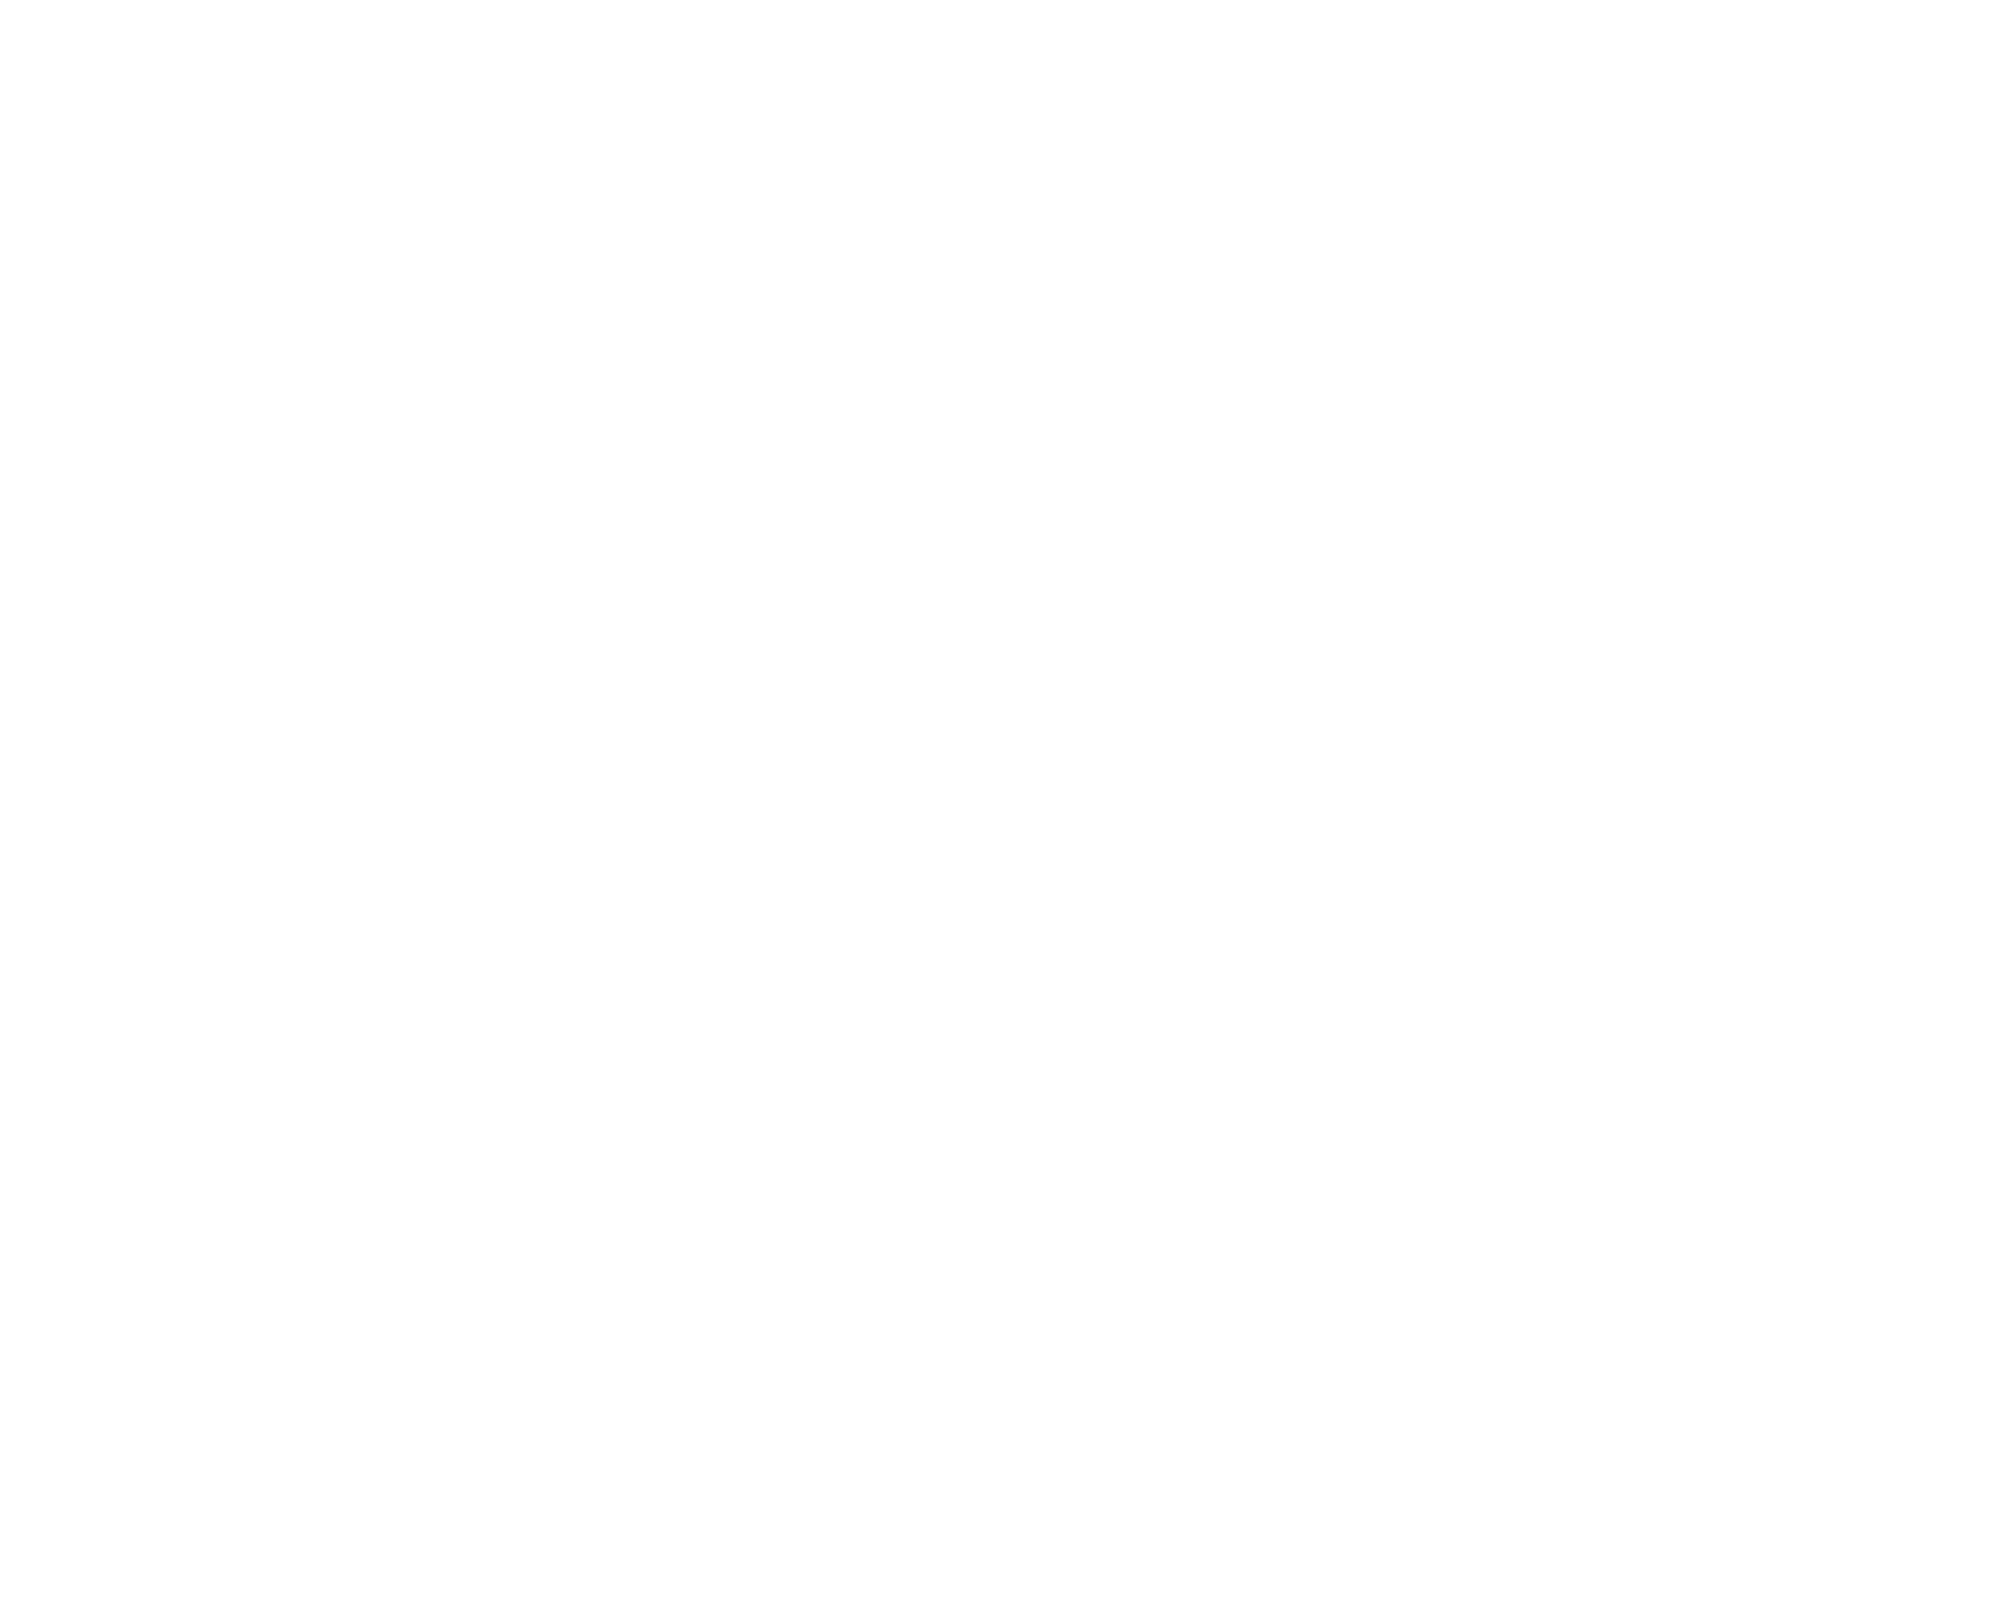

<IPython.core.display.Javascript object>


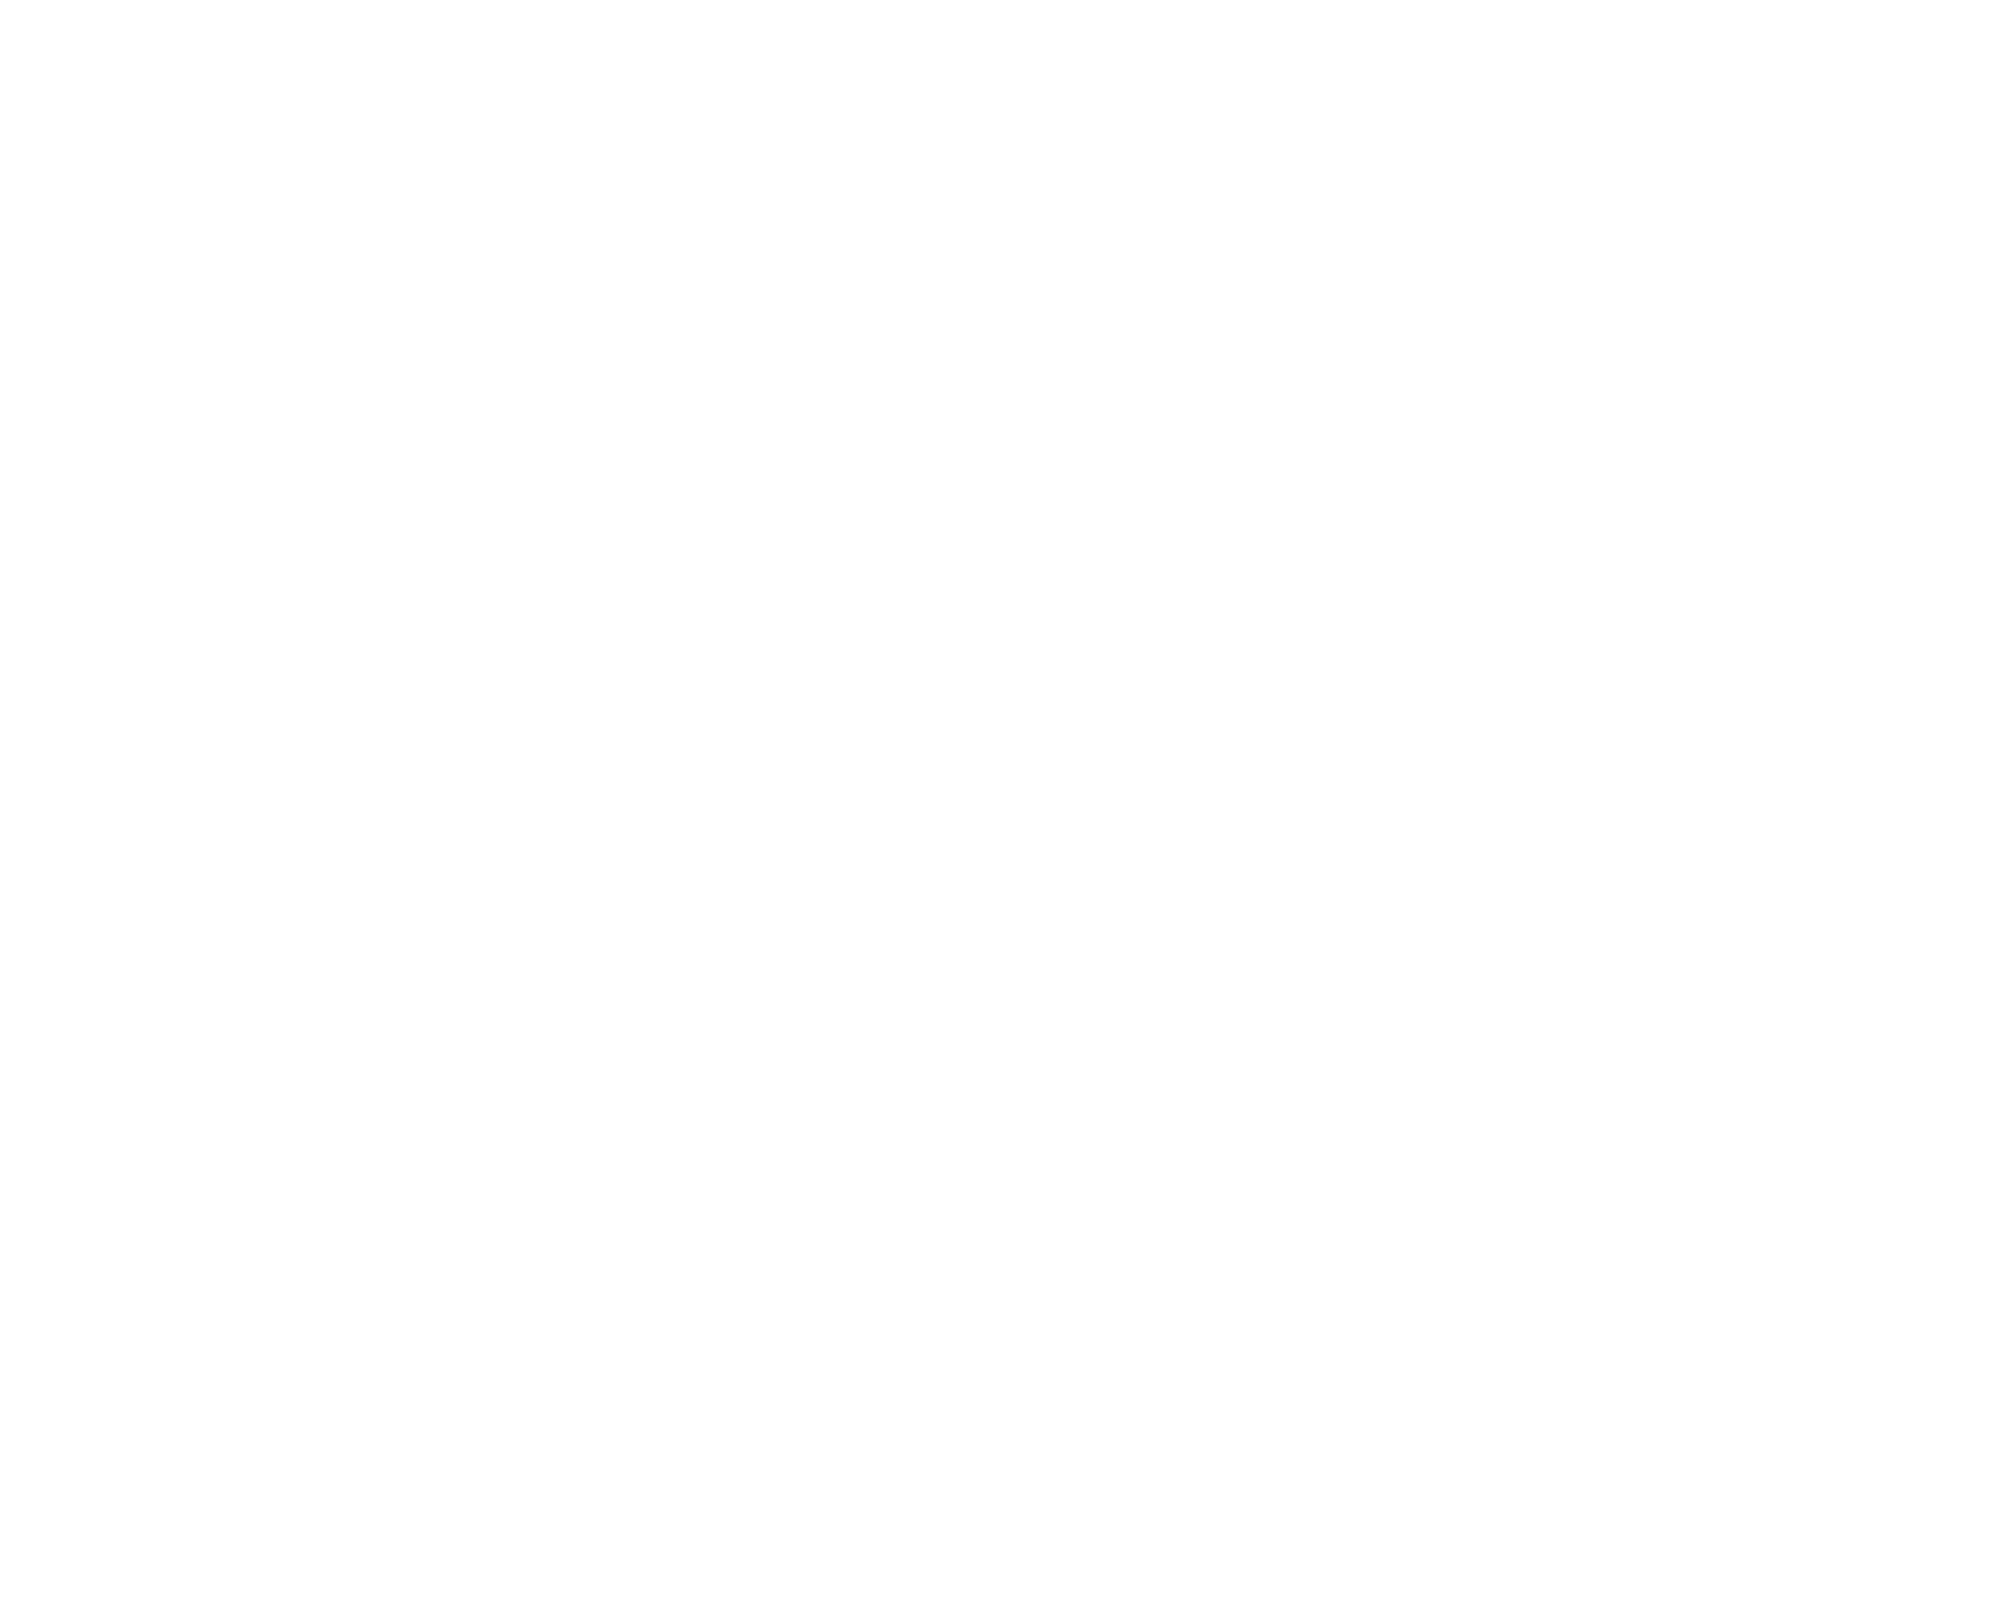

<IPython.core.display.Javascript object>


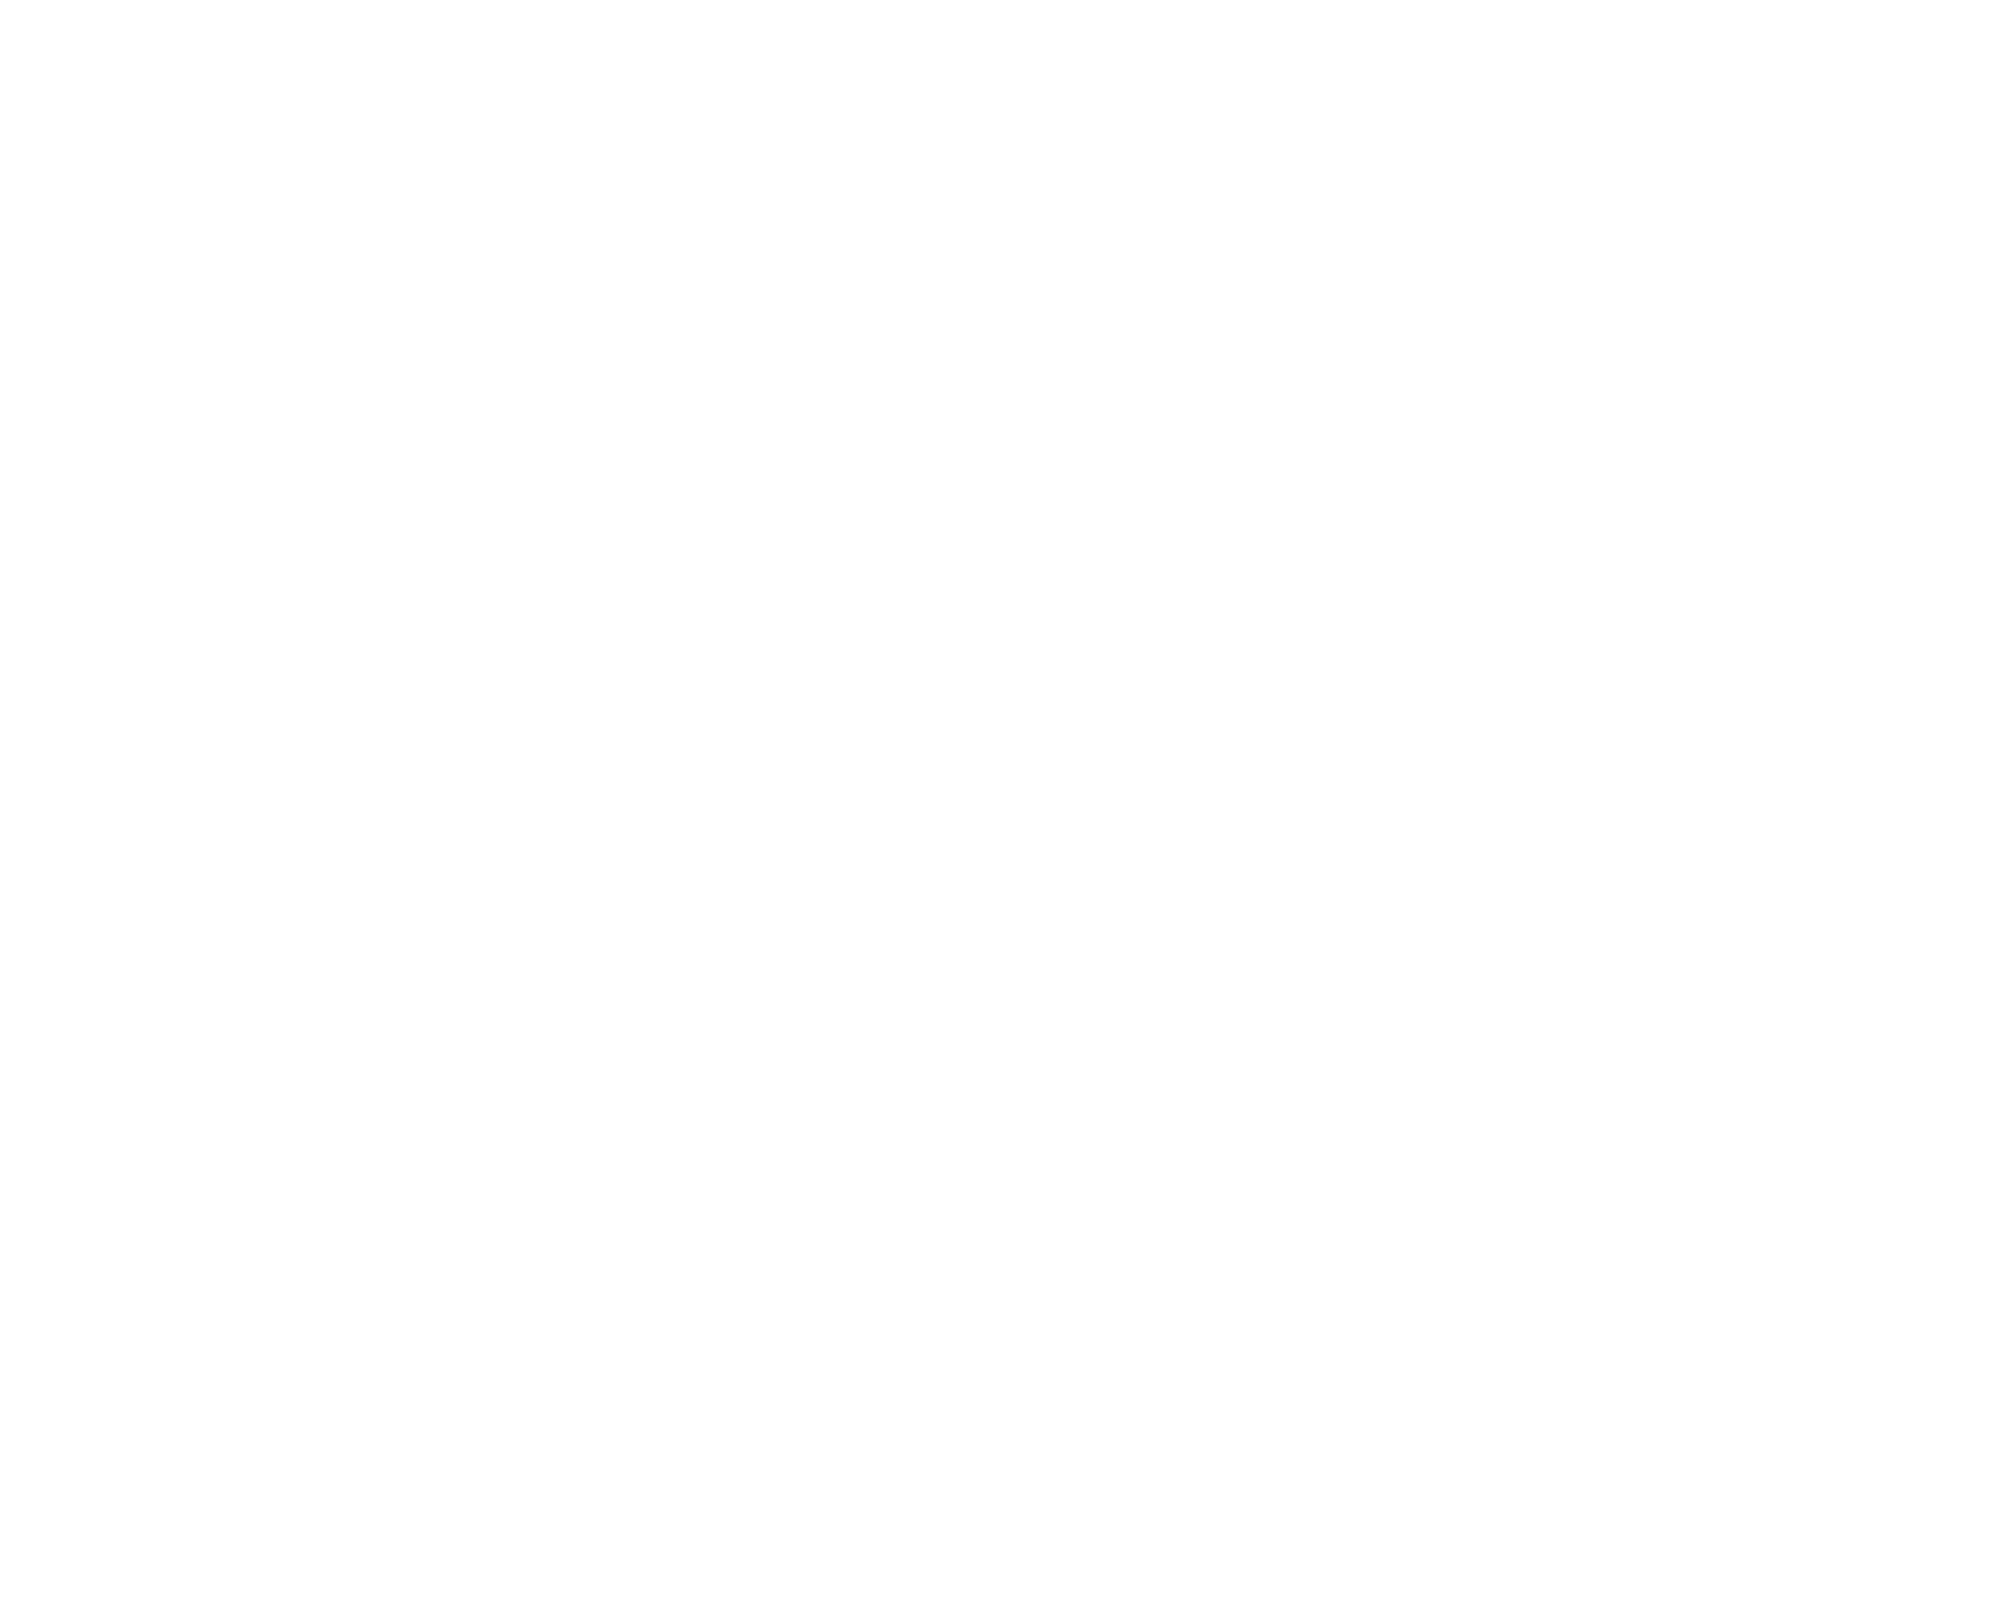

<IPython.core.display.Javascript object>


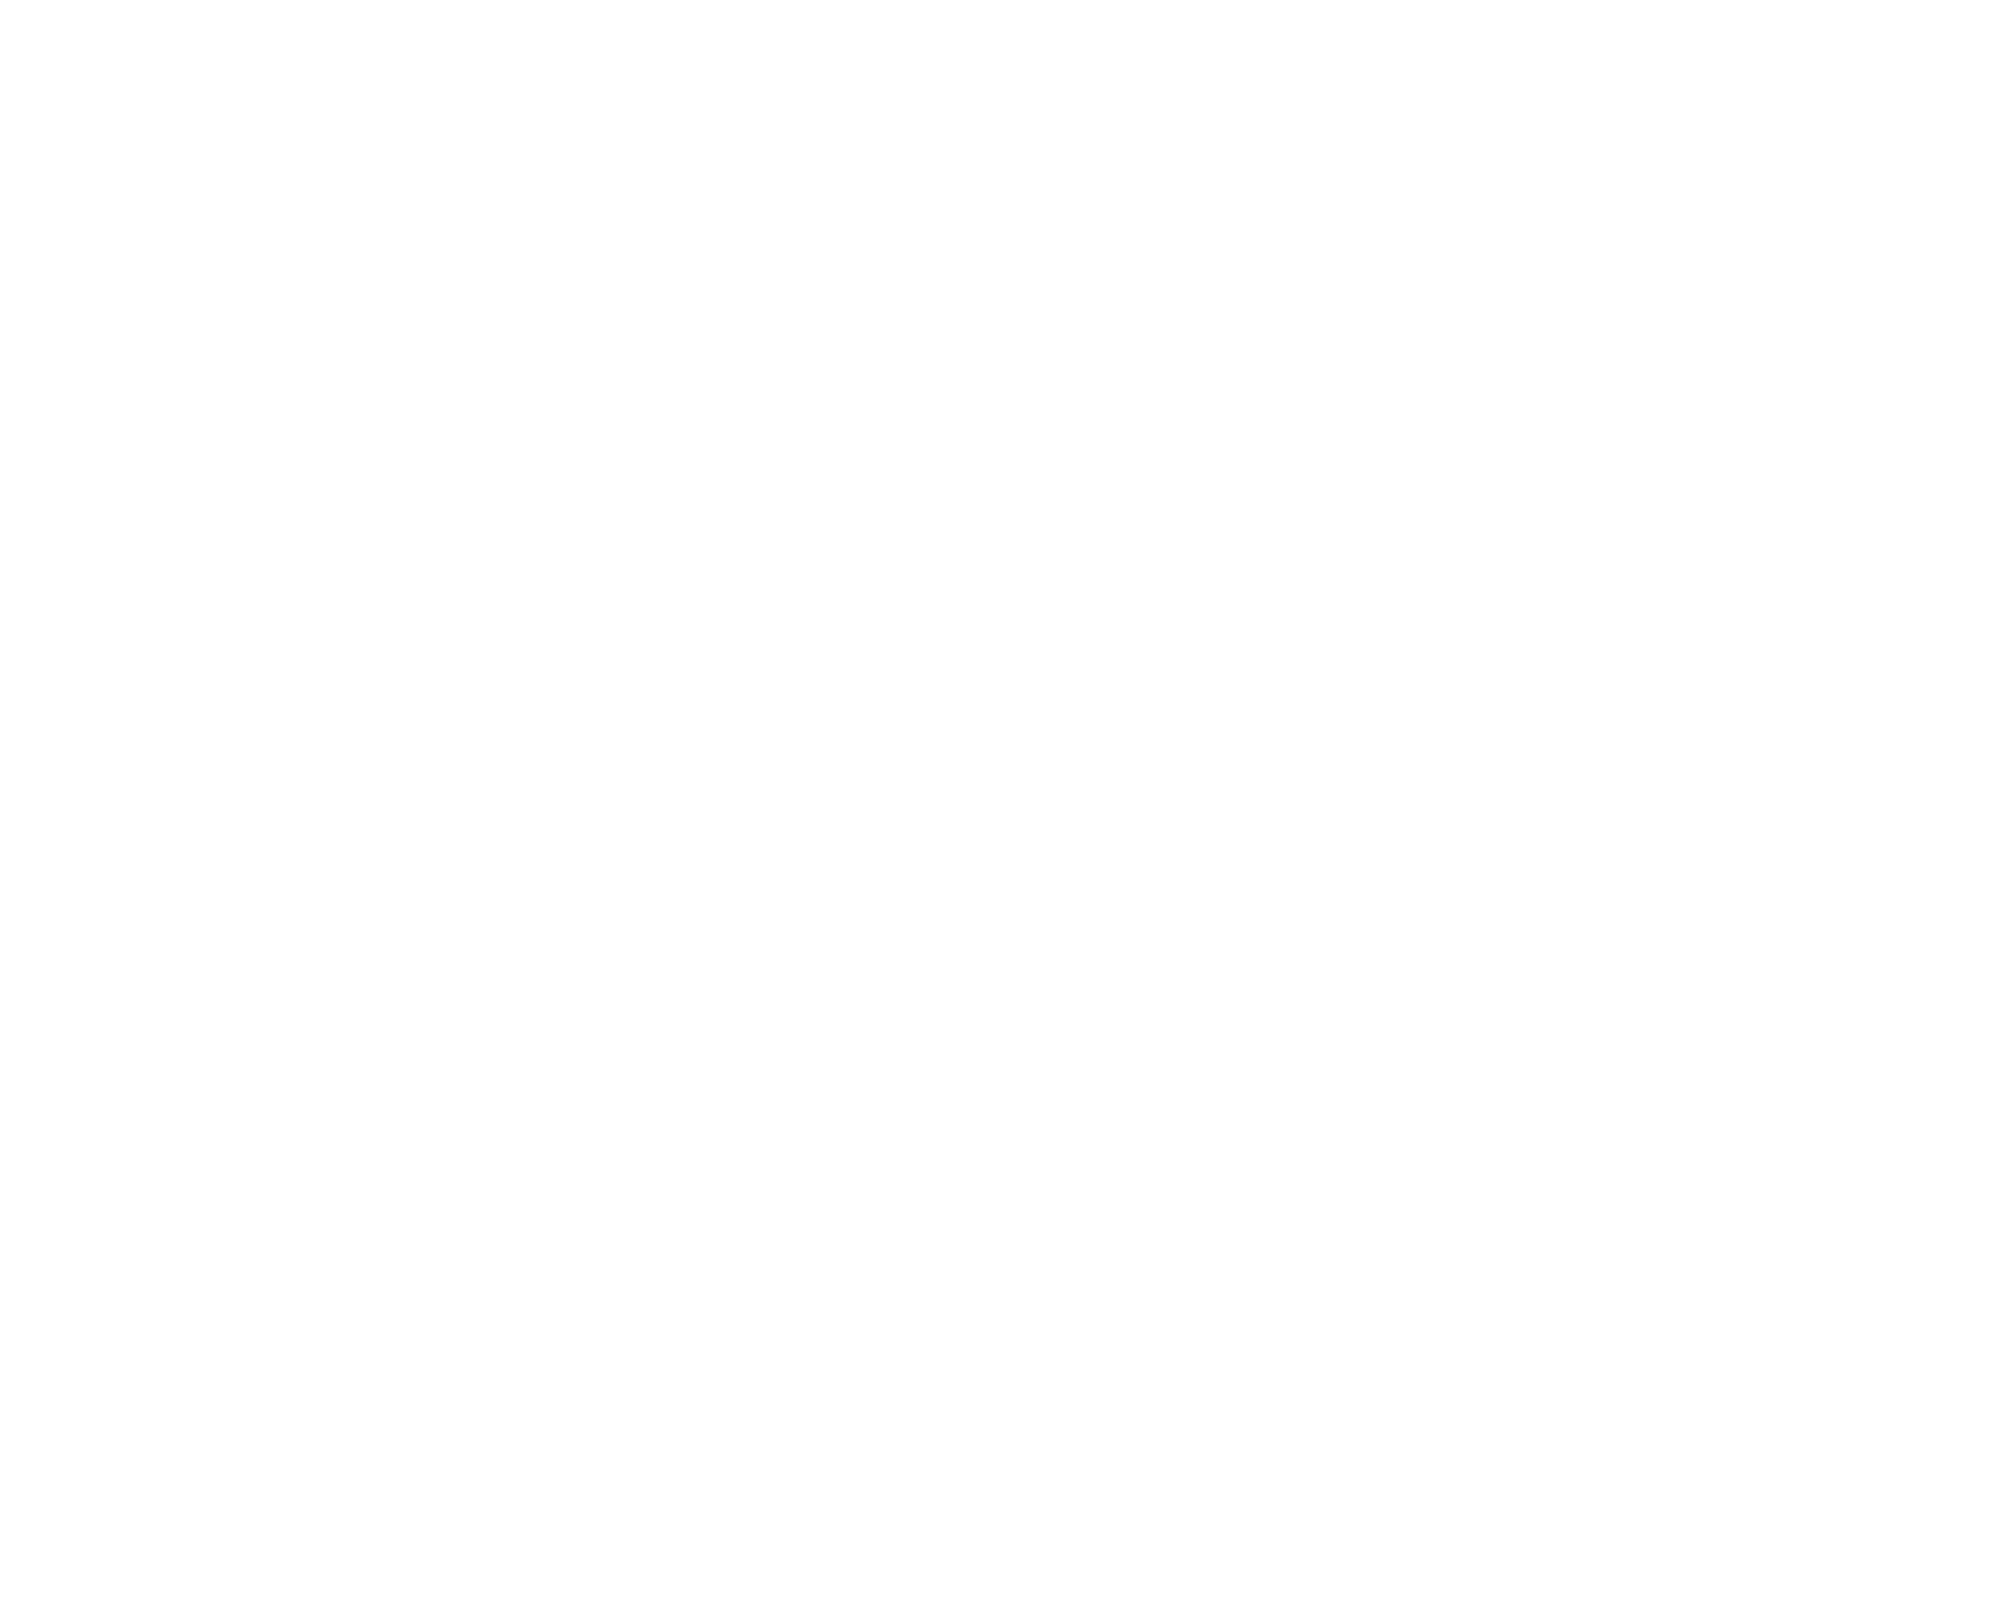

<IPython.core.display.Javascript object>


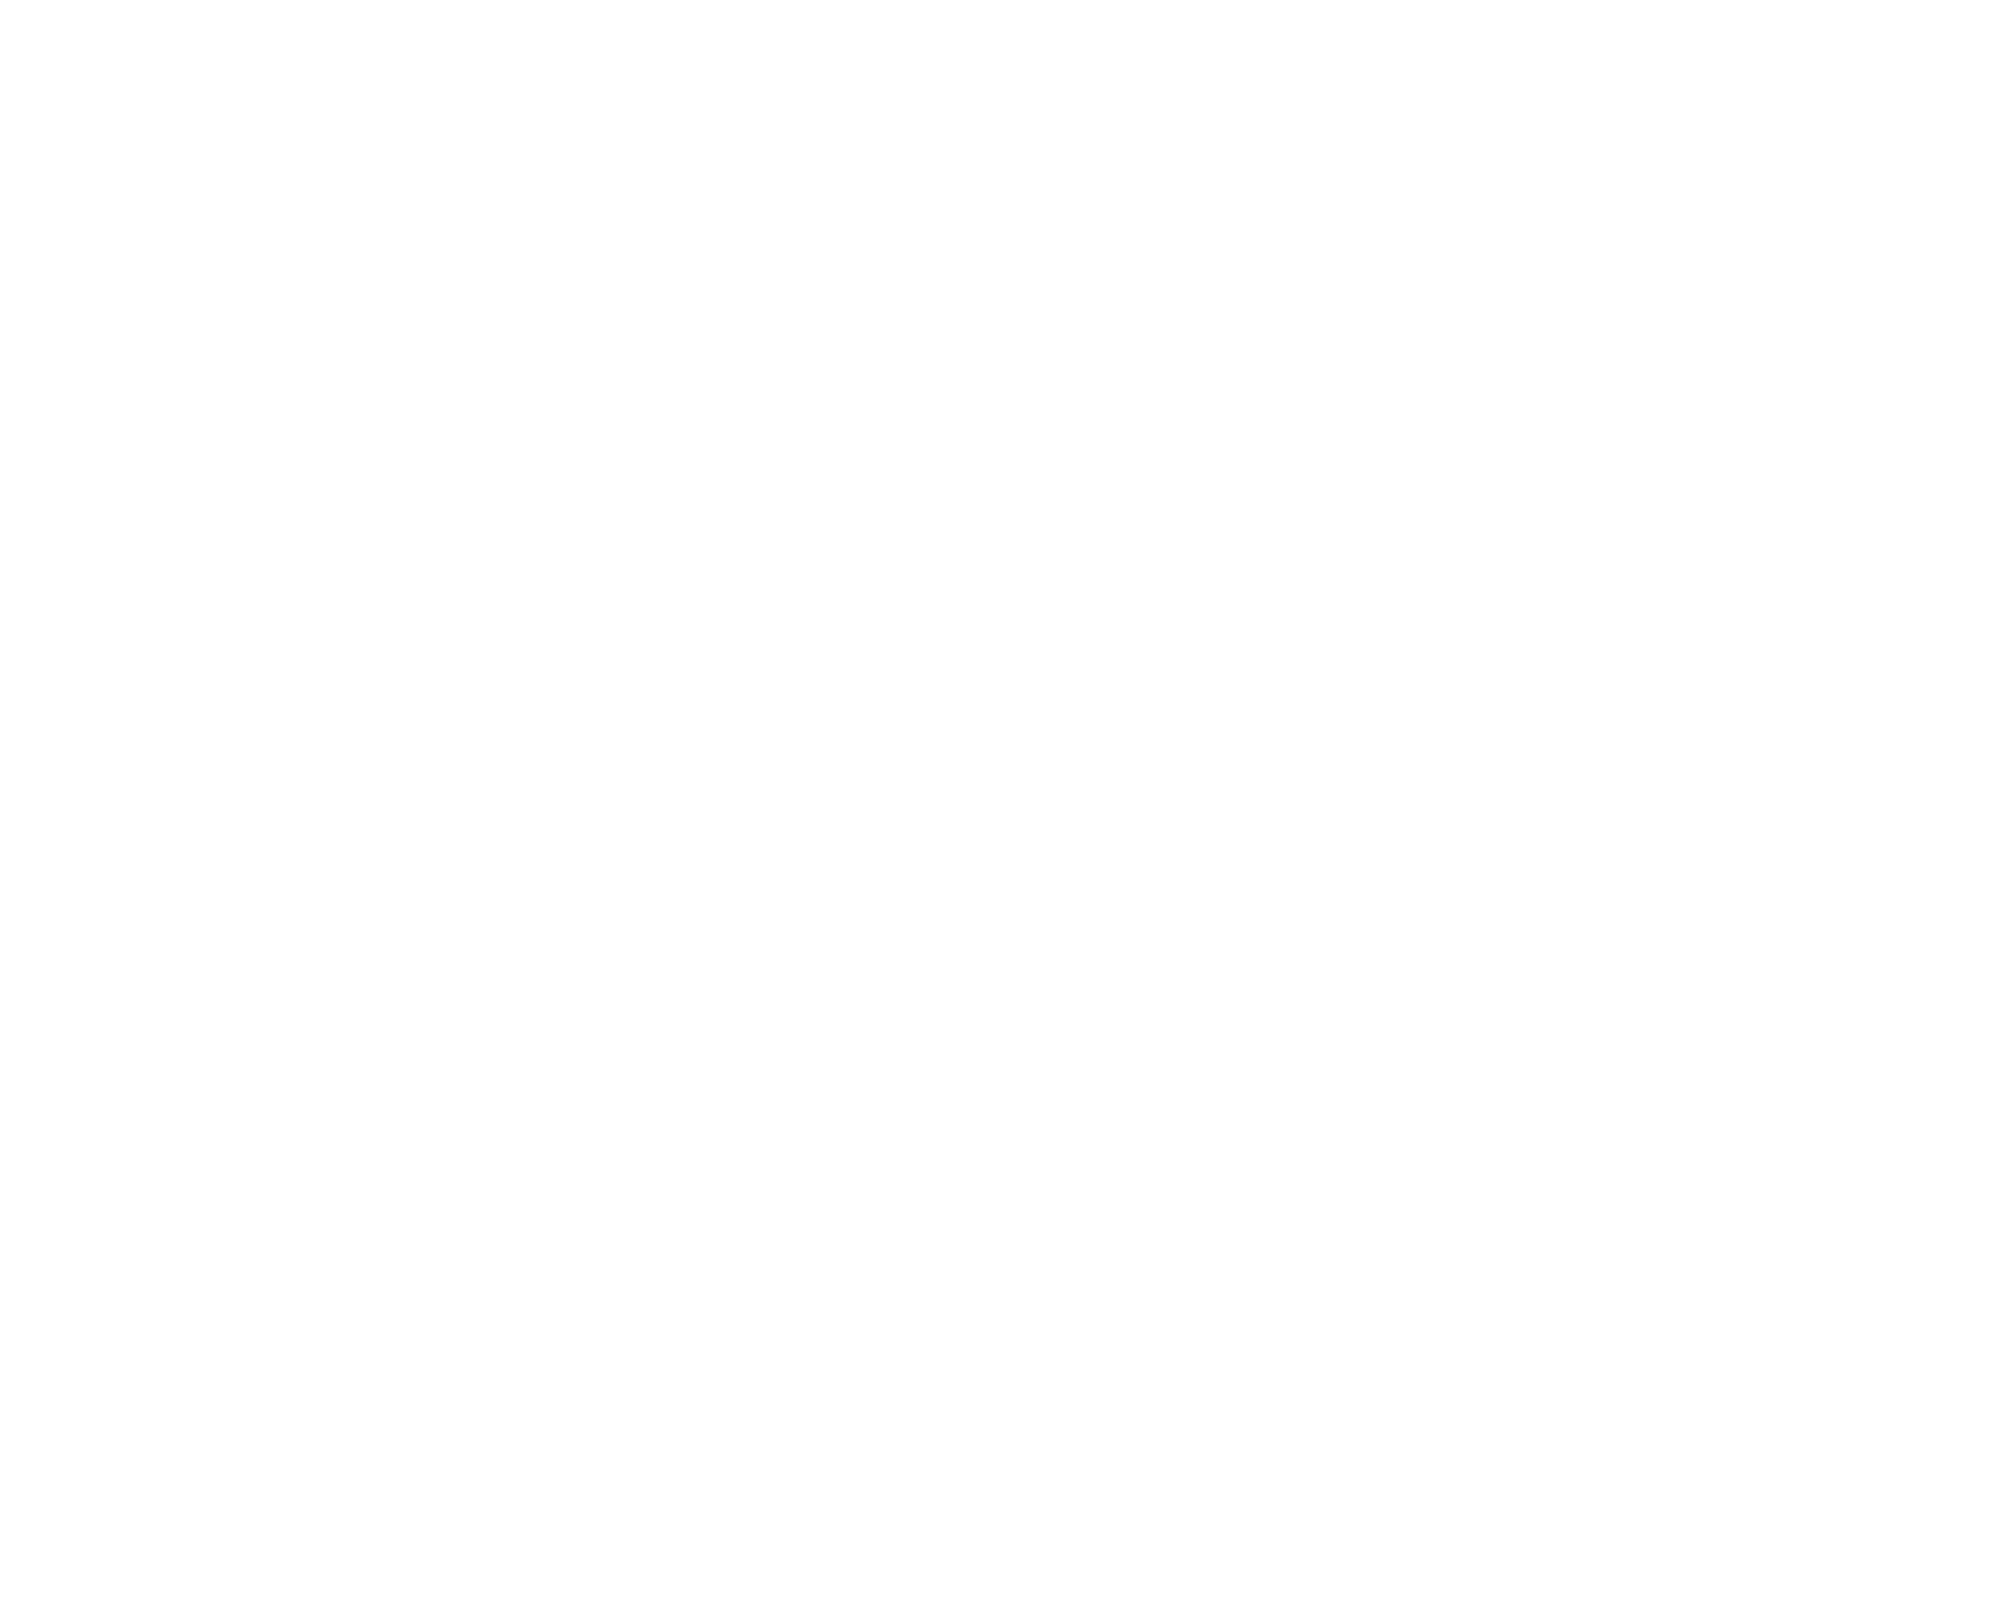

<IPython.core.display.Javascript object>


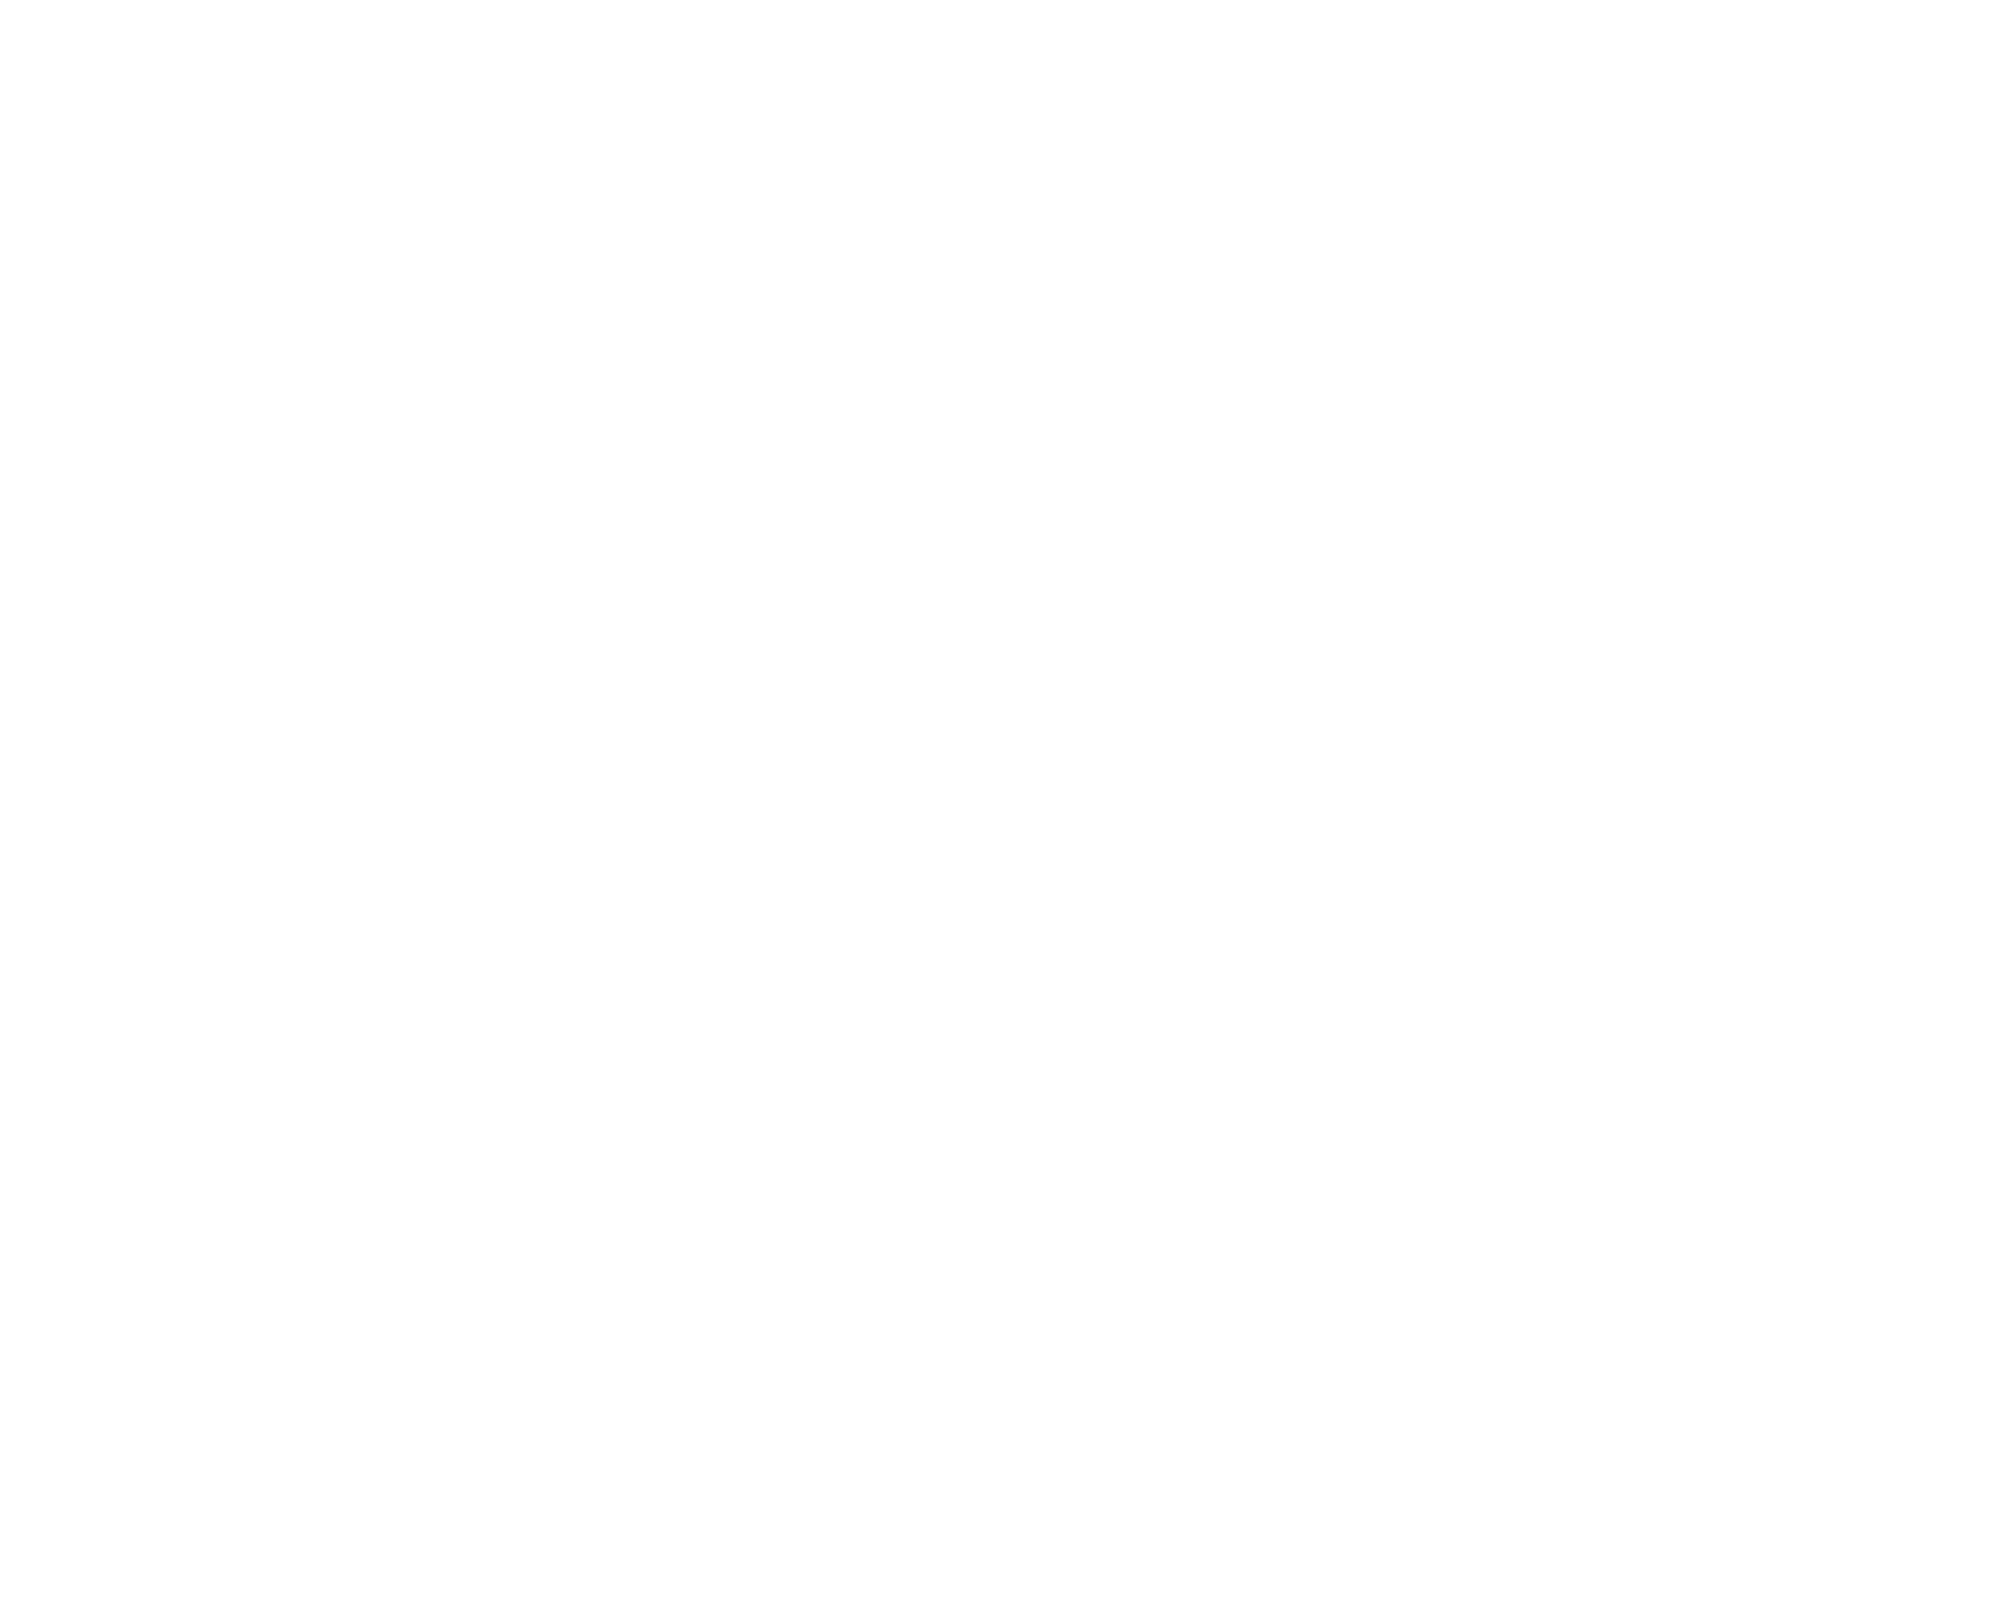

<IPython.core.display.Javascript object>


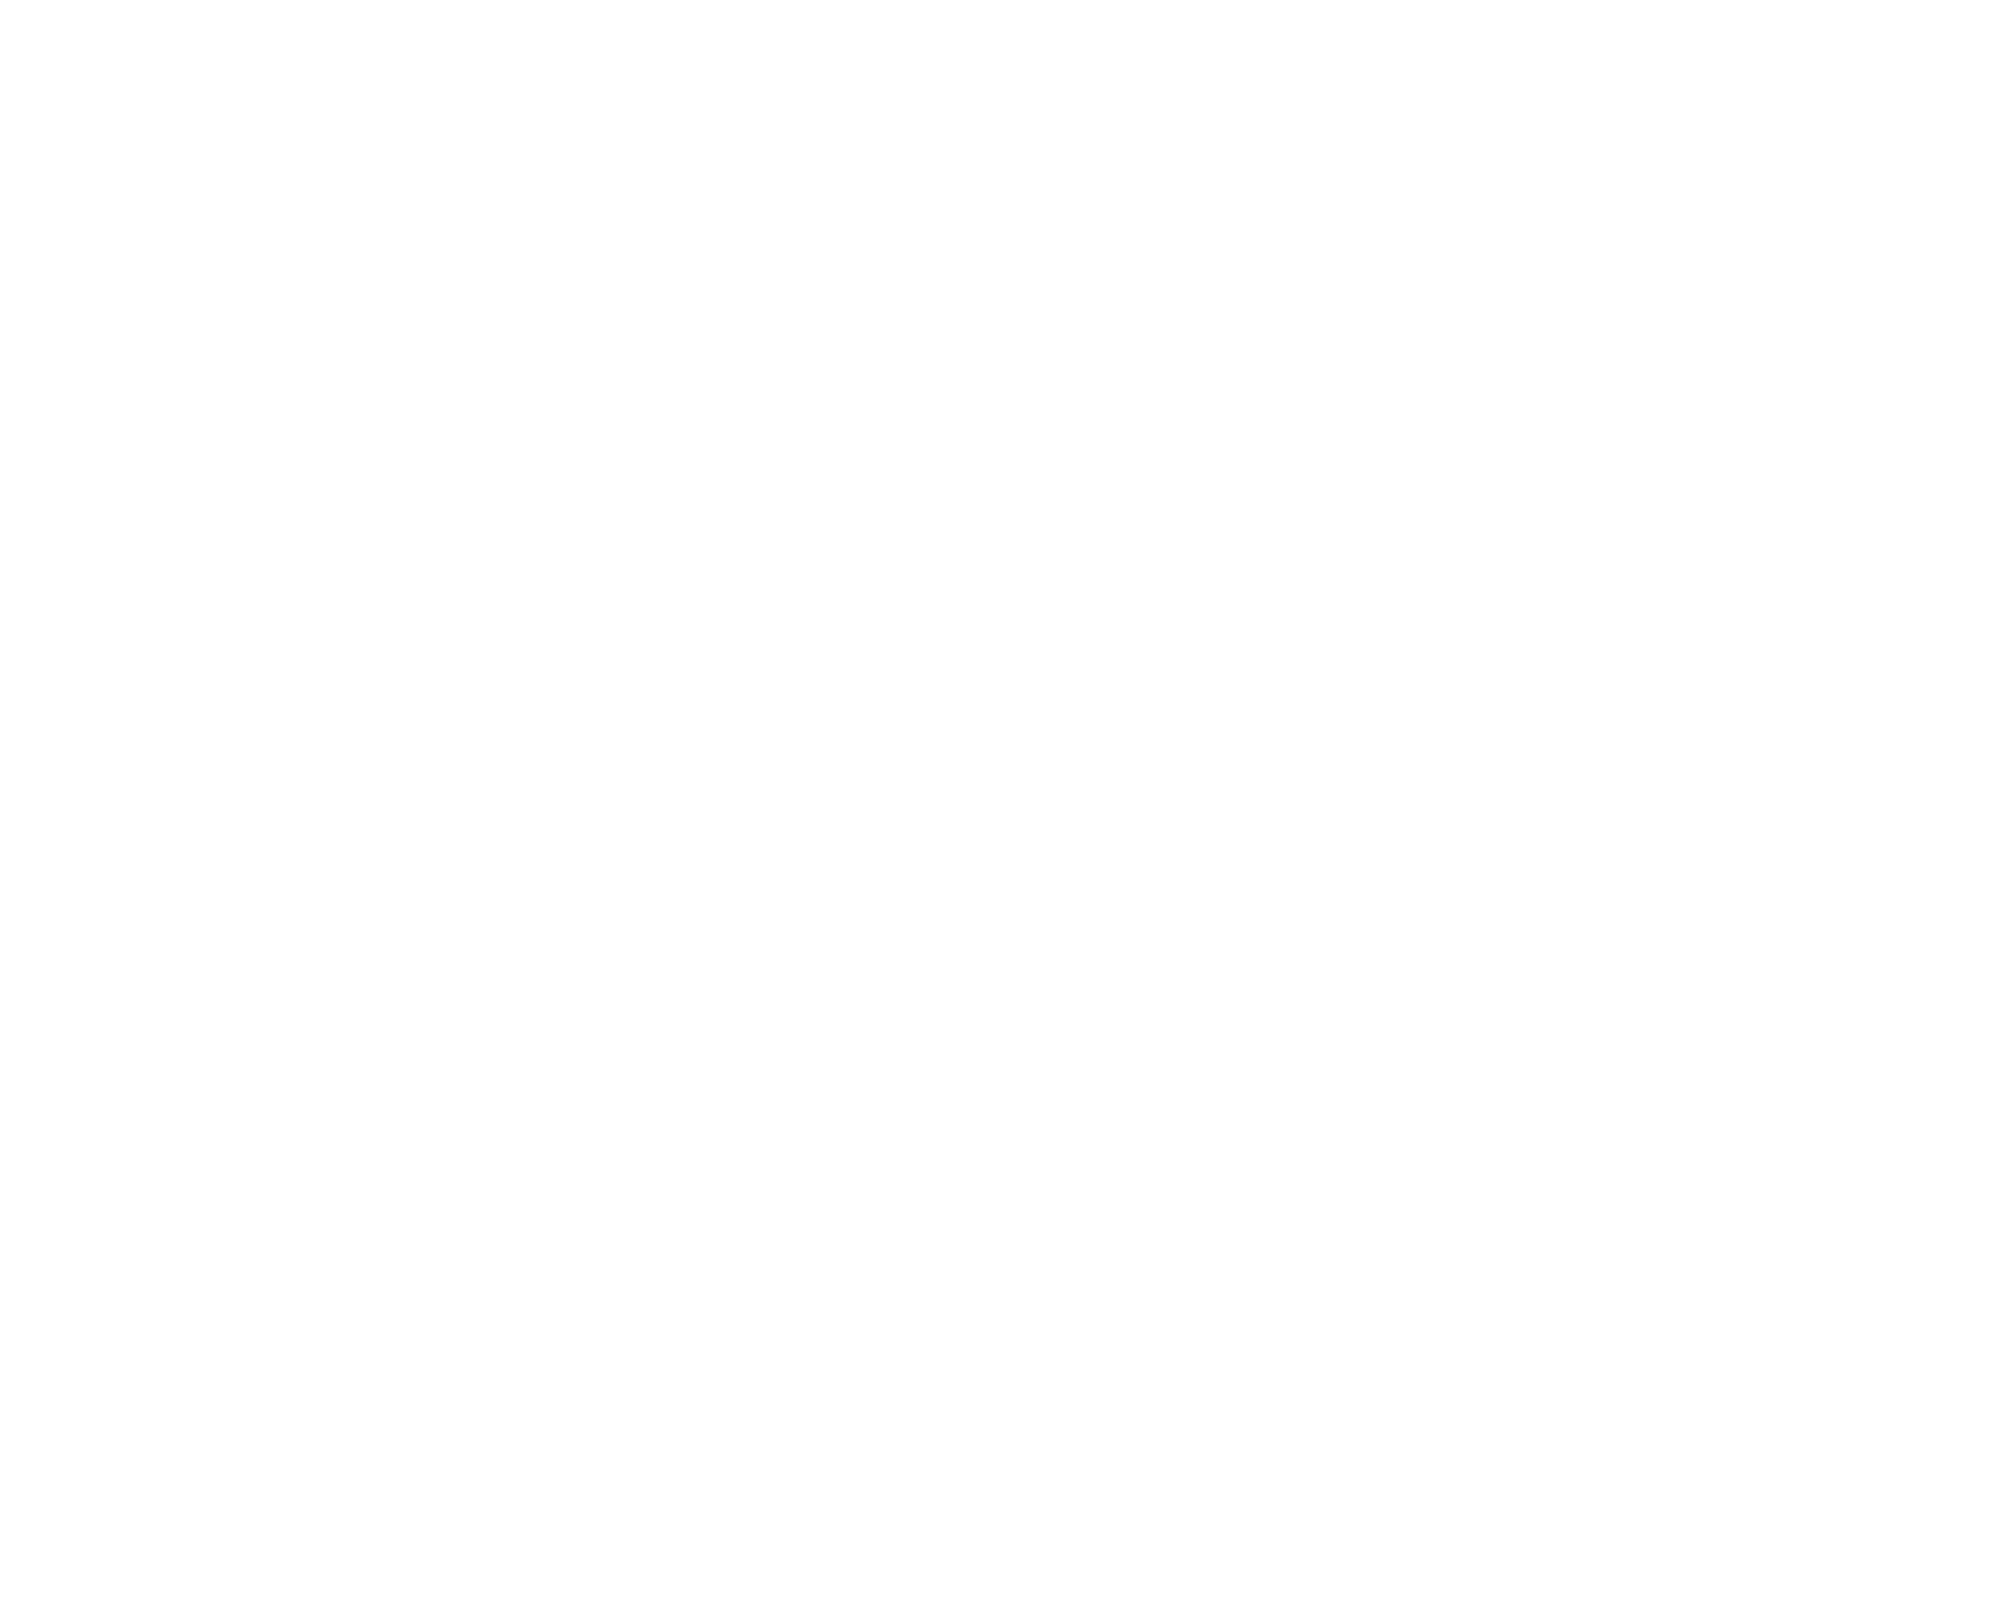

<IPython.core.display.Javascript object>


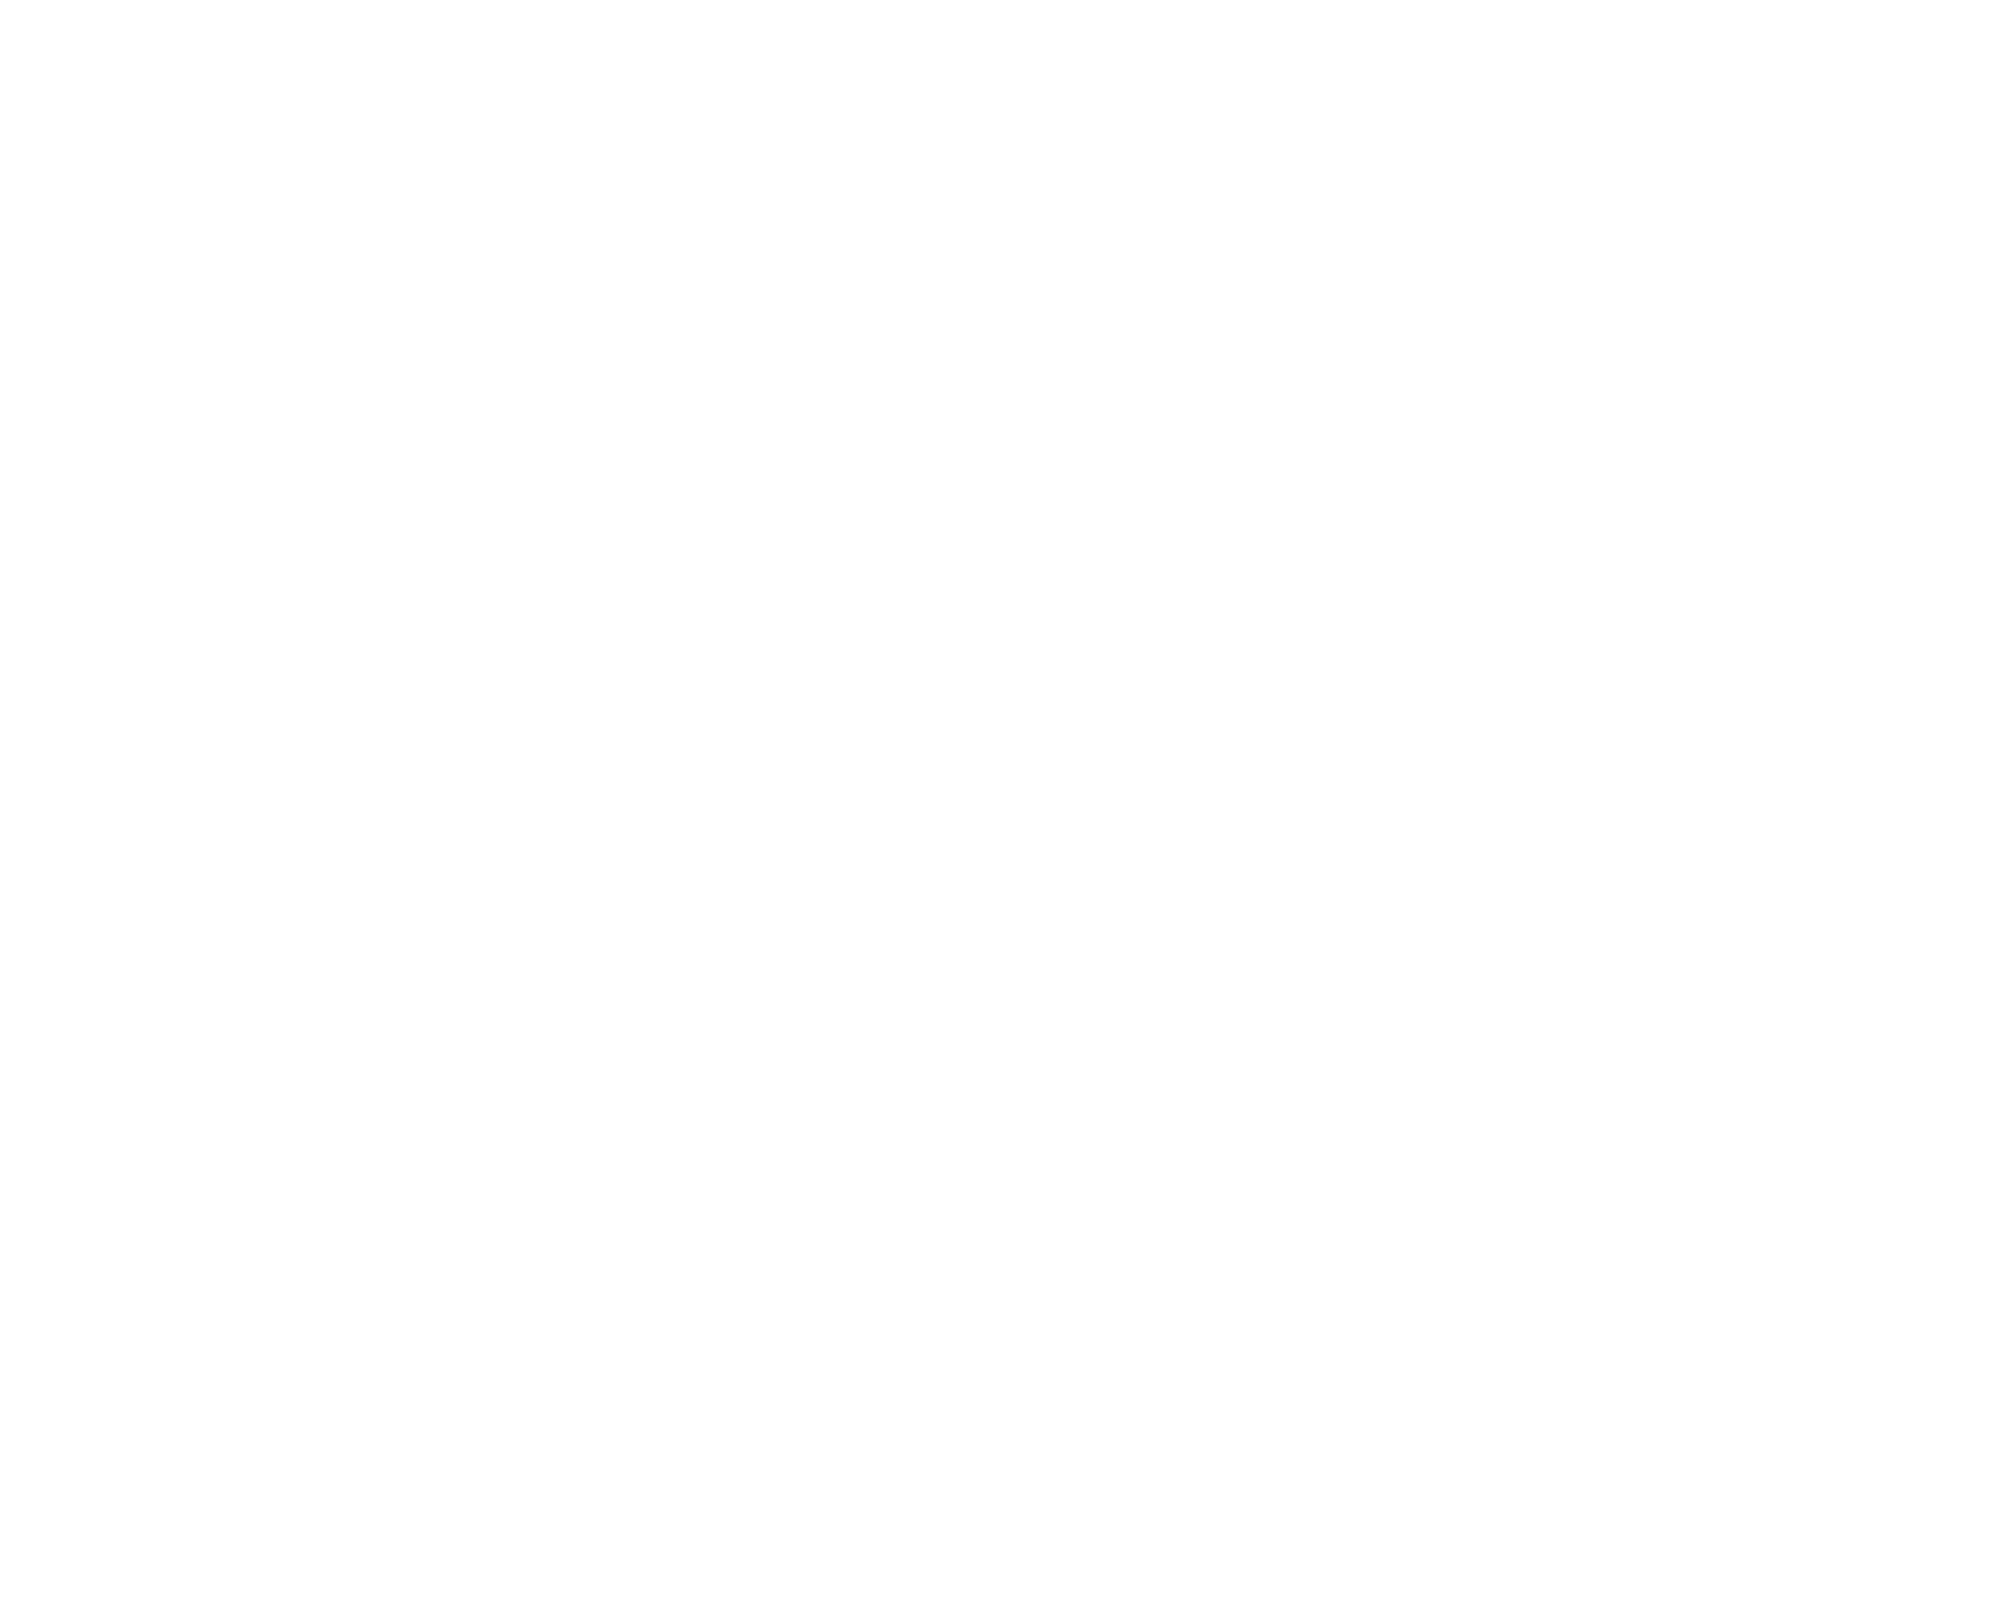

<IPython.core.display.Javascript object>


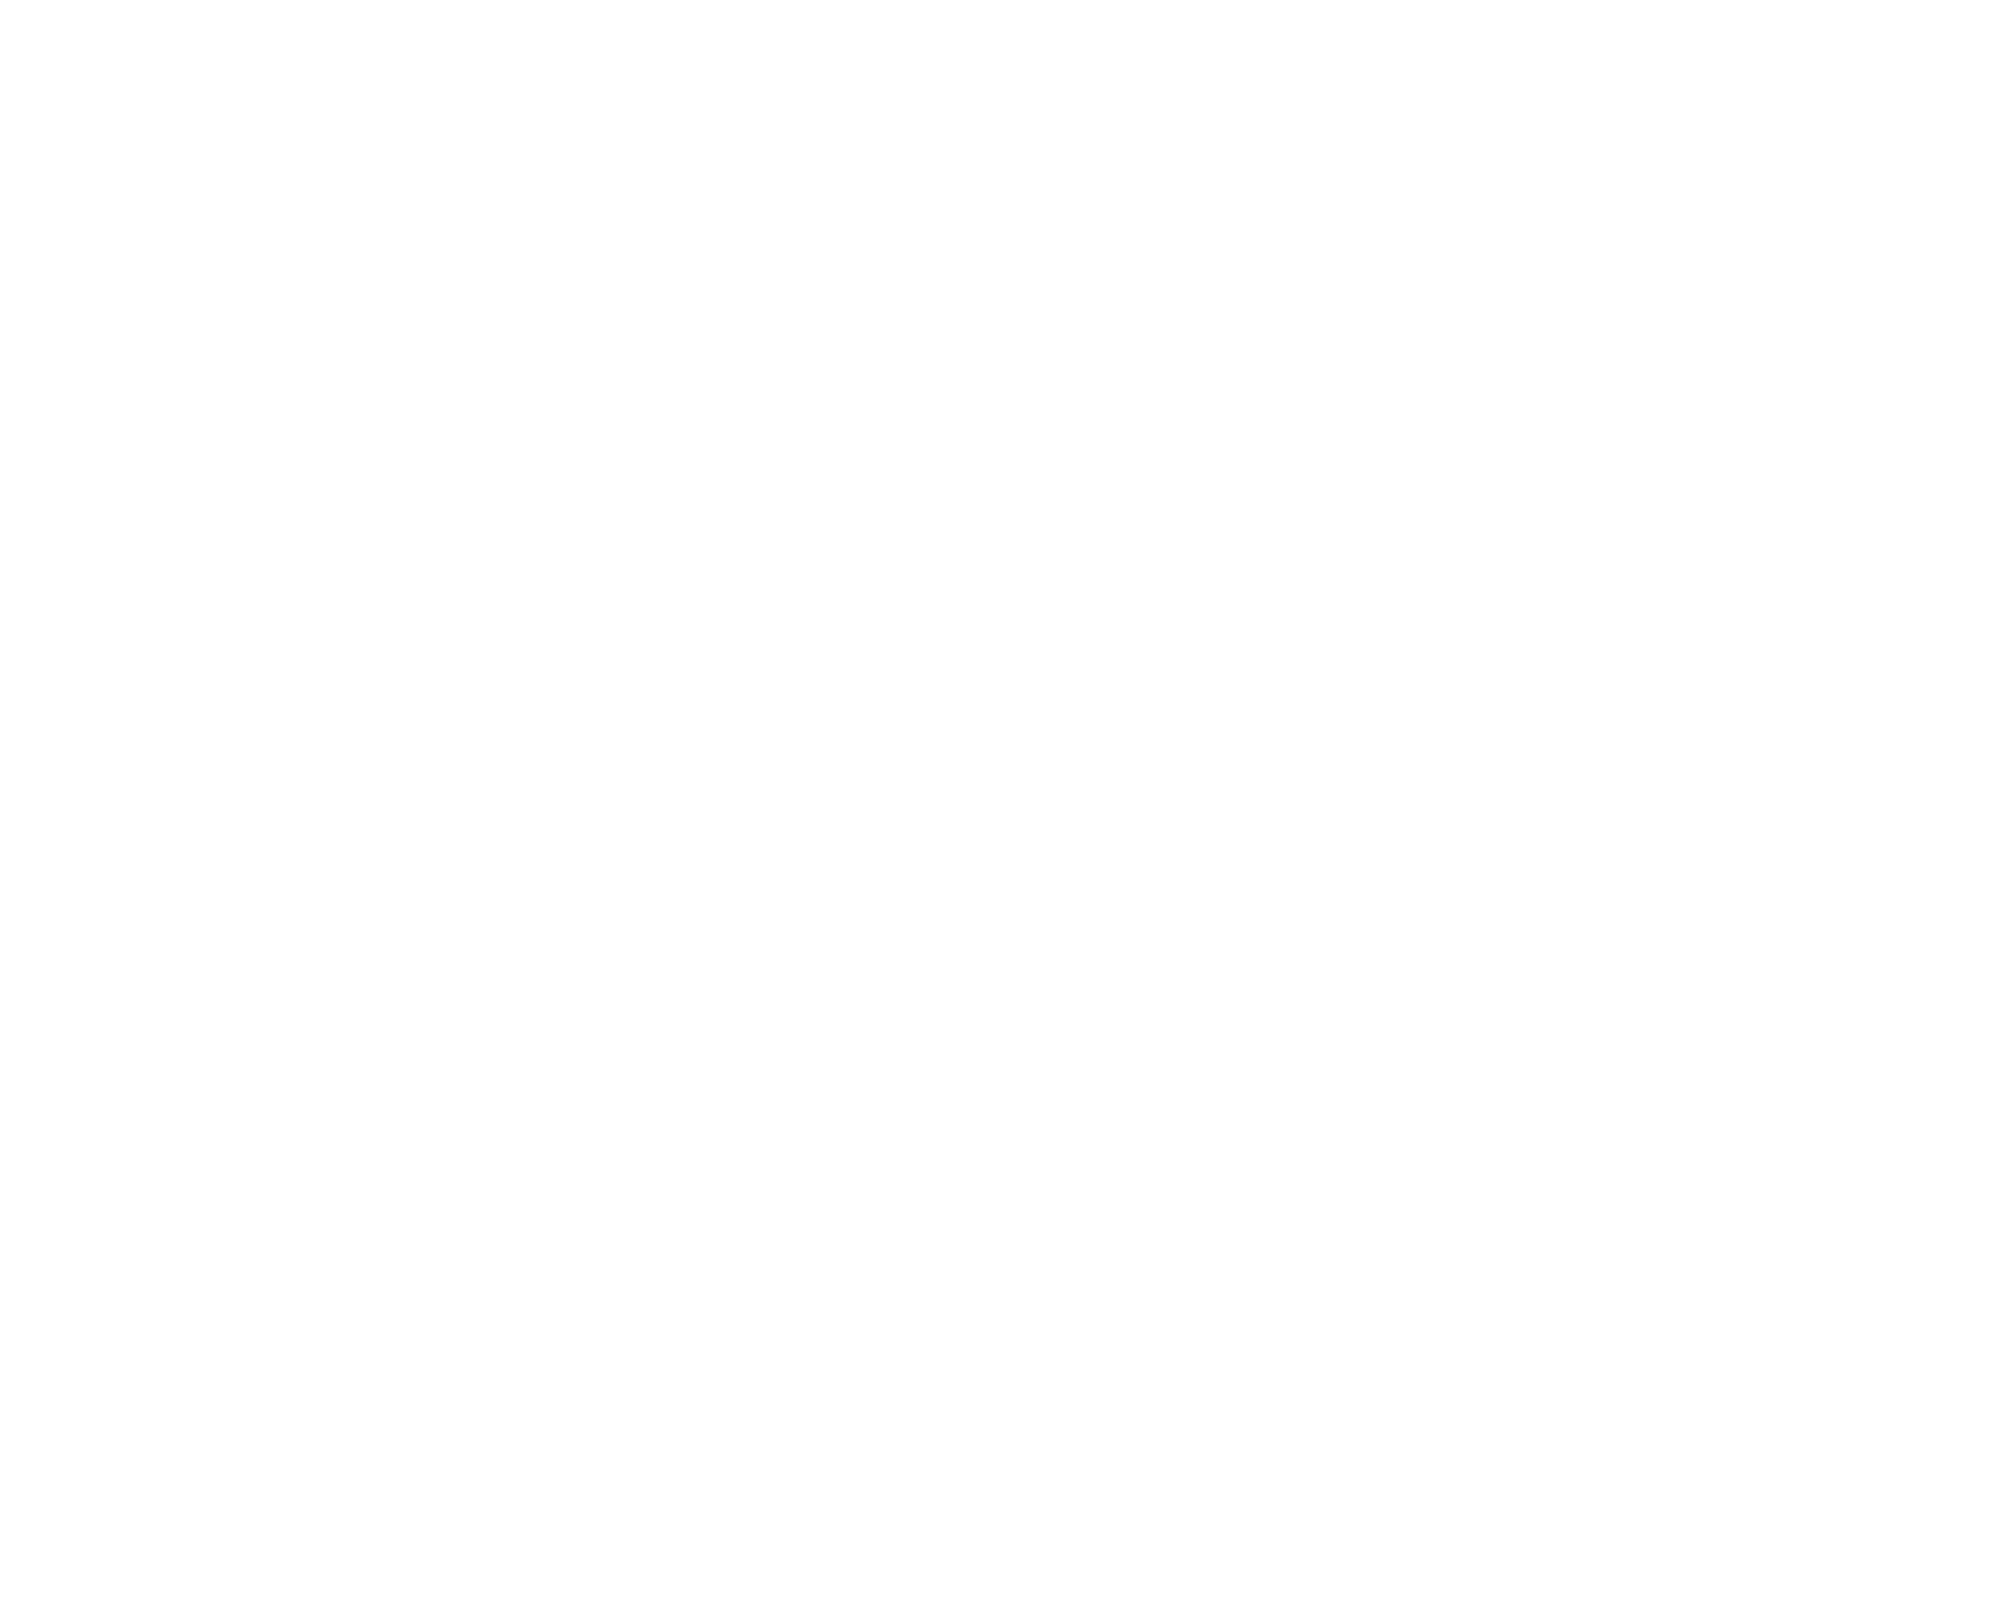

<IPython.core.display.Javascript object>


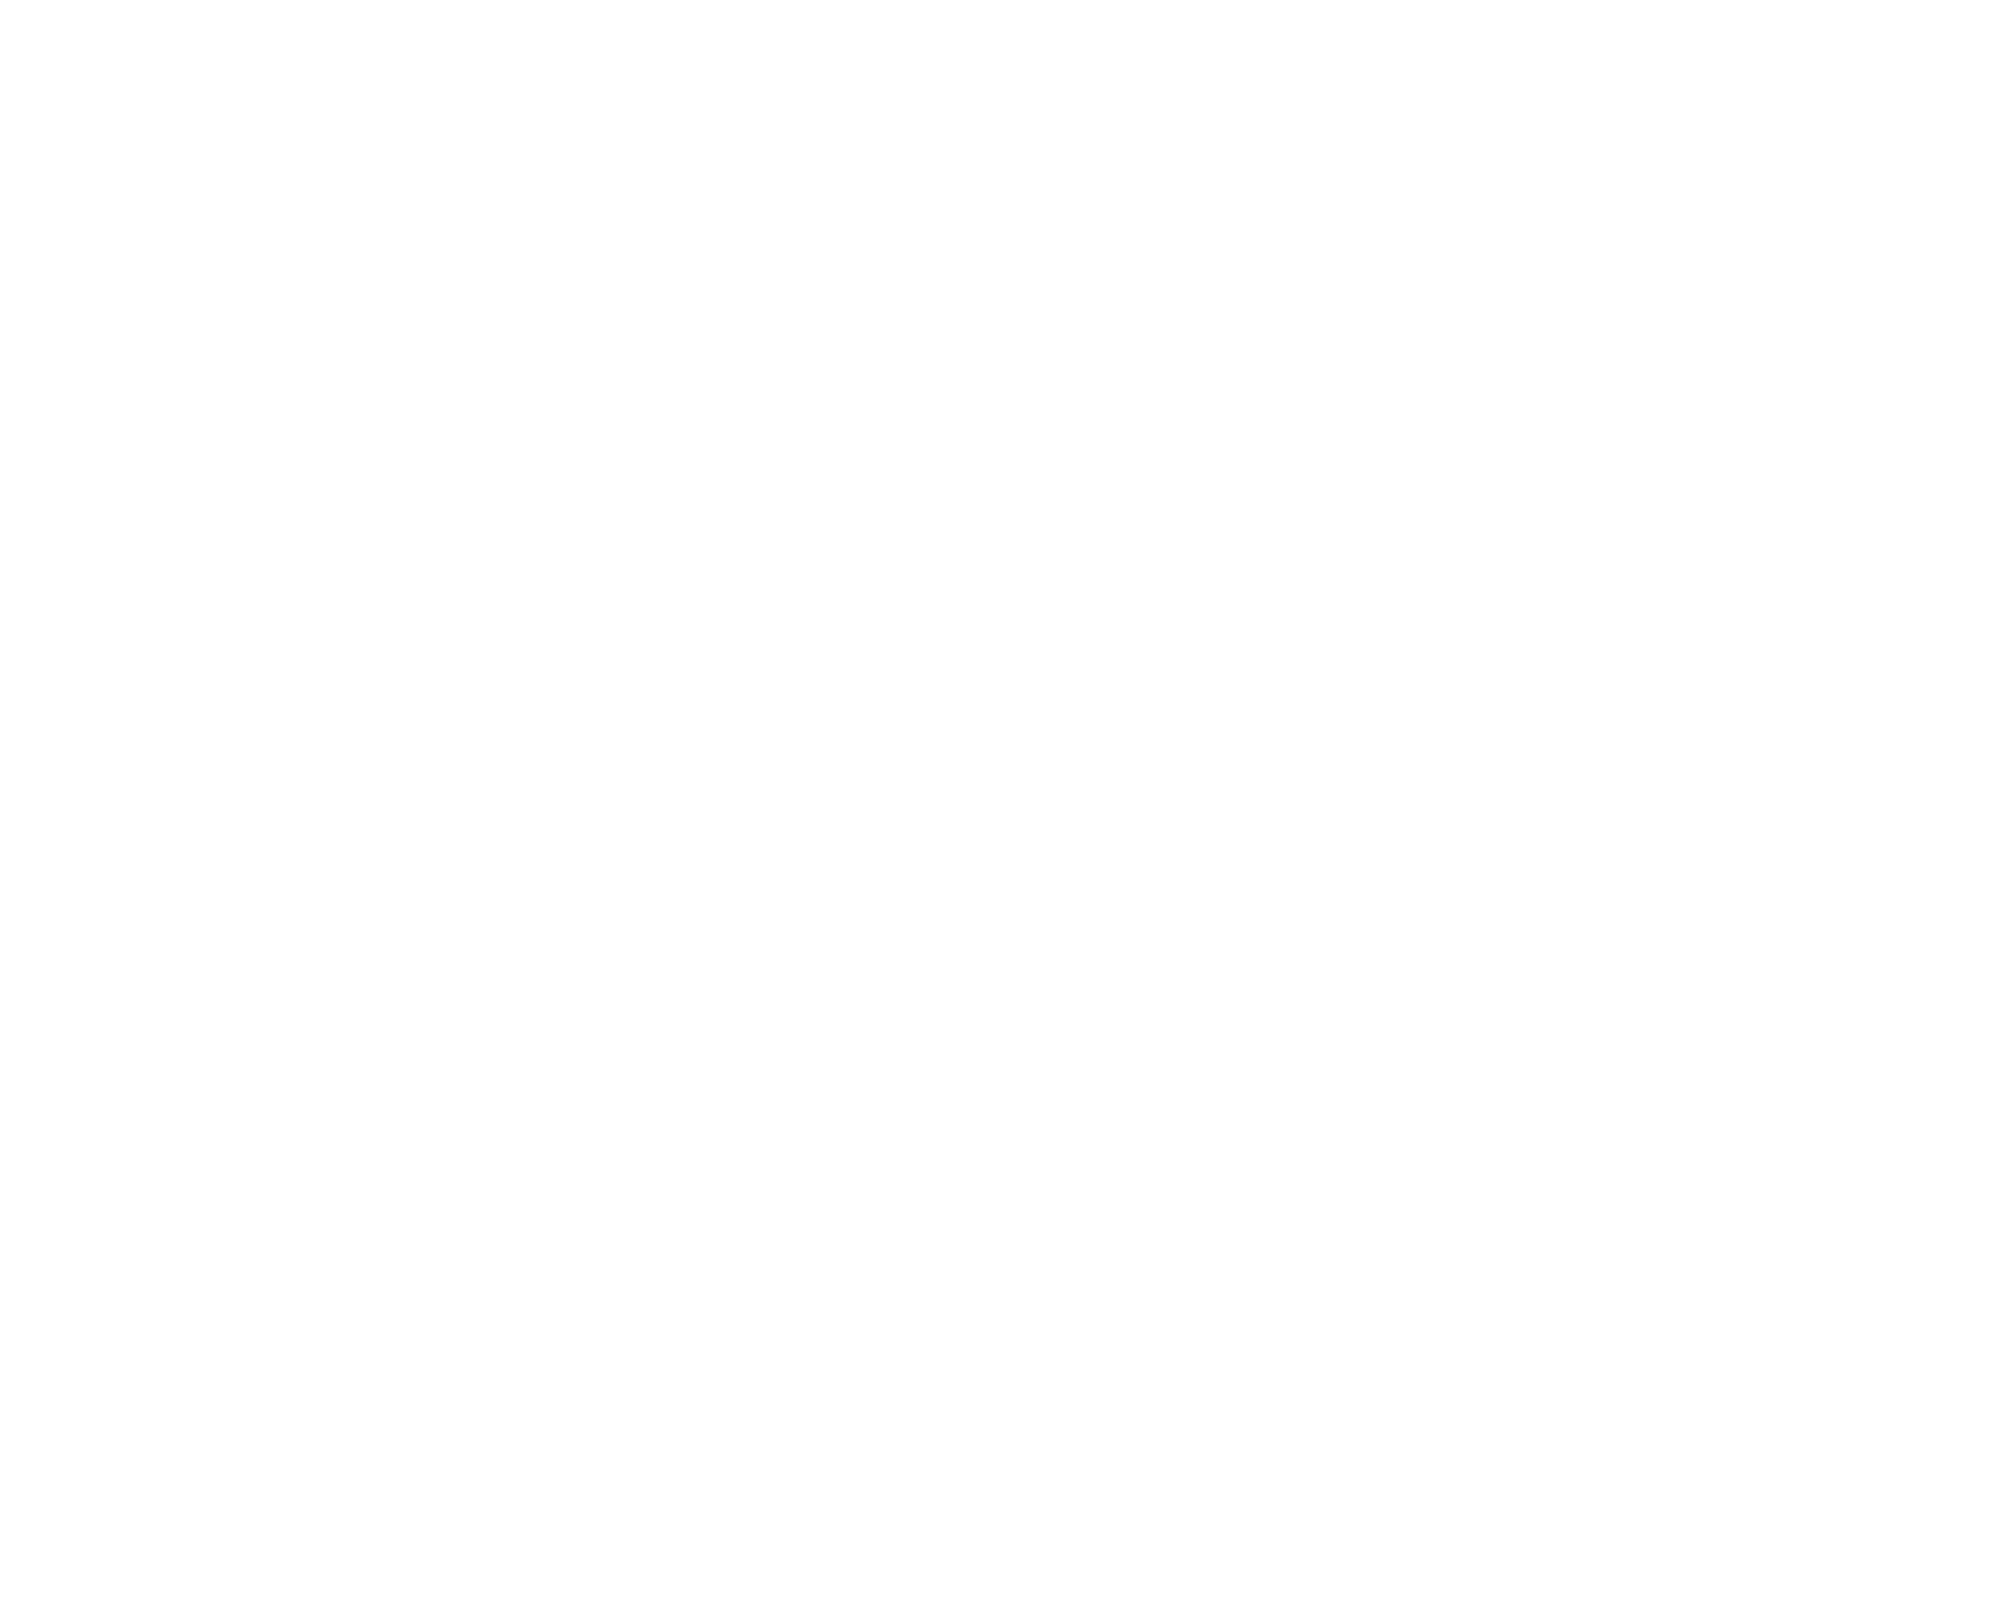

<IPython.core.display.Javascript object>


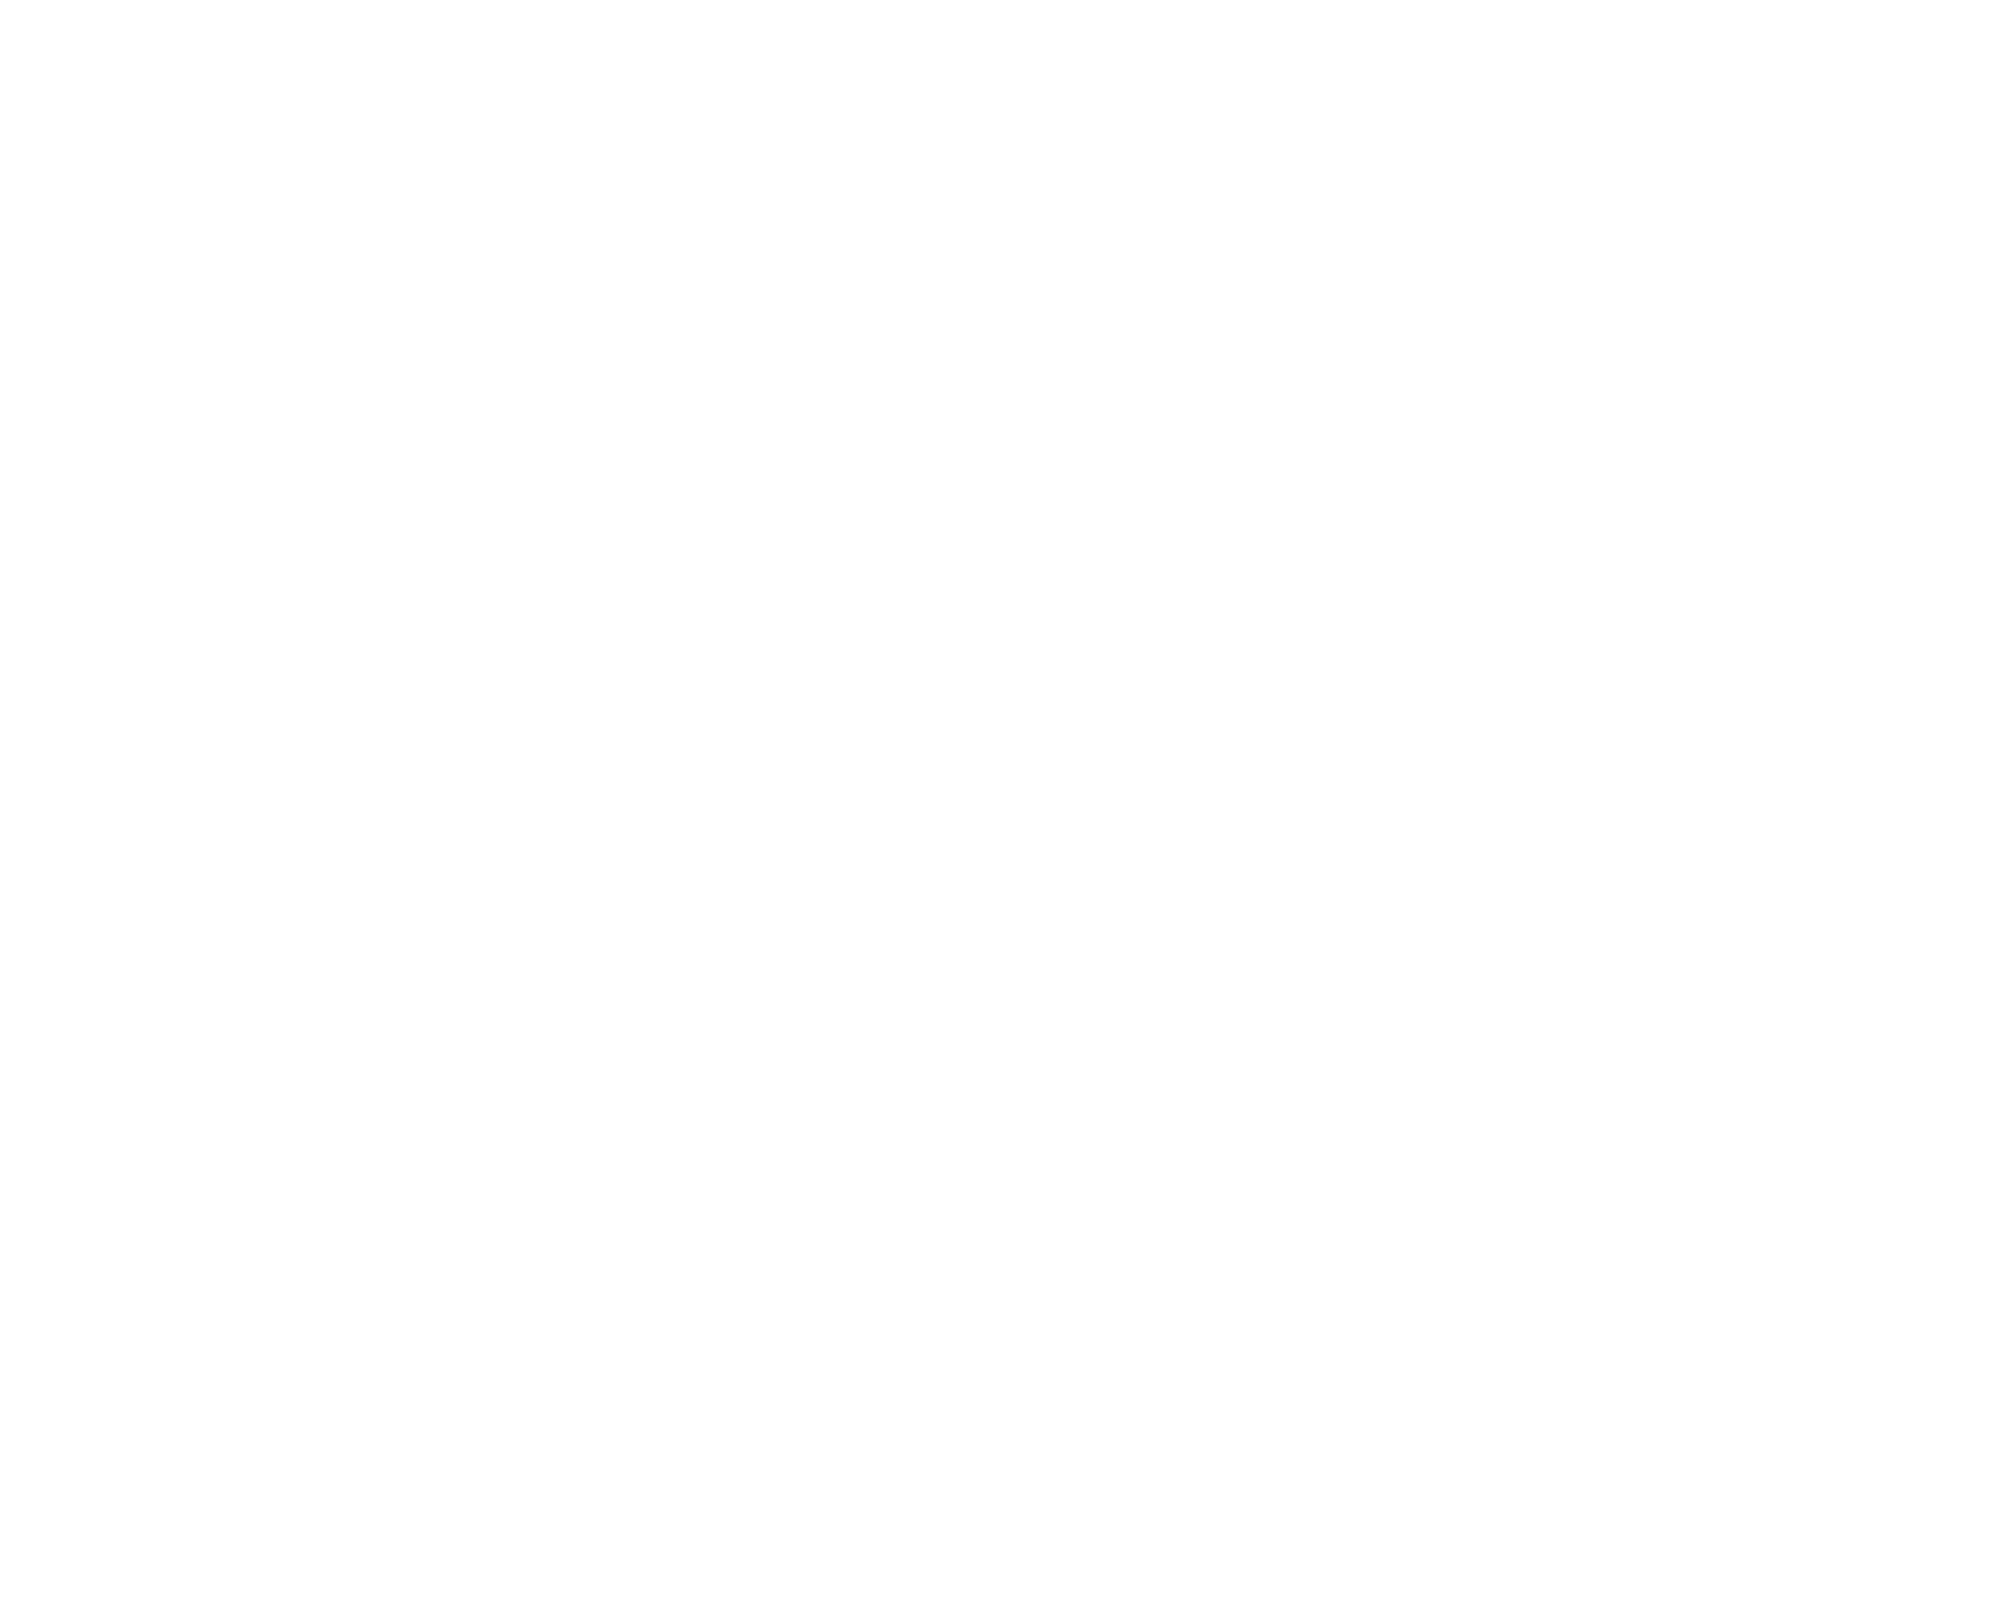

<IPython.core.display.Javascript object>


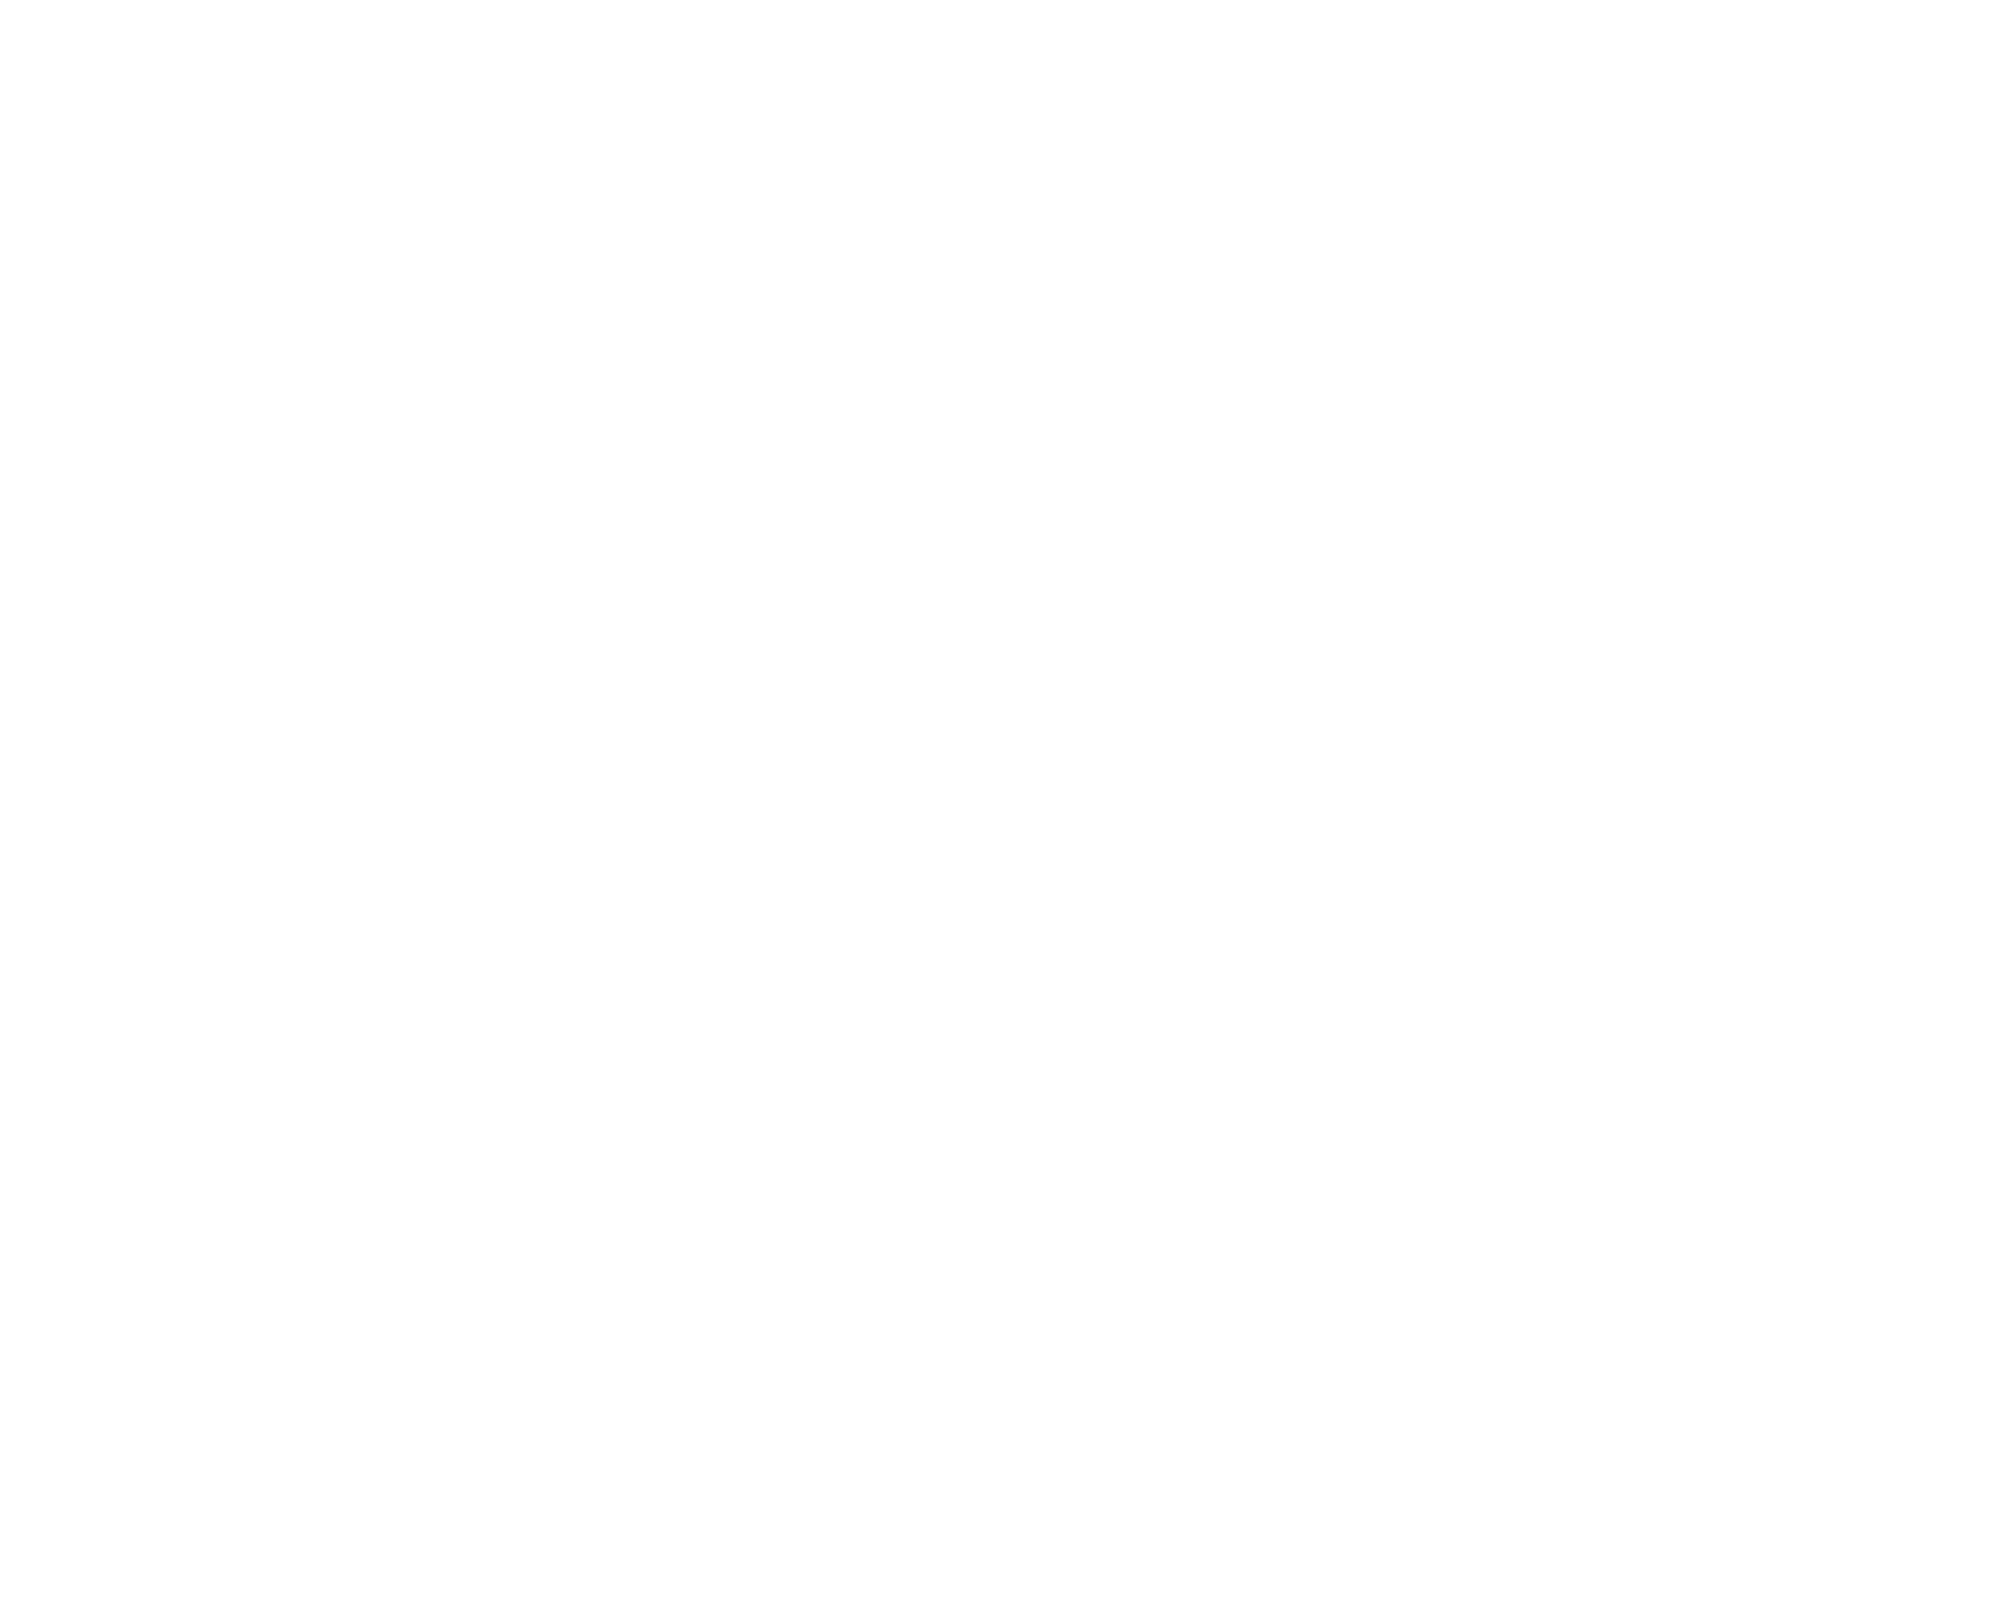

<IPython.core.display.Javascript object>


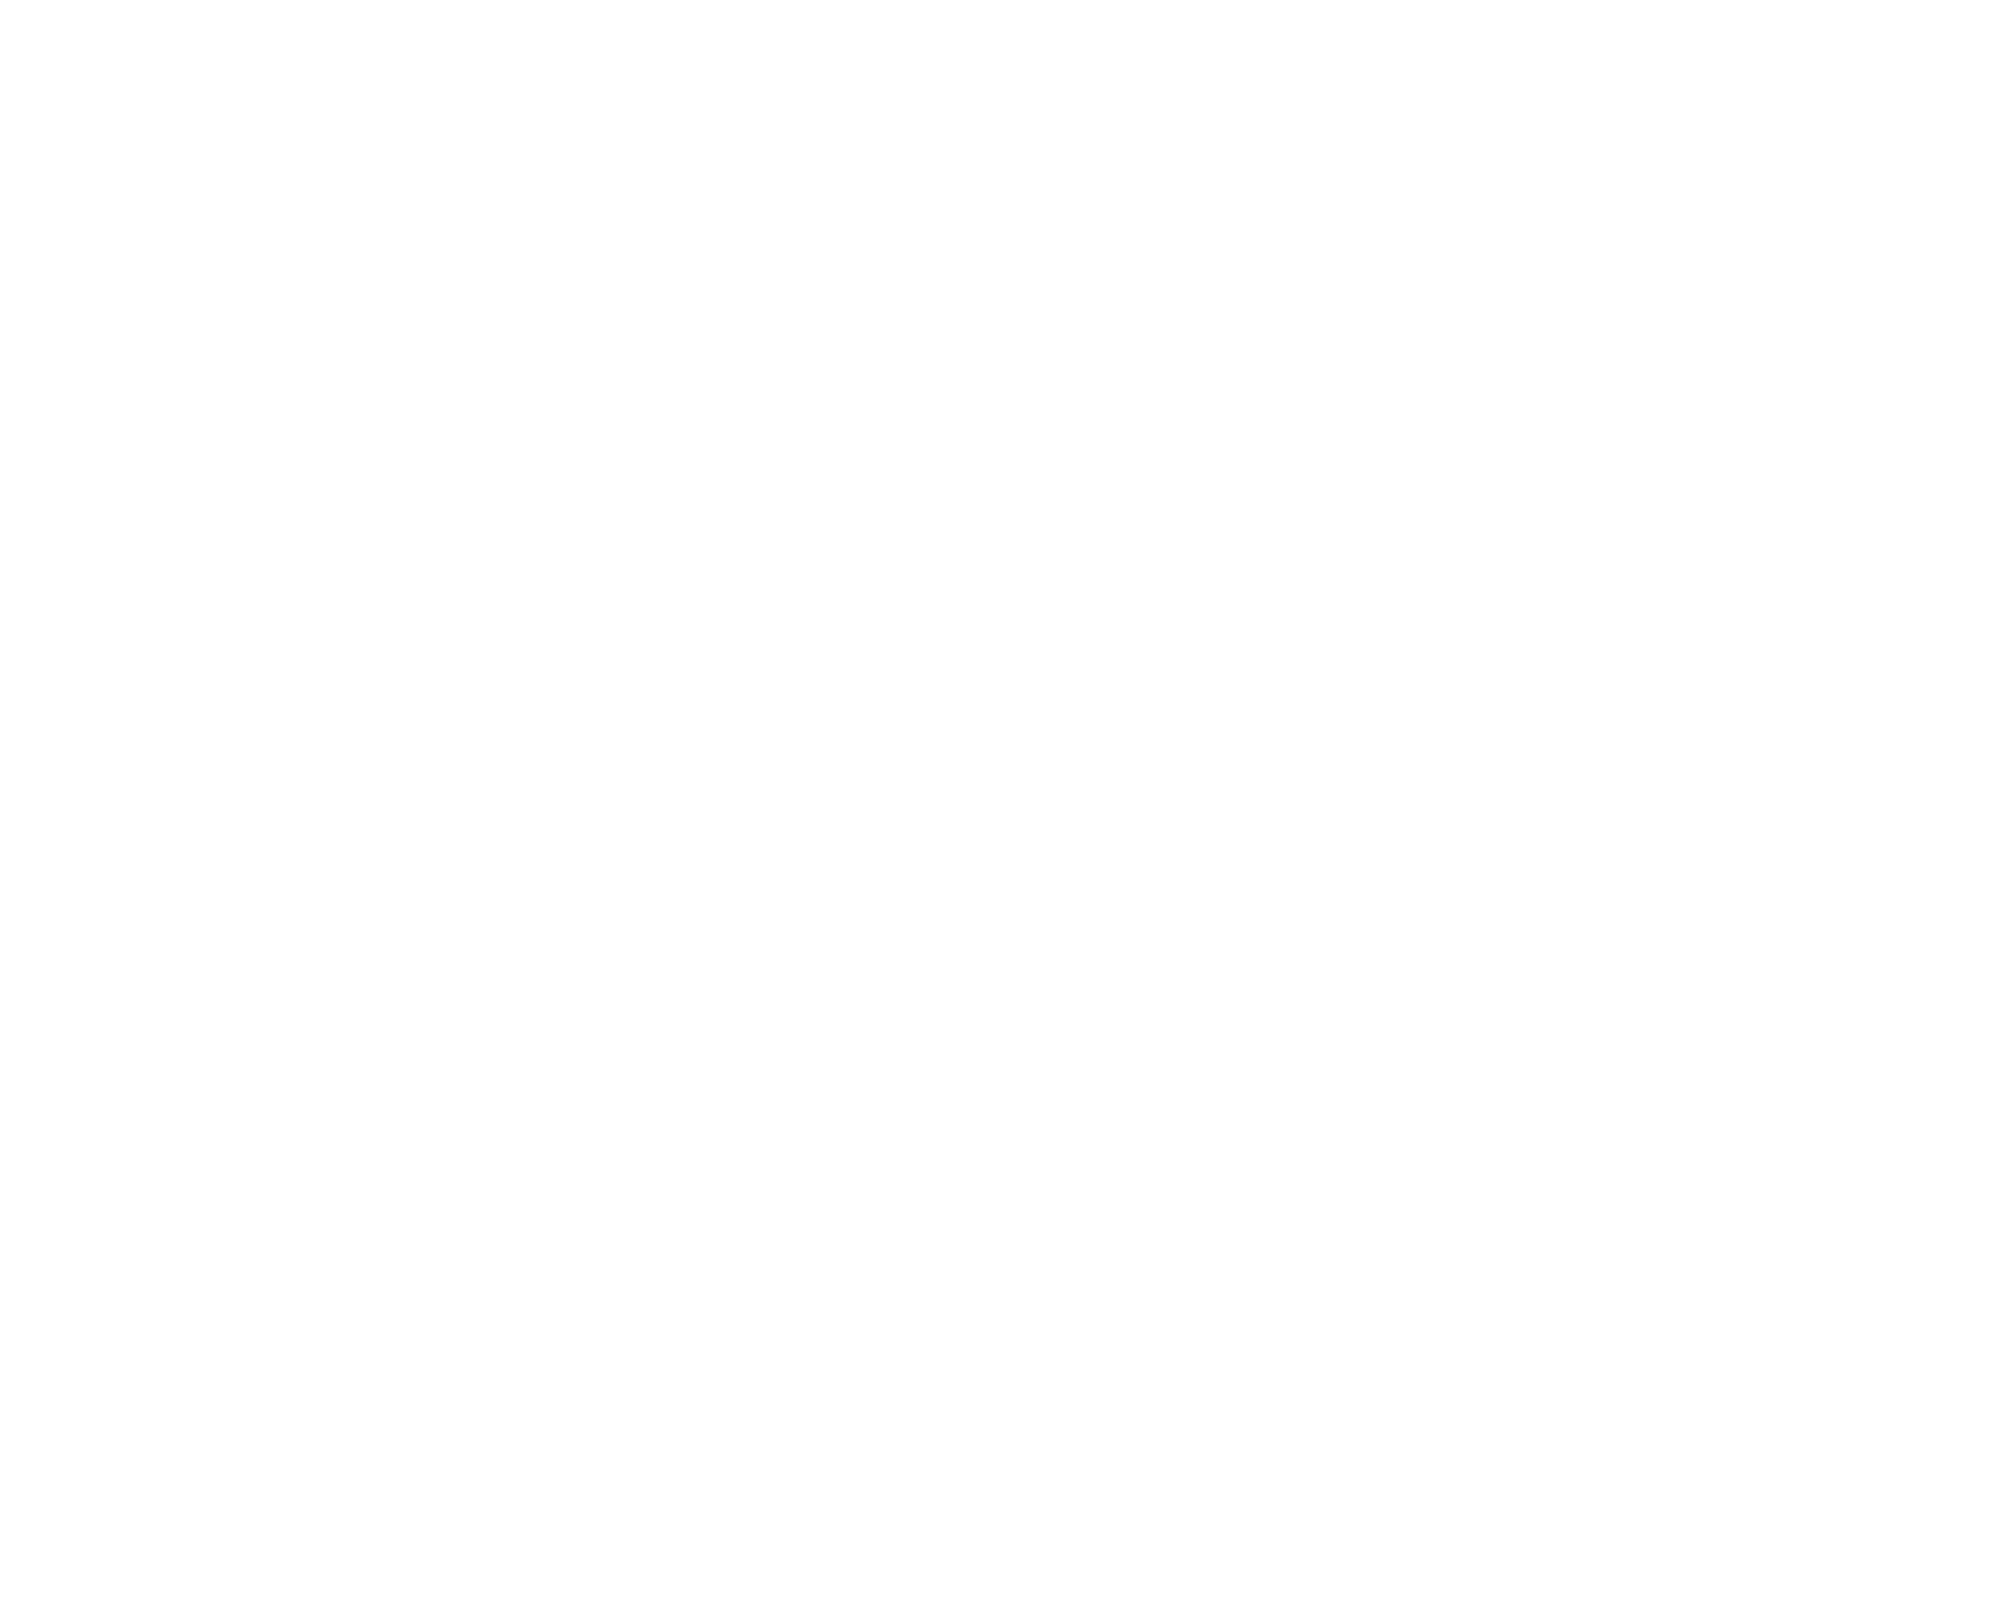

<IPython.core.display.Javascript object>


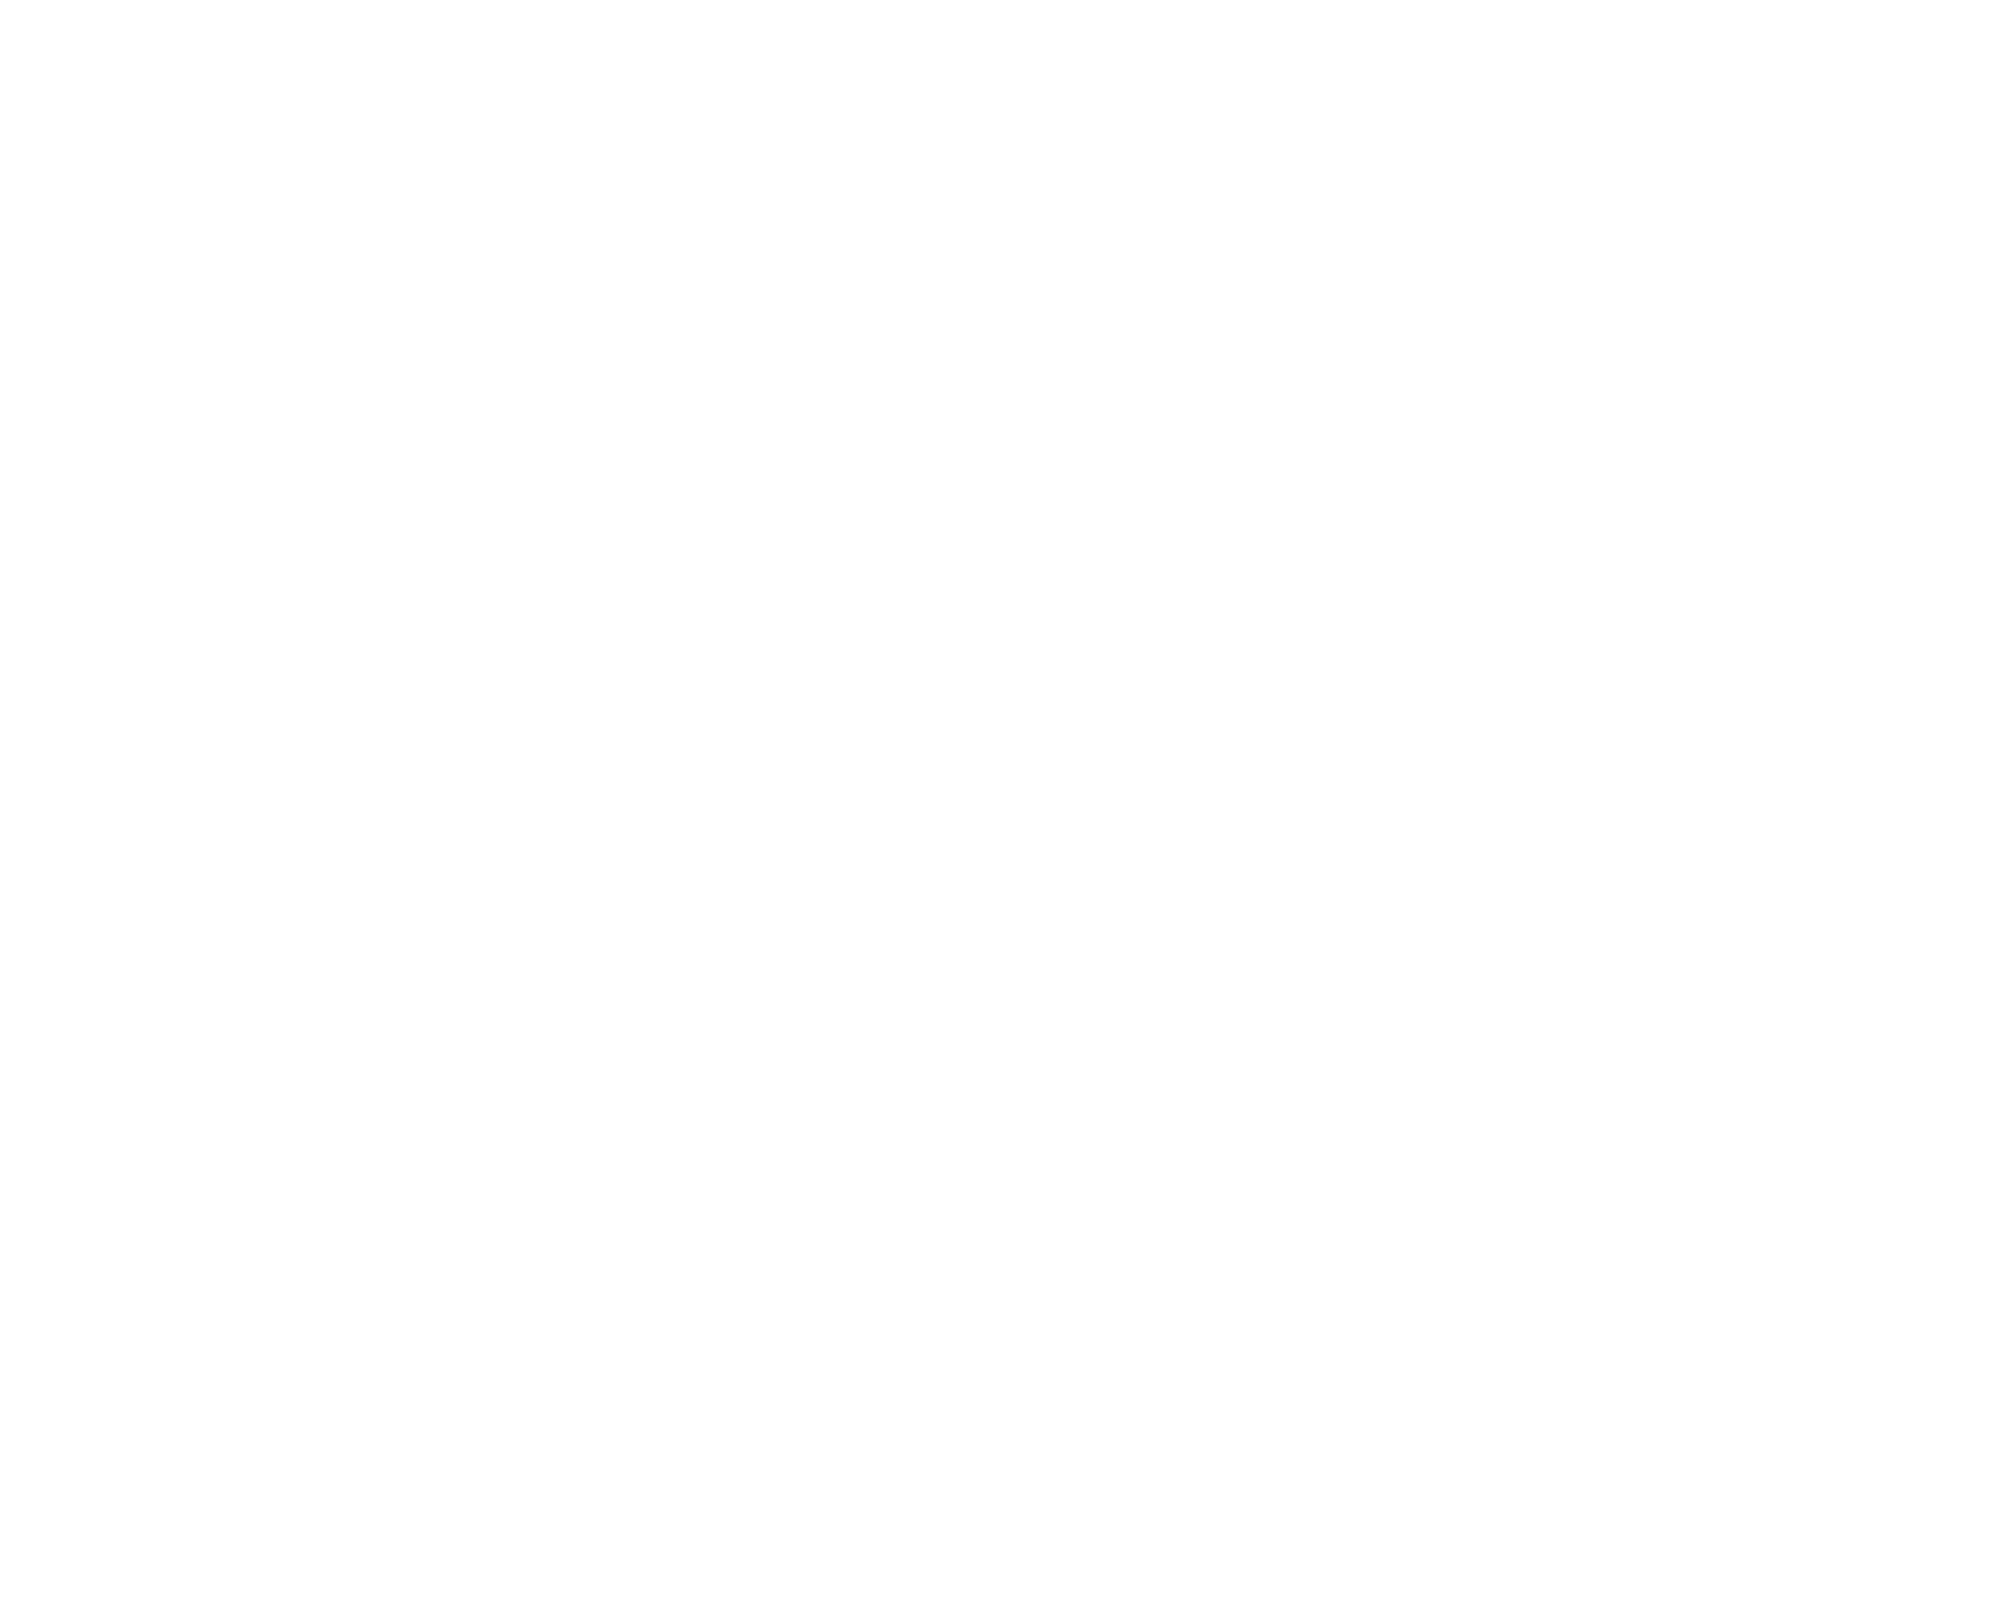

<IPython.core.display.Javascript object>


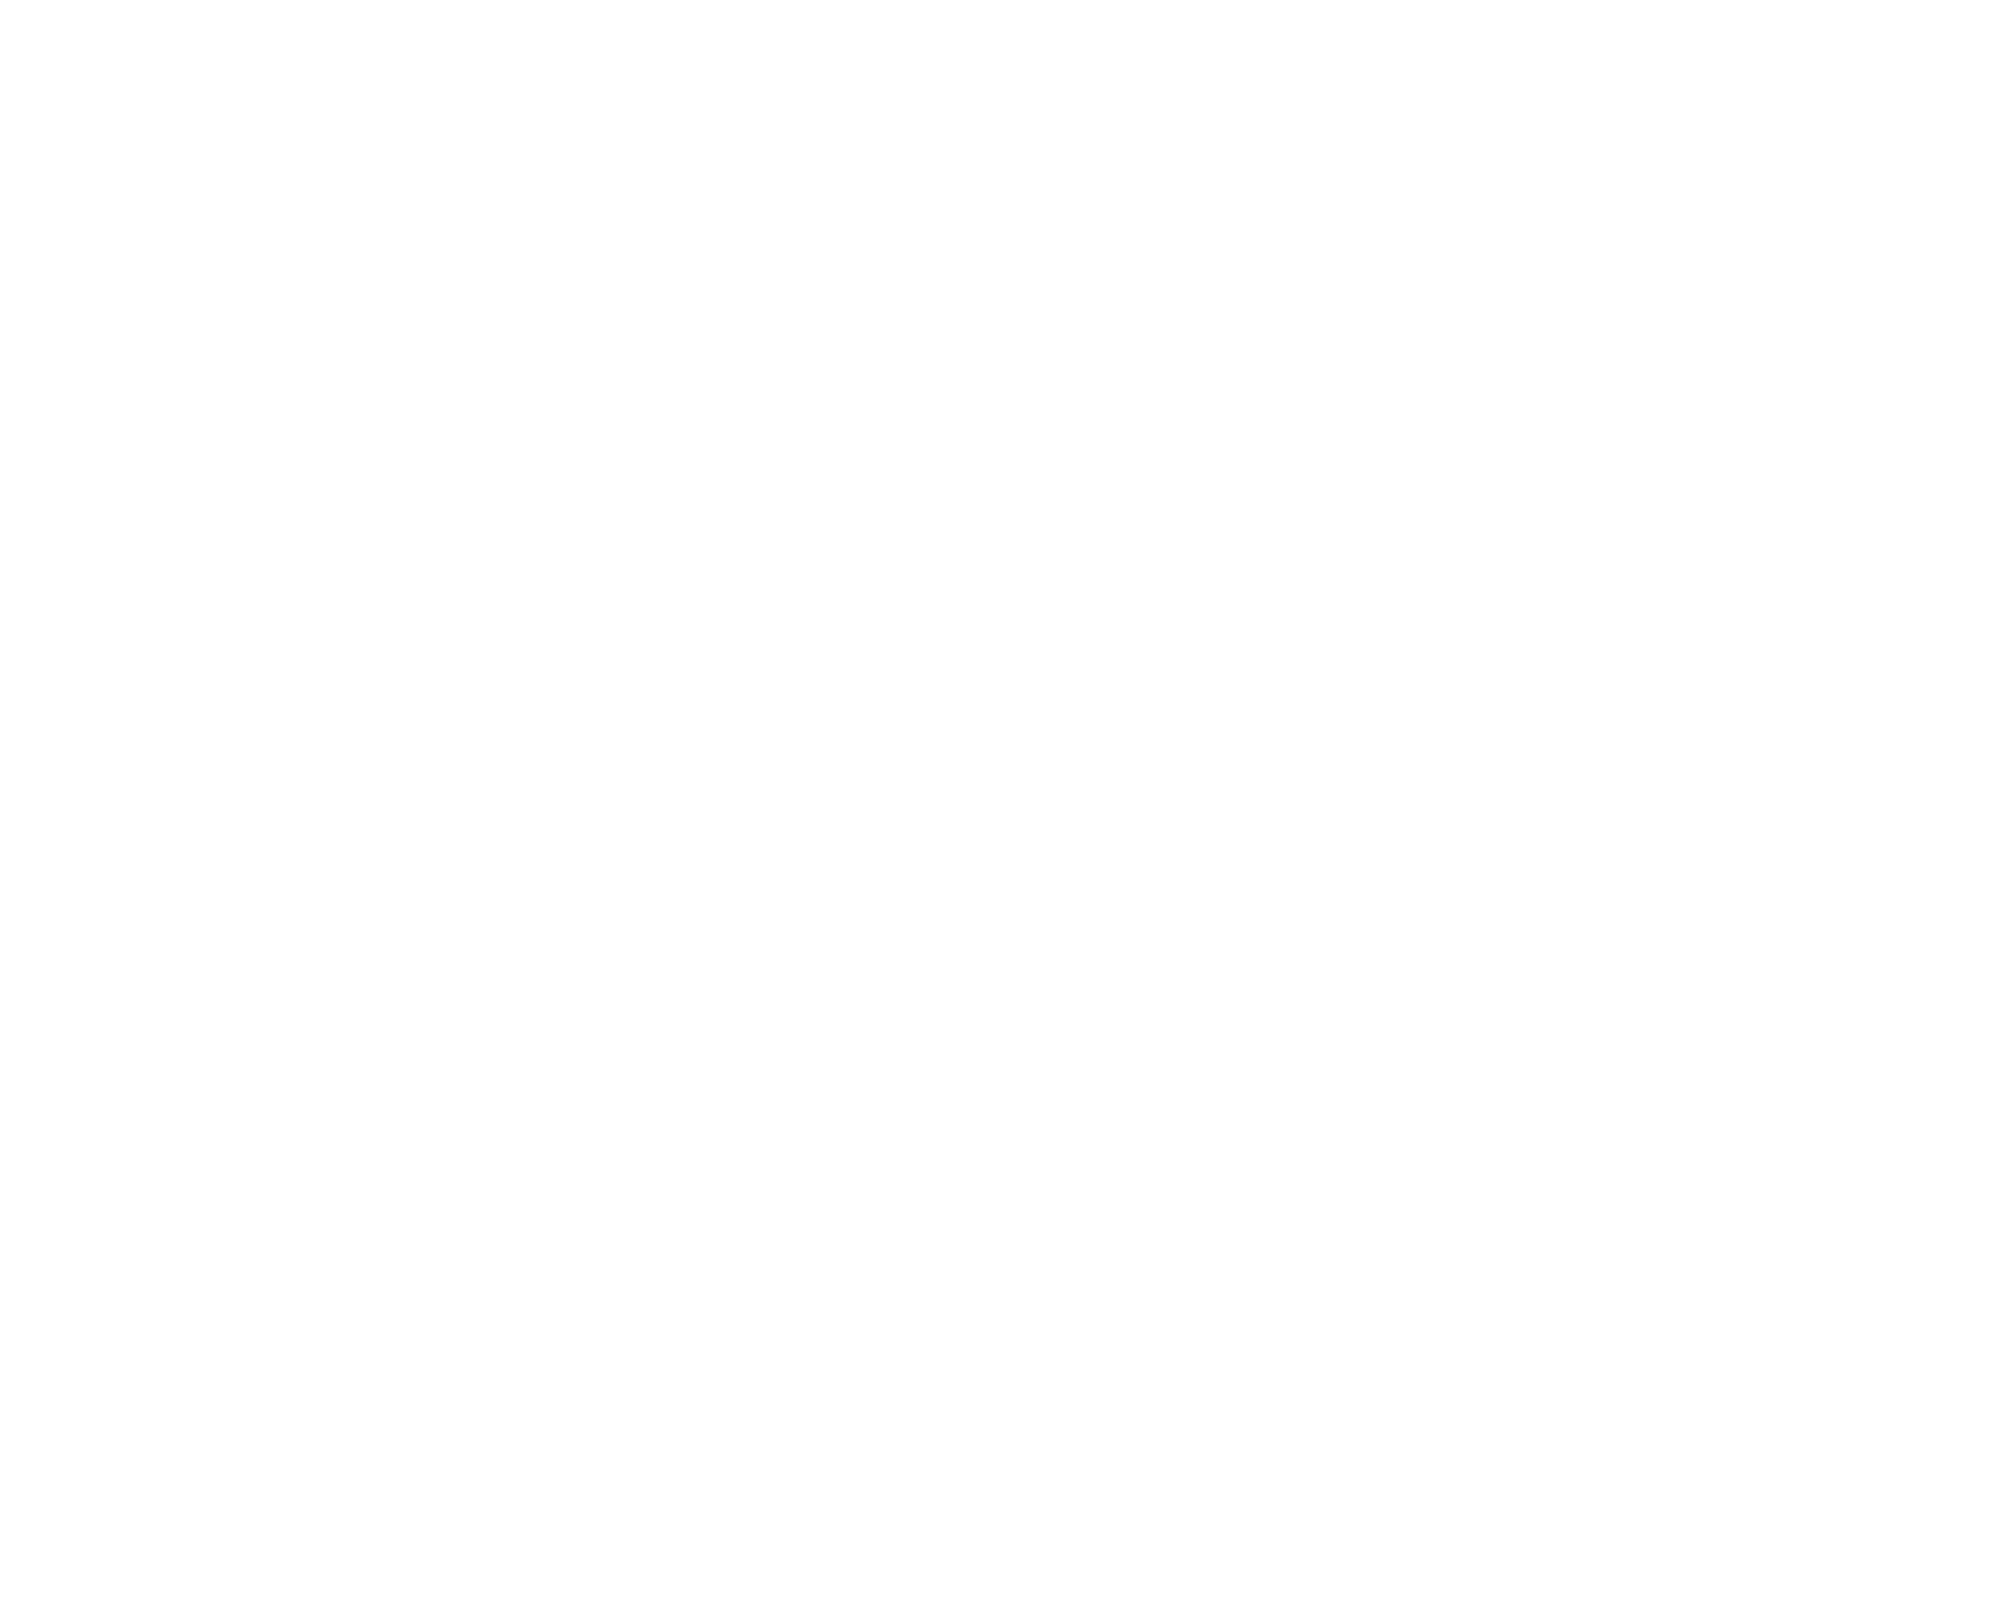

<IPython.core.display.Javascript object>


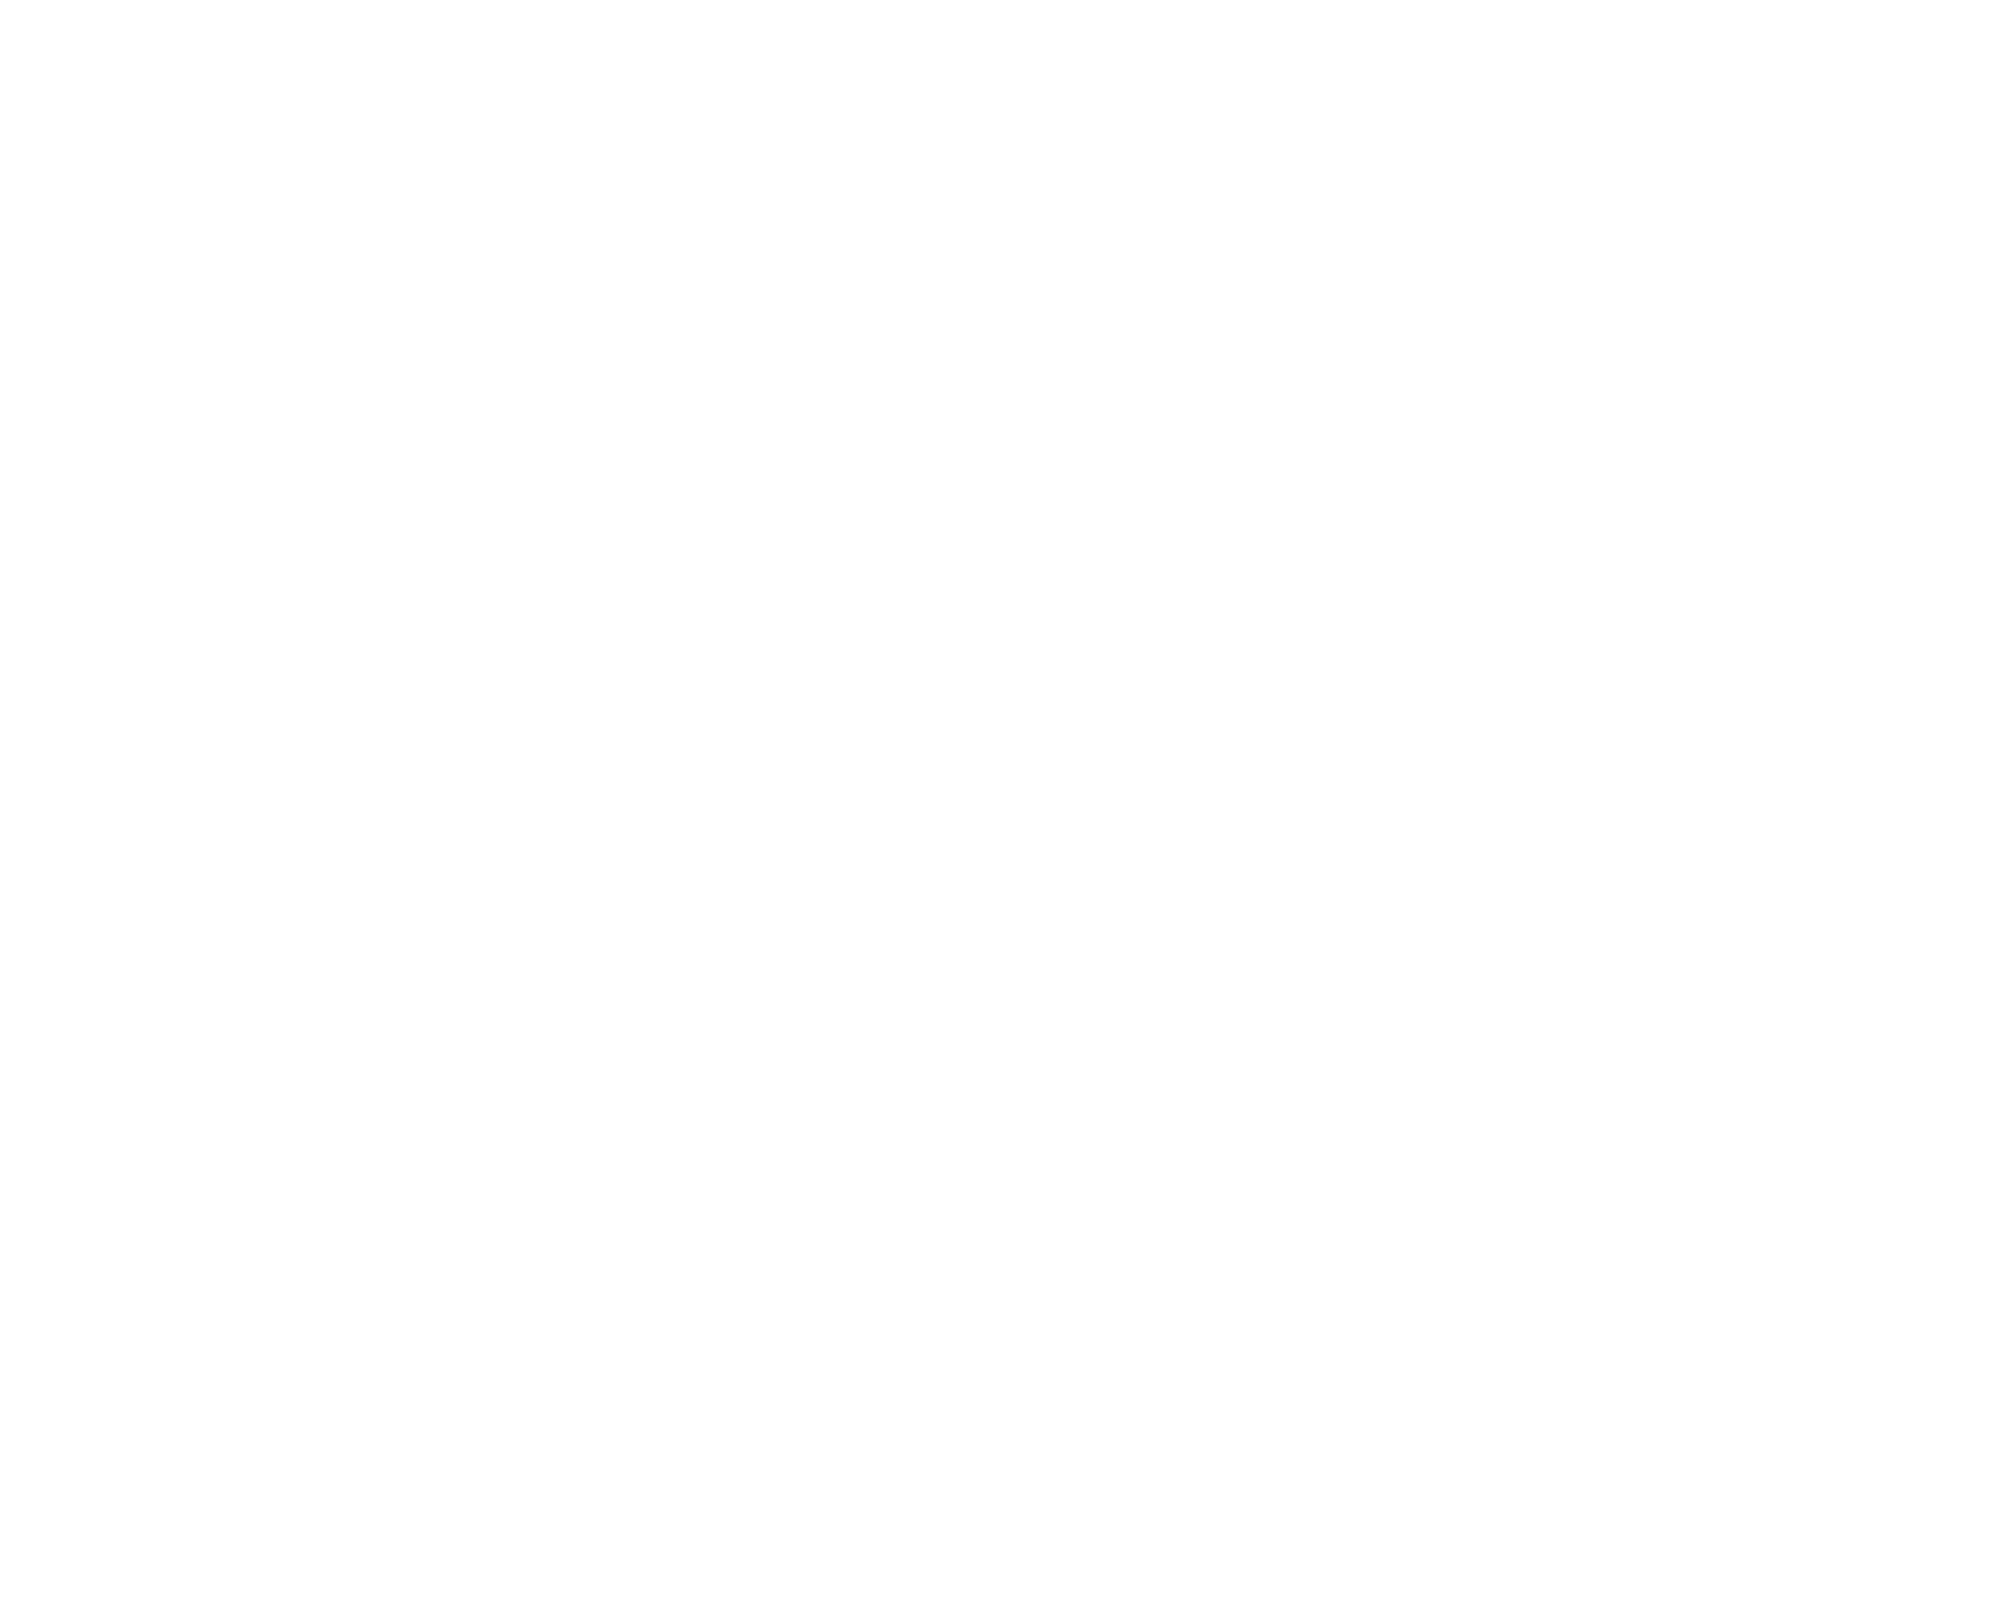

<IPython.core.display.Javascript object>


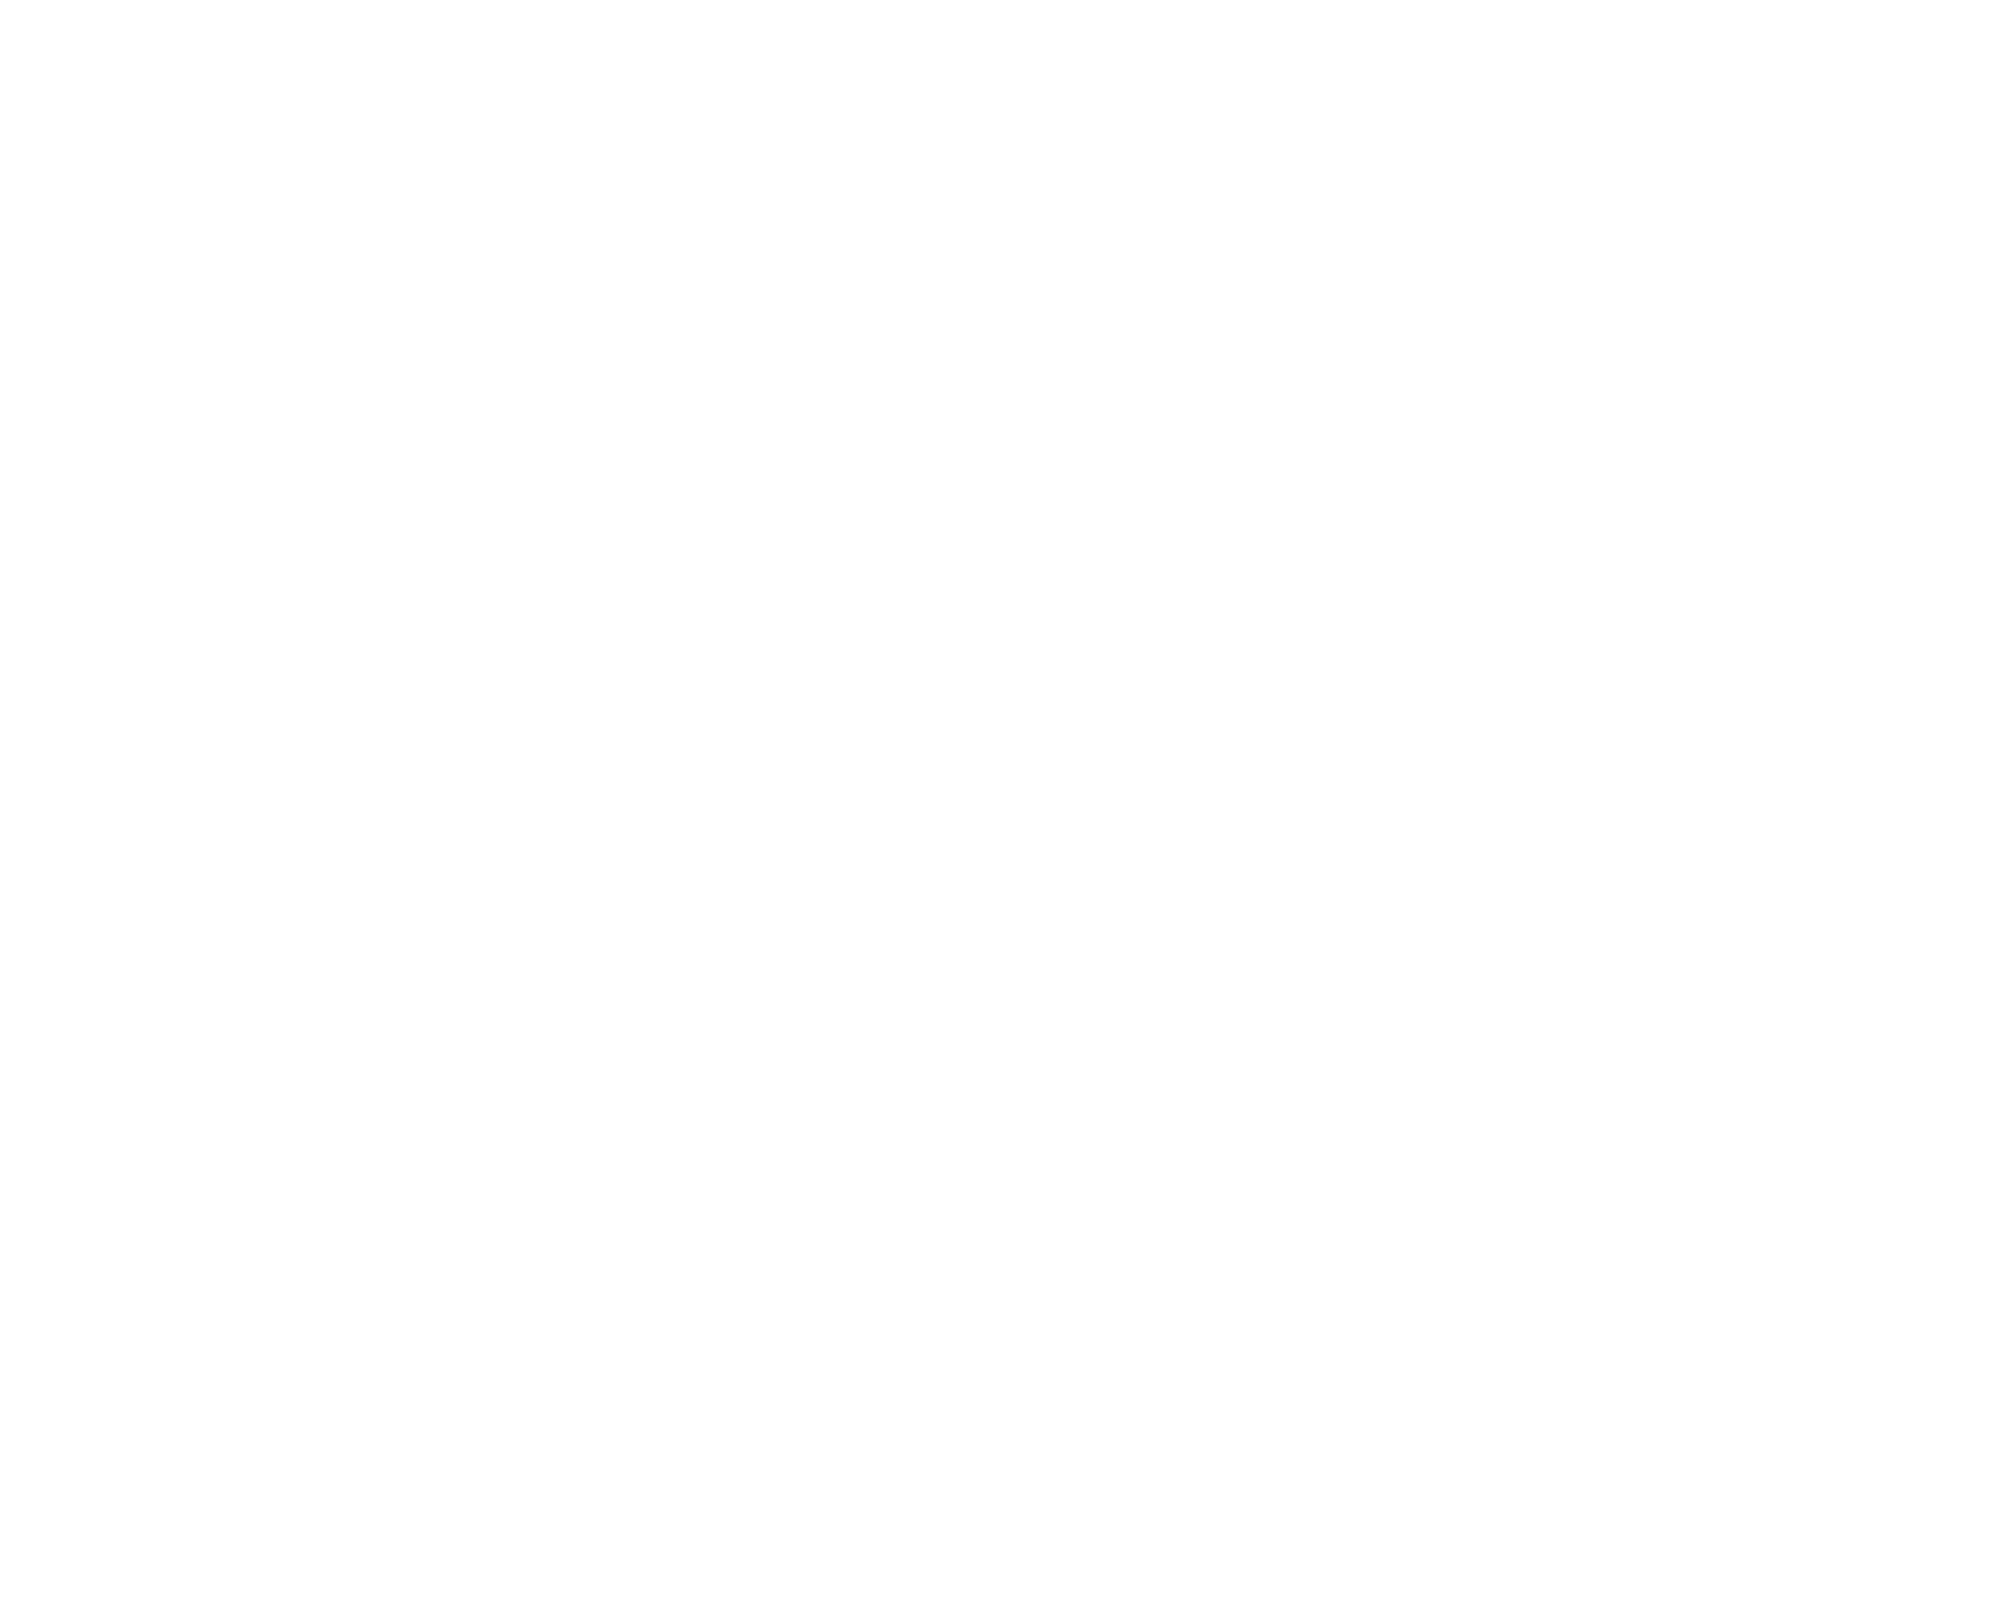

<IPython.core.display.Javascript object>


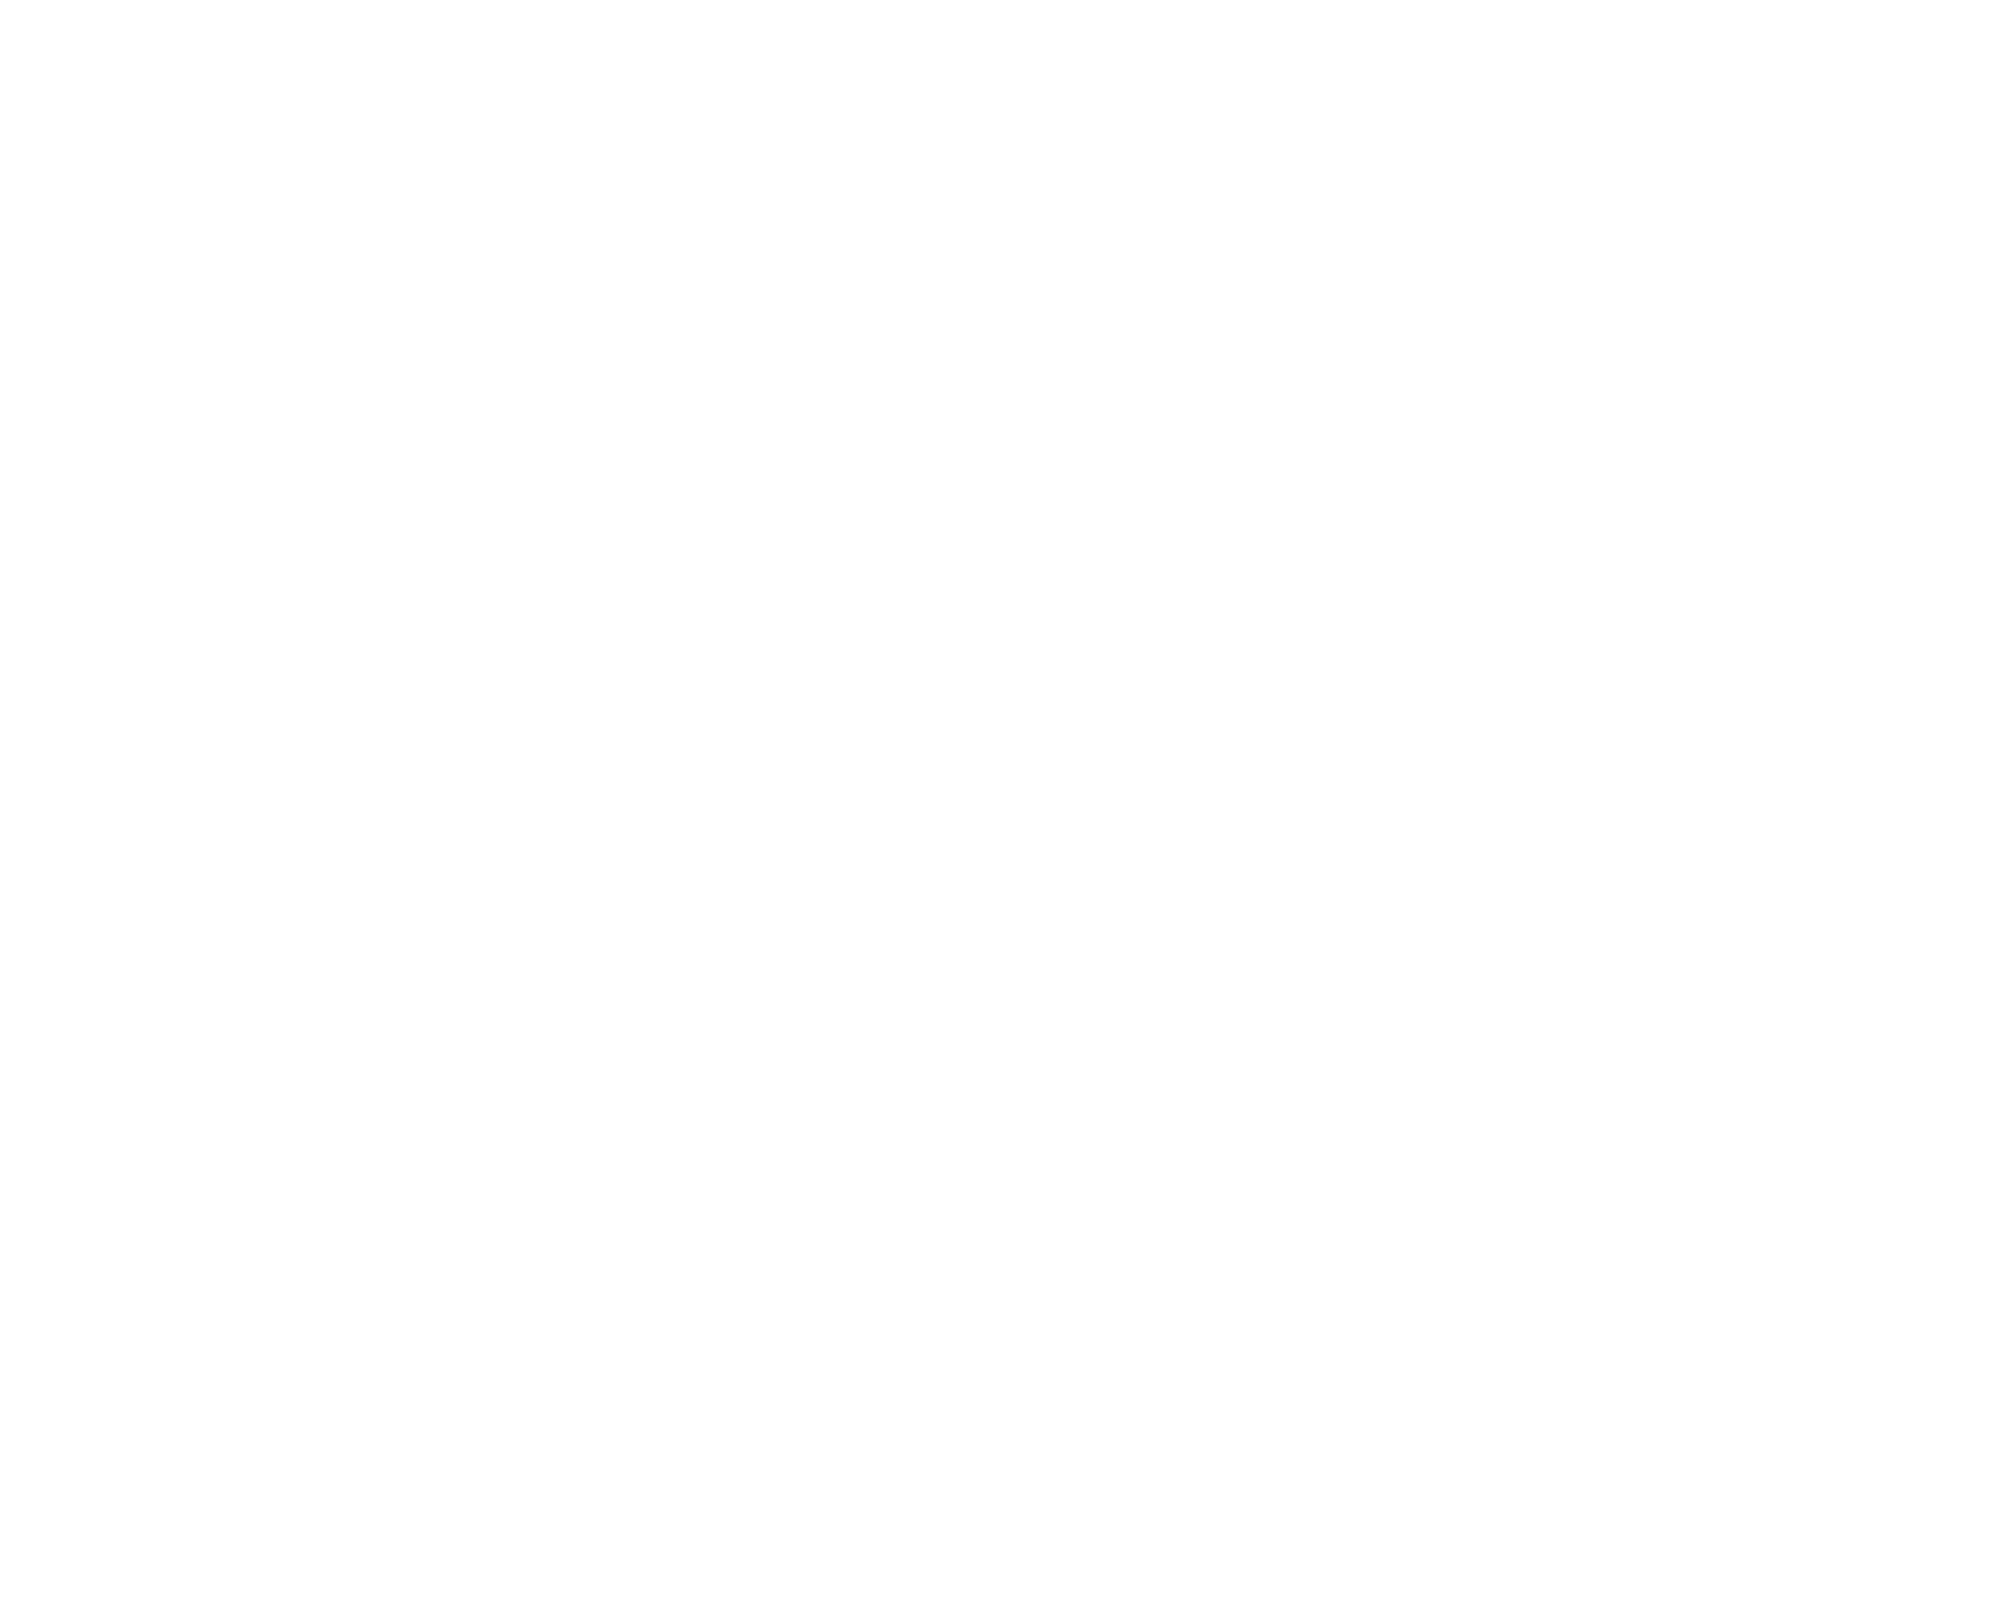

<IPython.core.display.Javascript object>


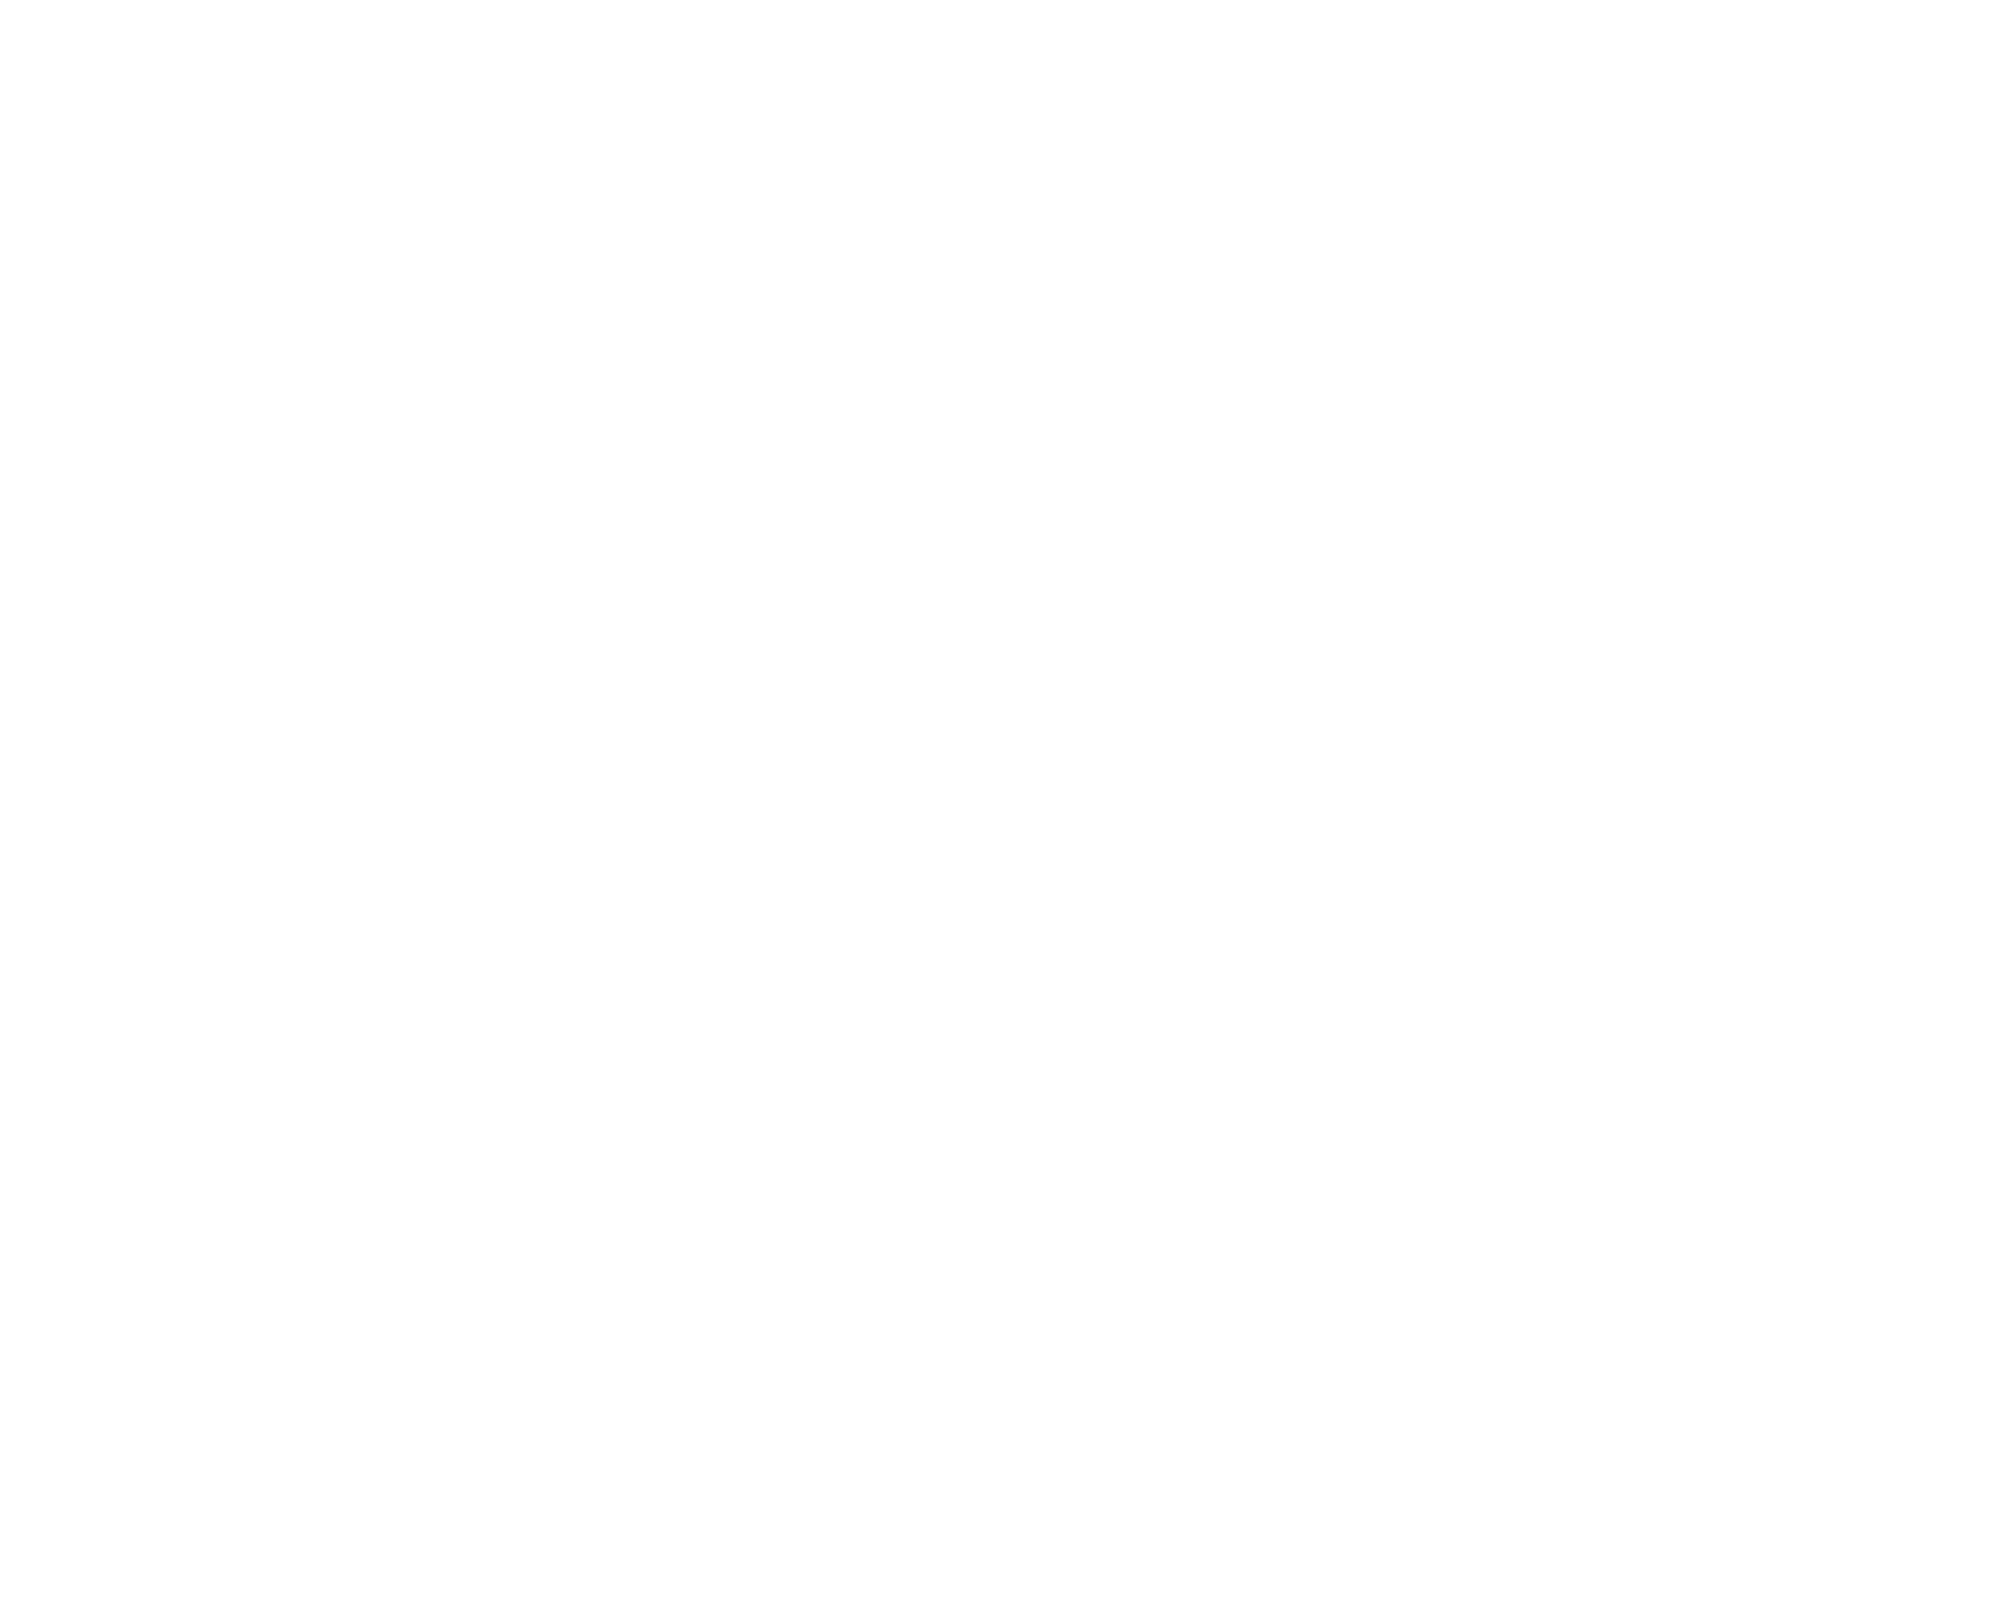

/Users/a071887/pdip/venv/lib/python3.7/site-packages/ipykernel_launcher.py:127: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


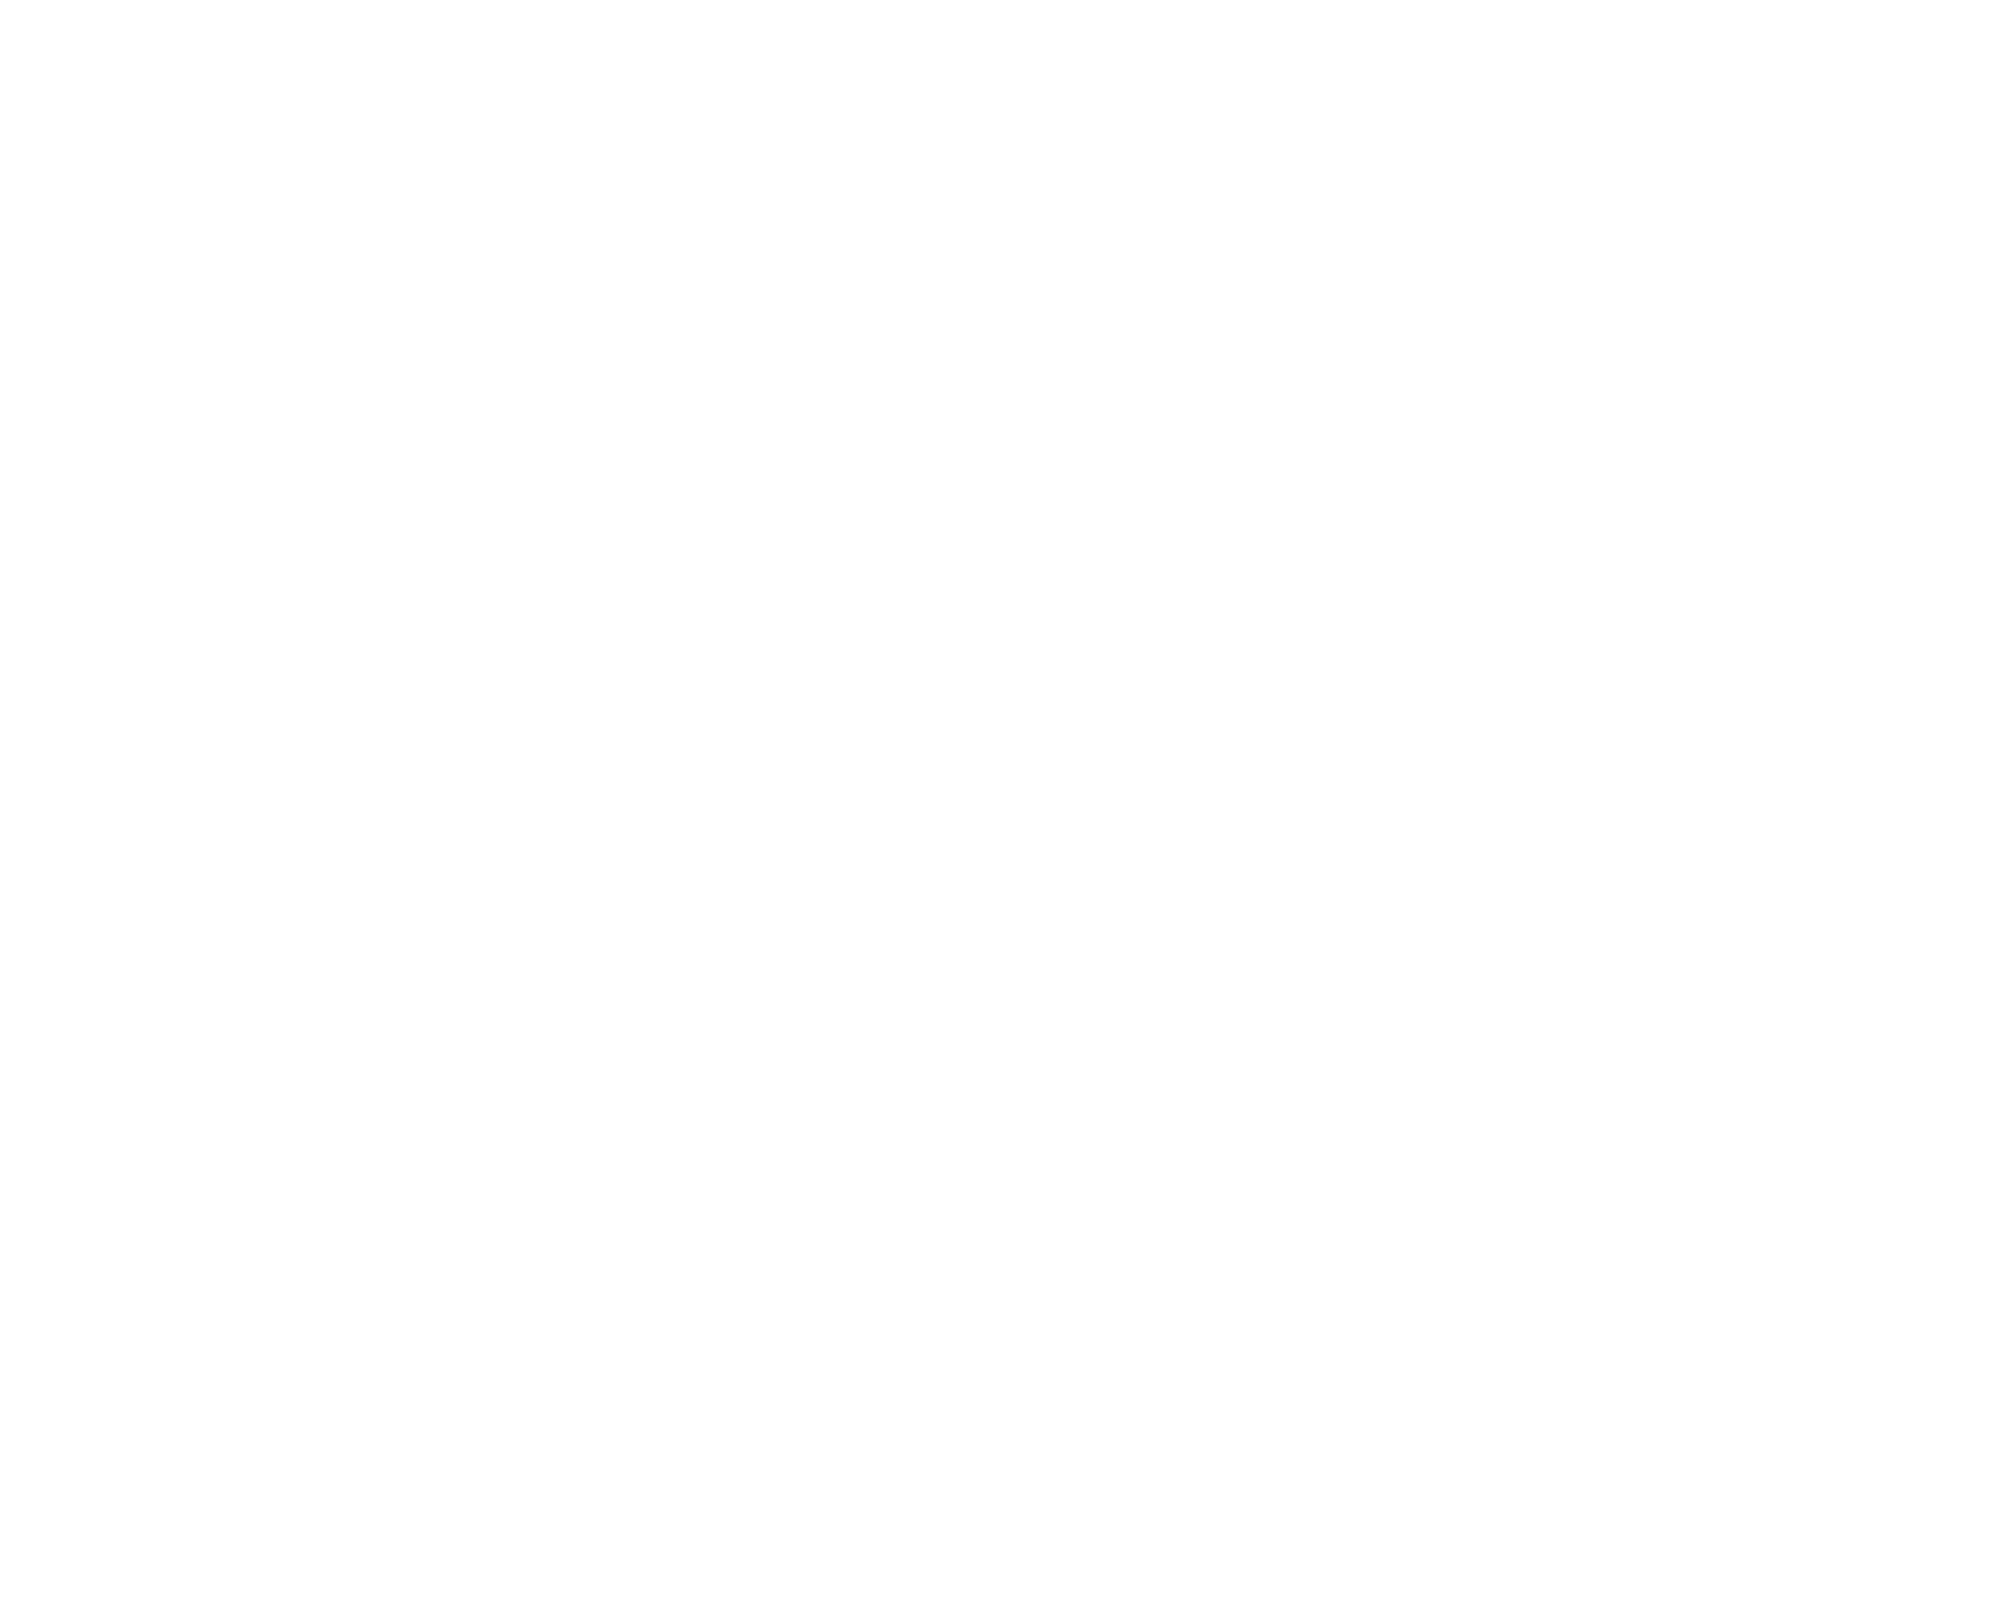

<IPython.core.display.Javascript object>


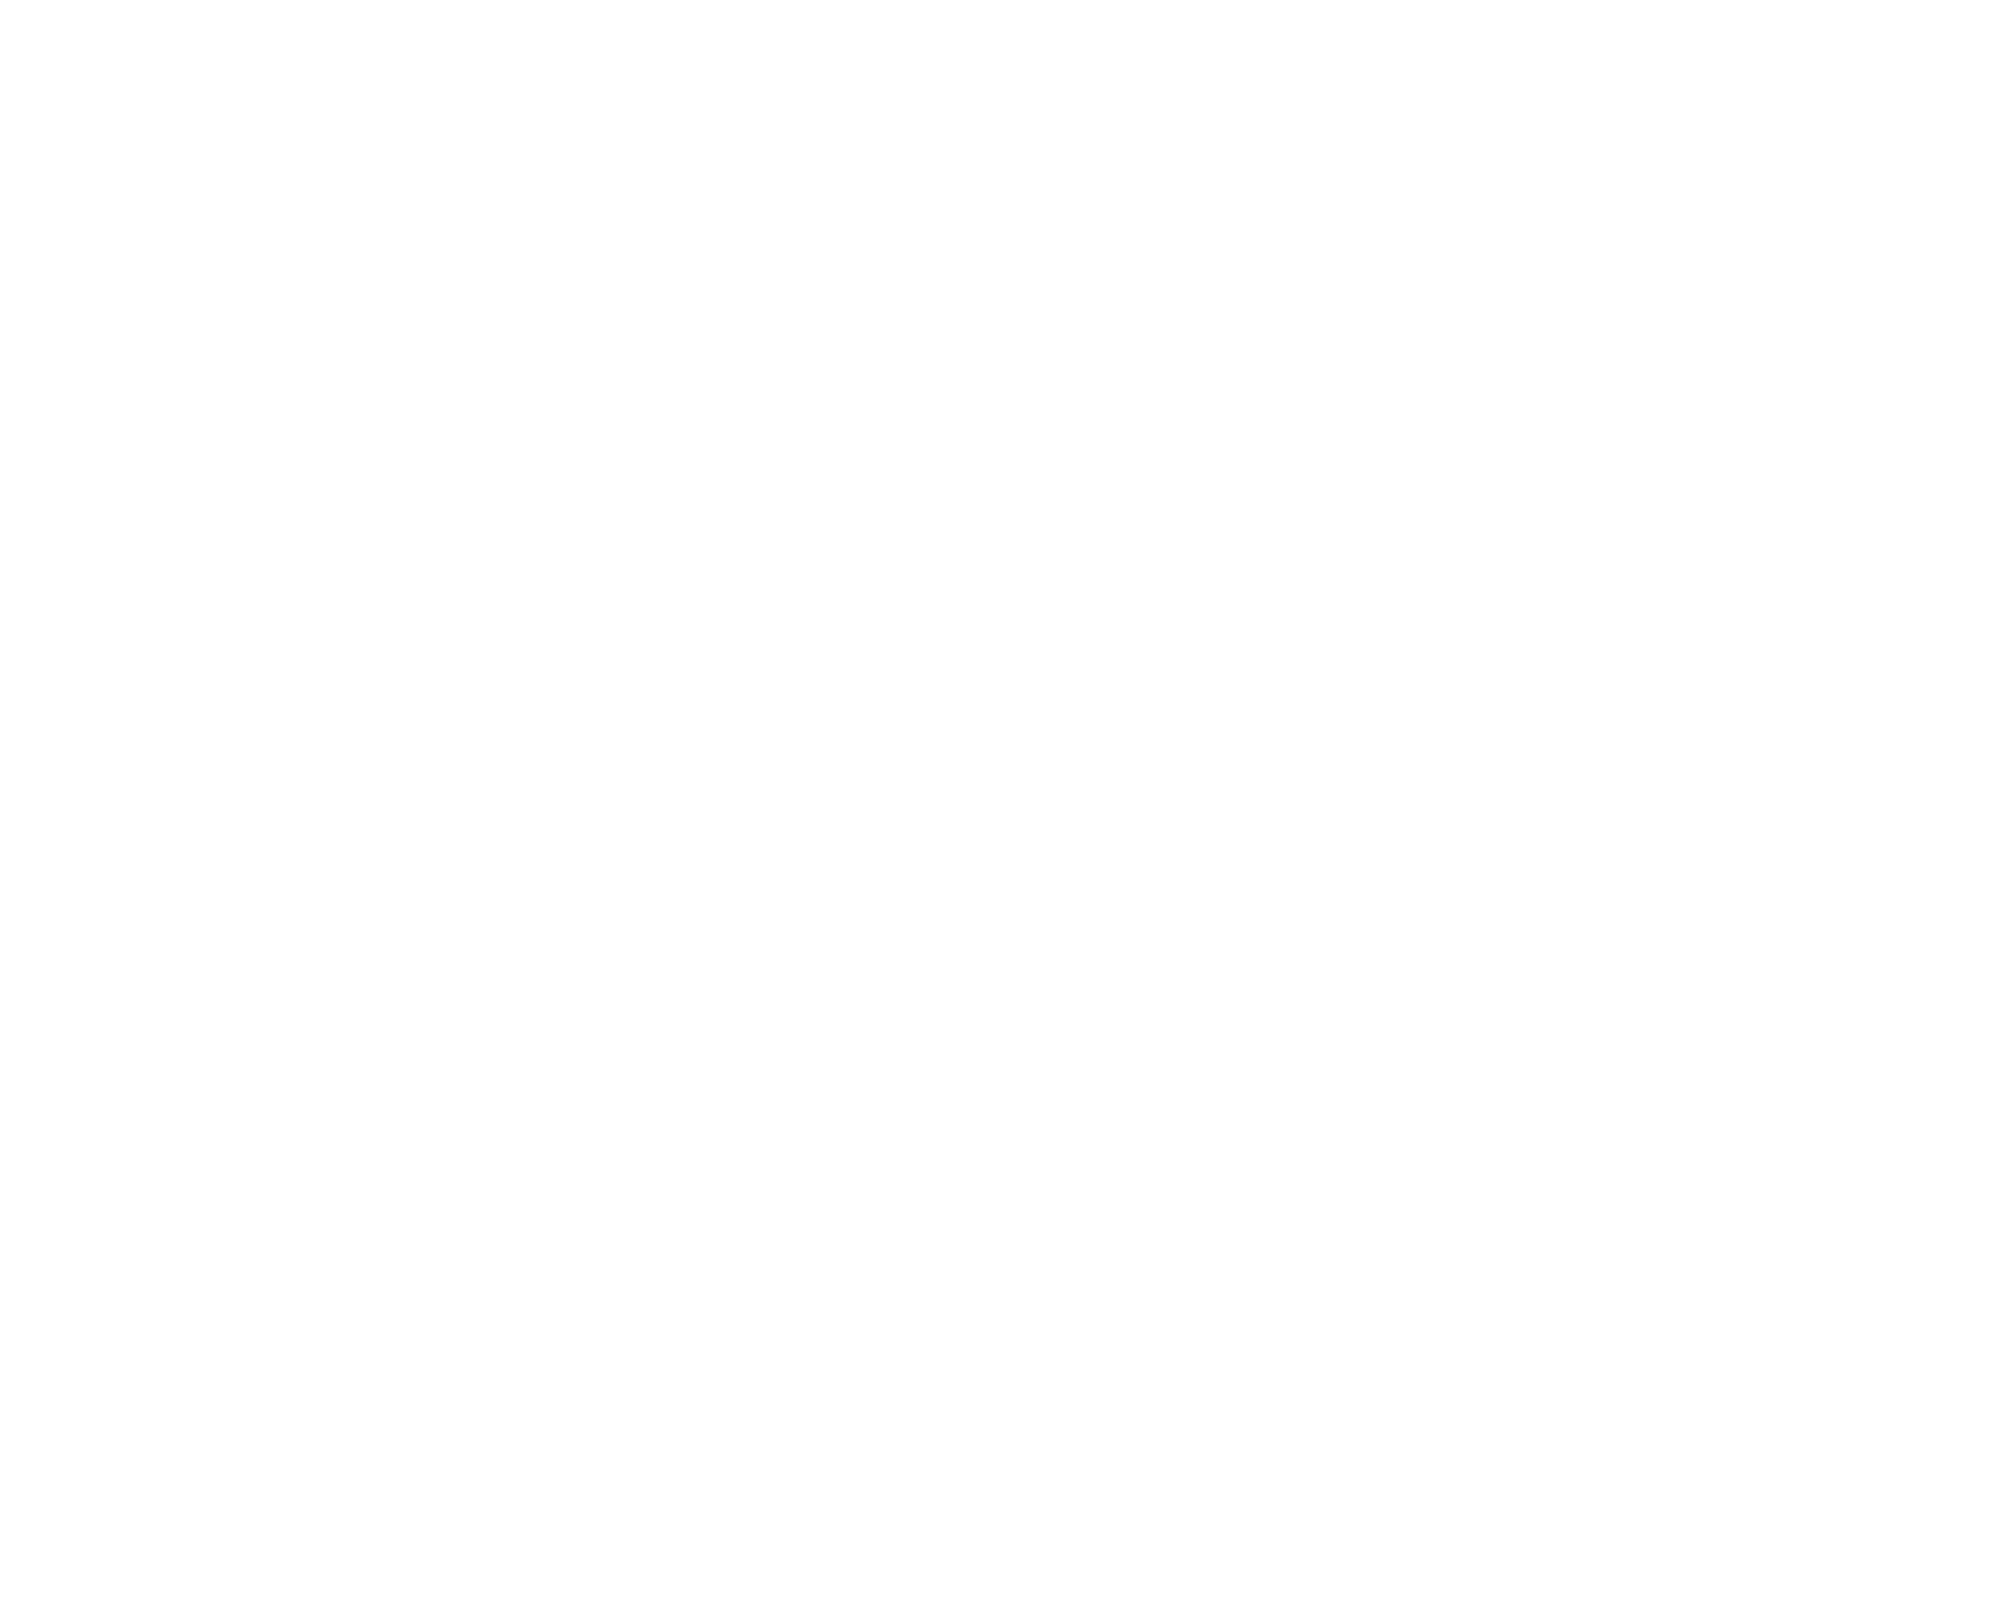

<IPython.core.display.Javascript object>


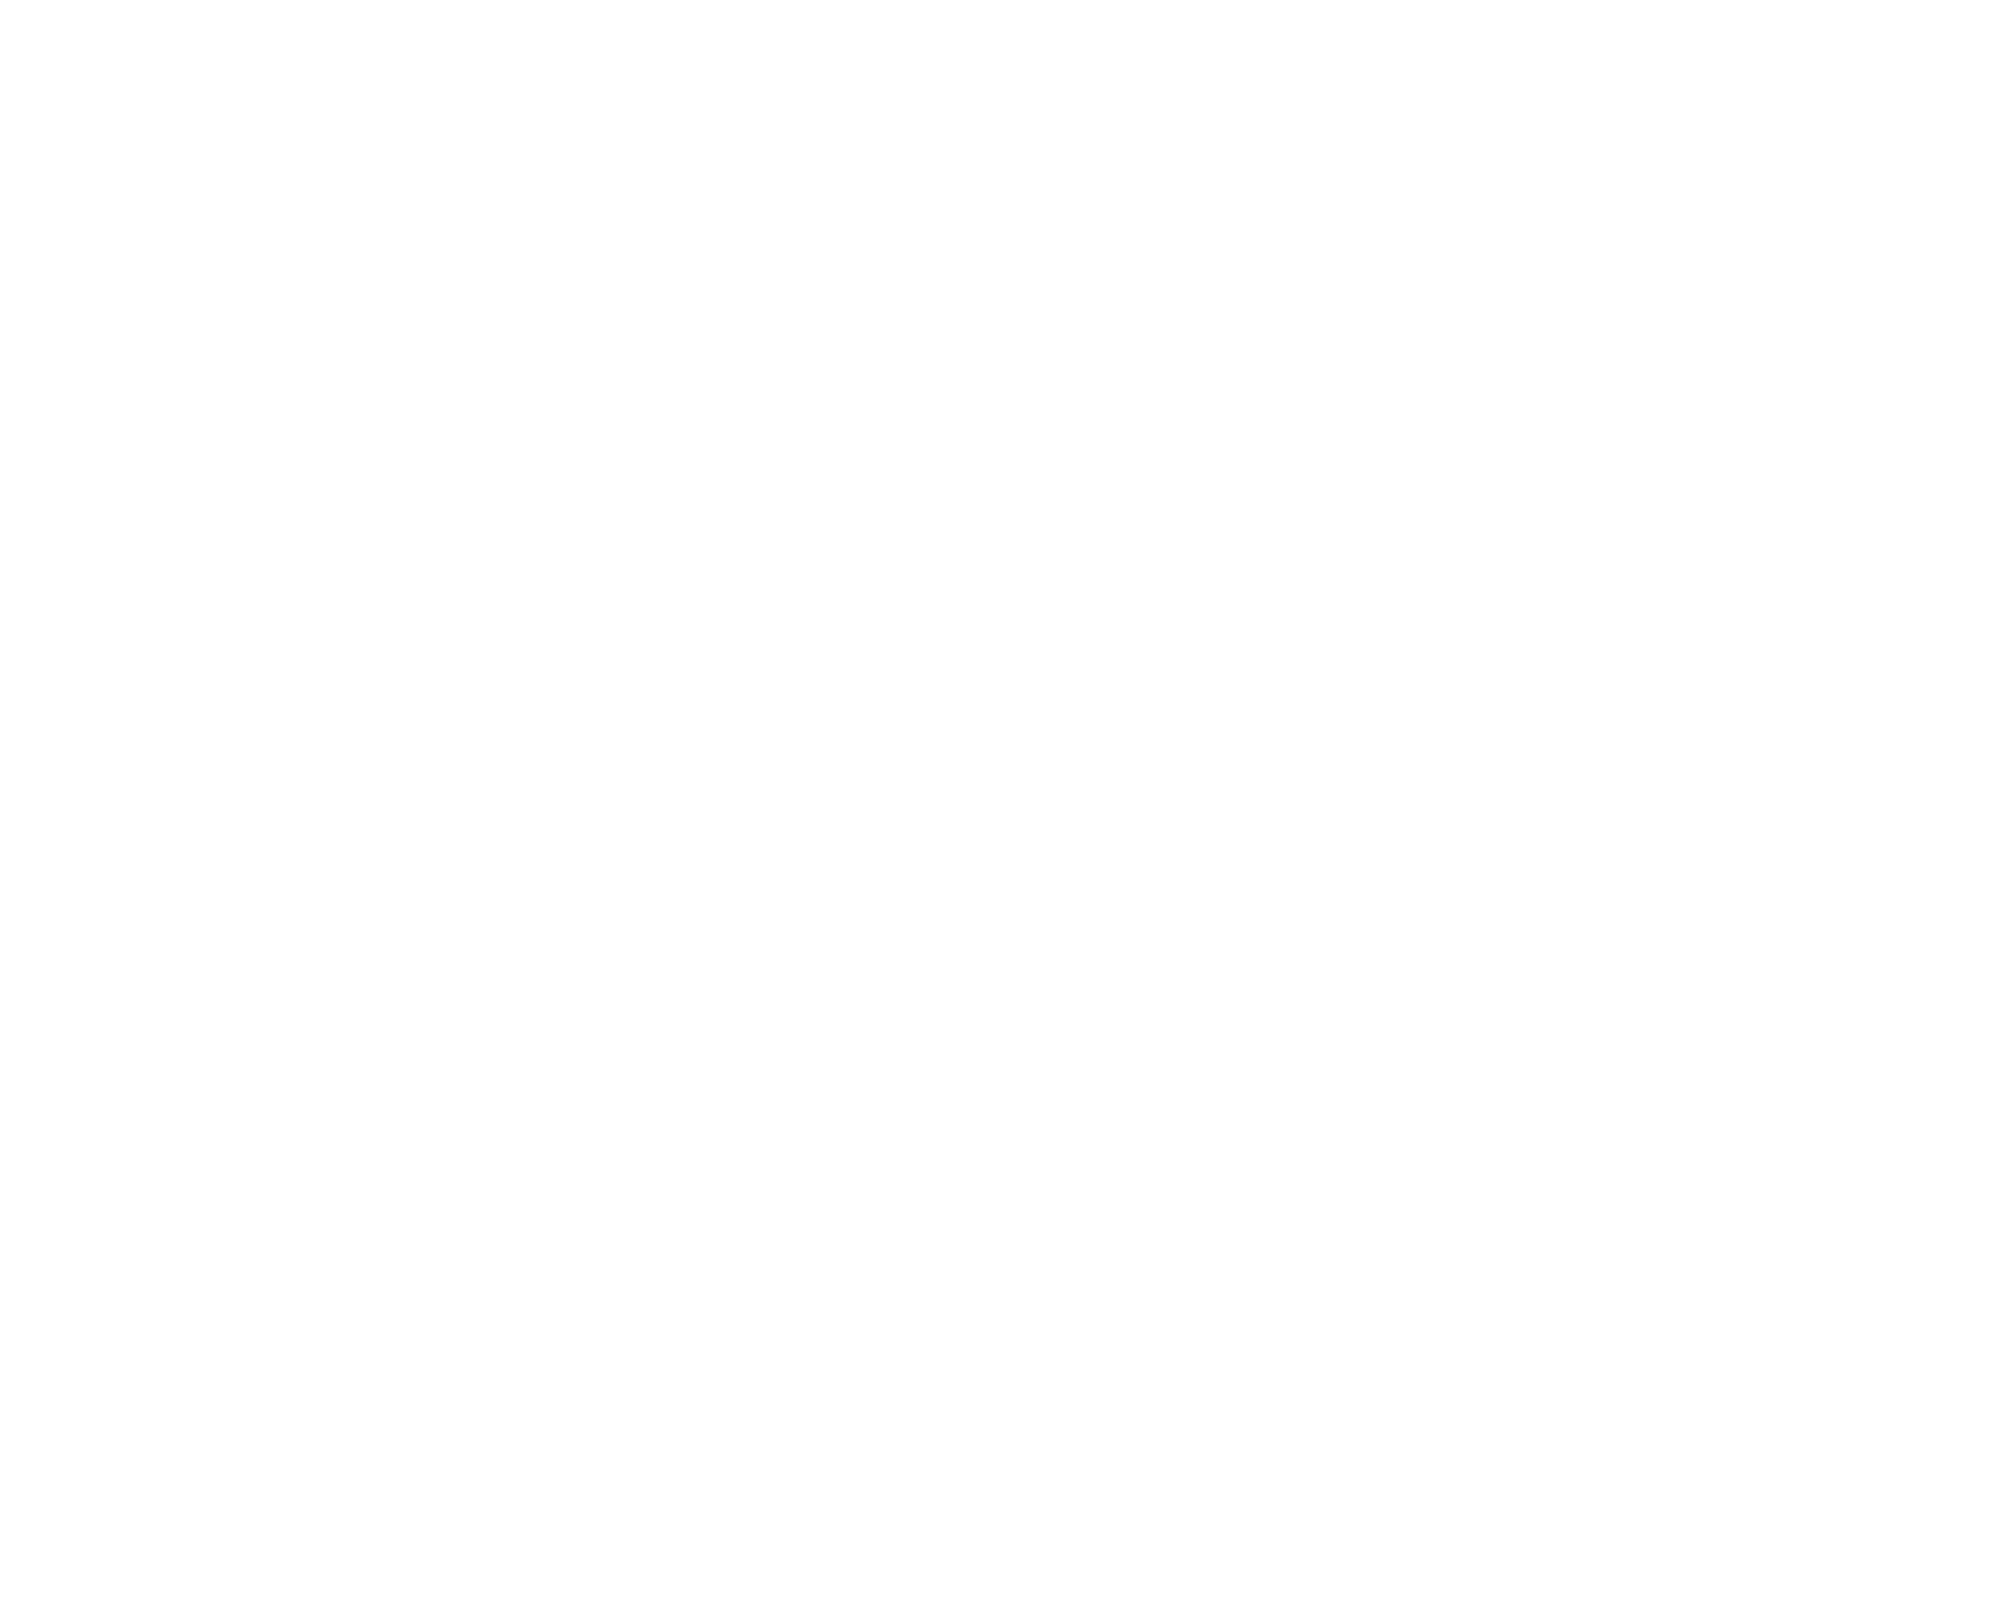

<IPython.core.display.Javascript object>


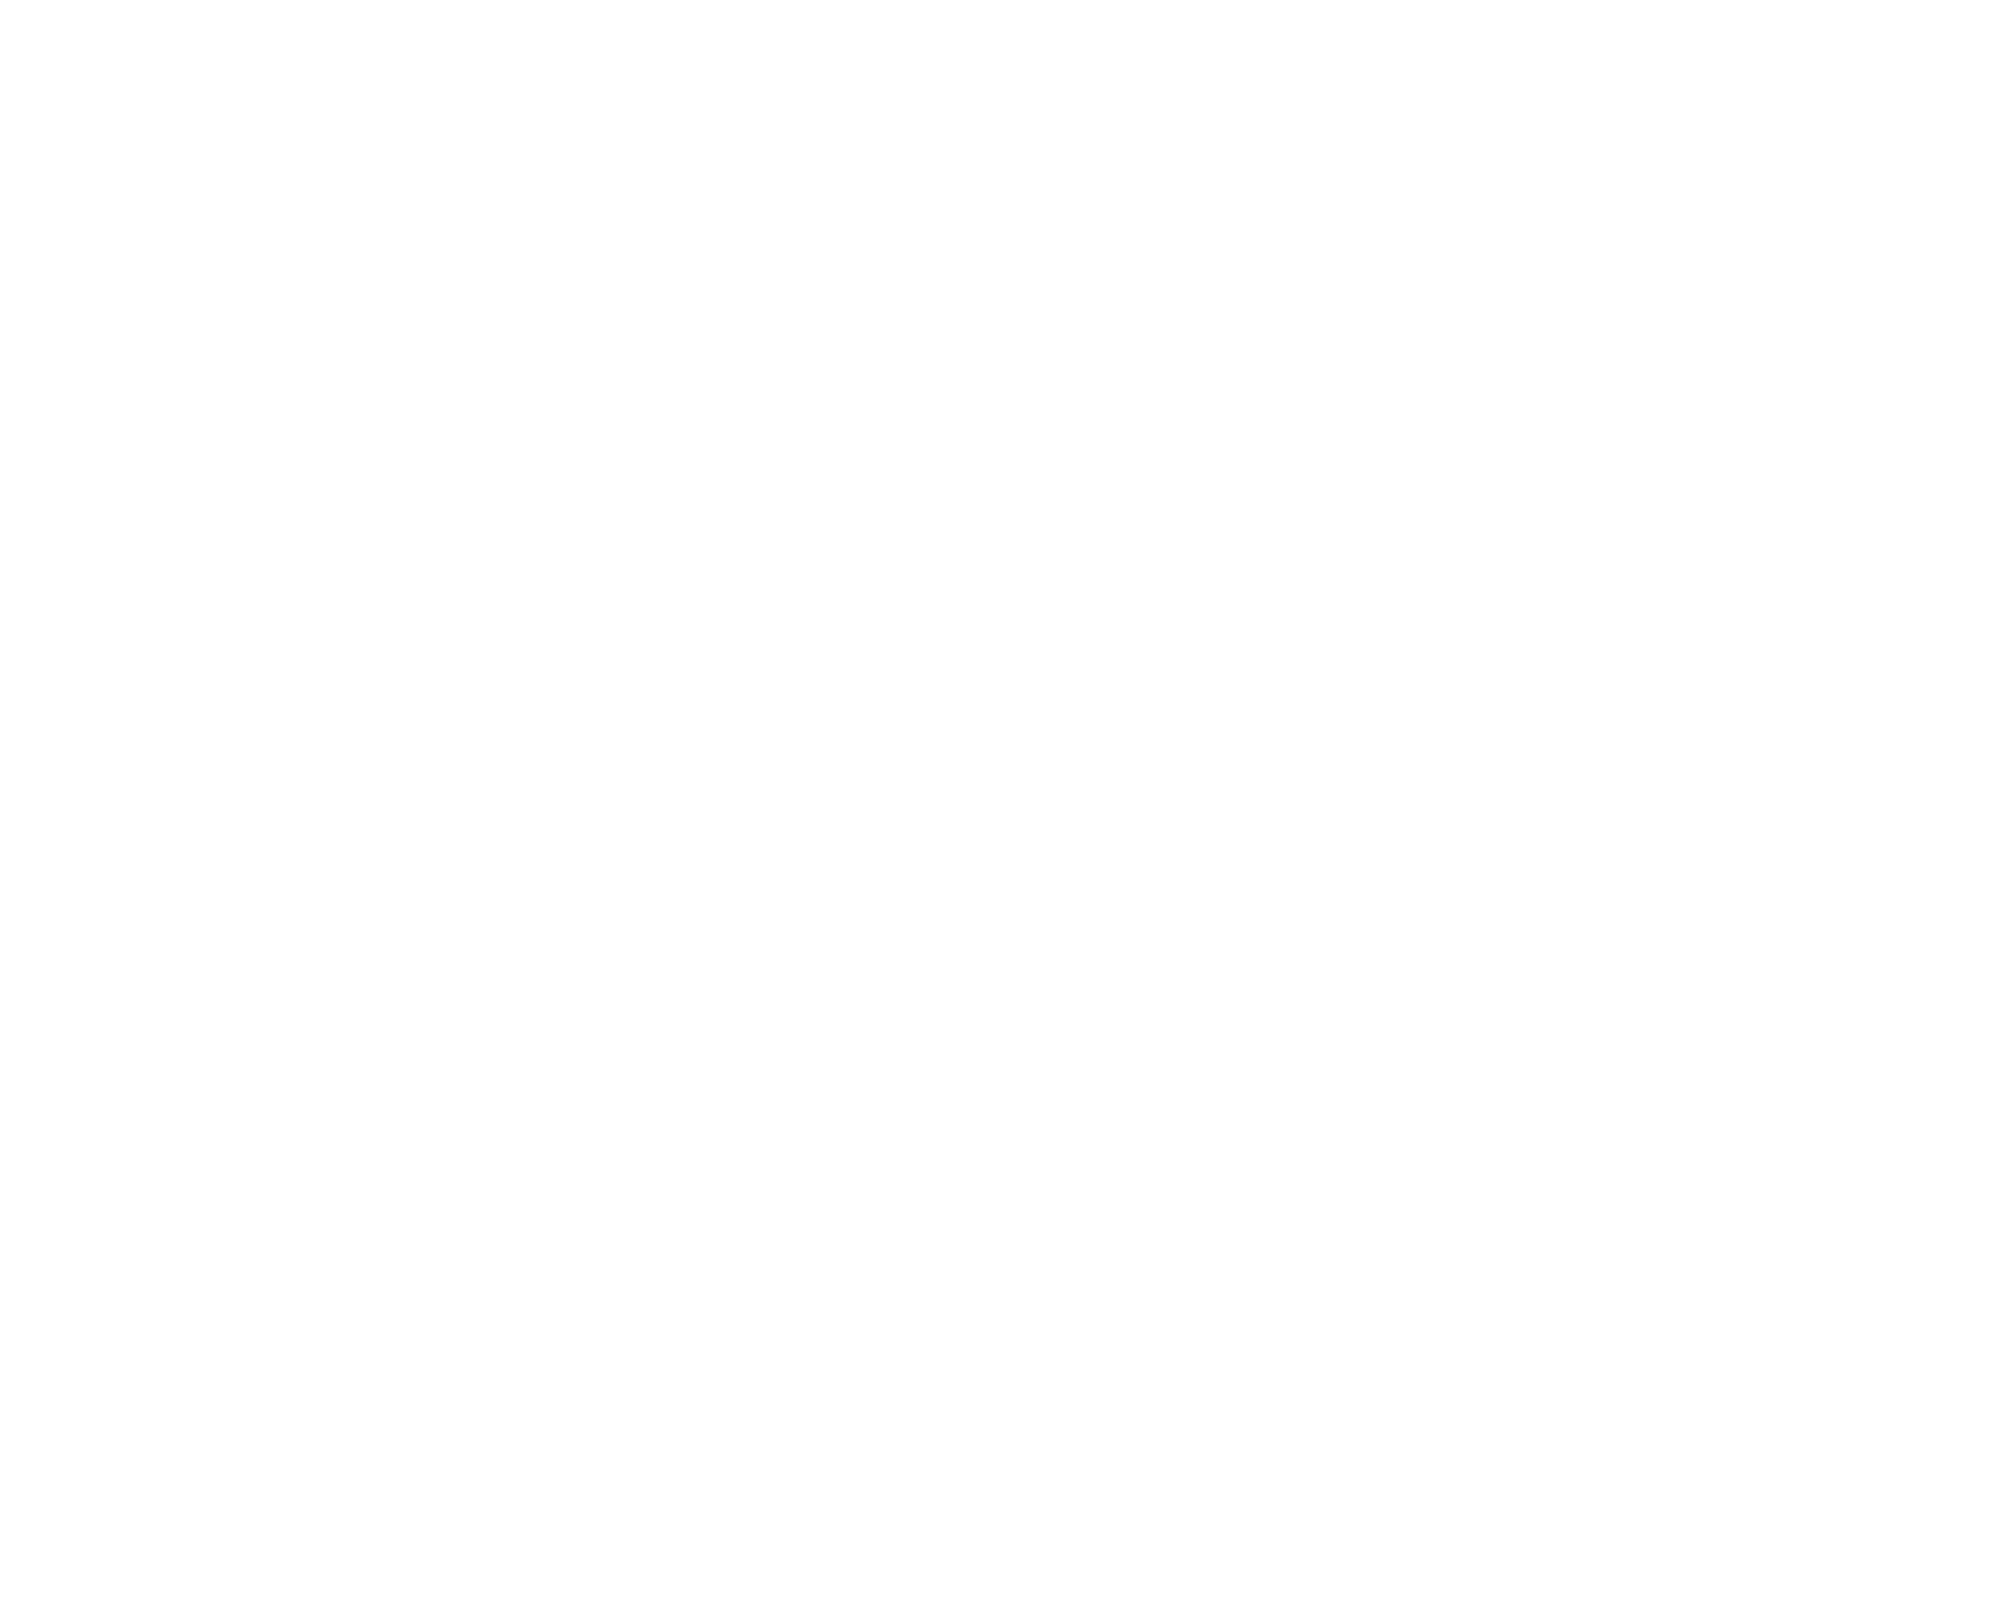

<IPython.core.display.Javascript object>


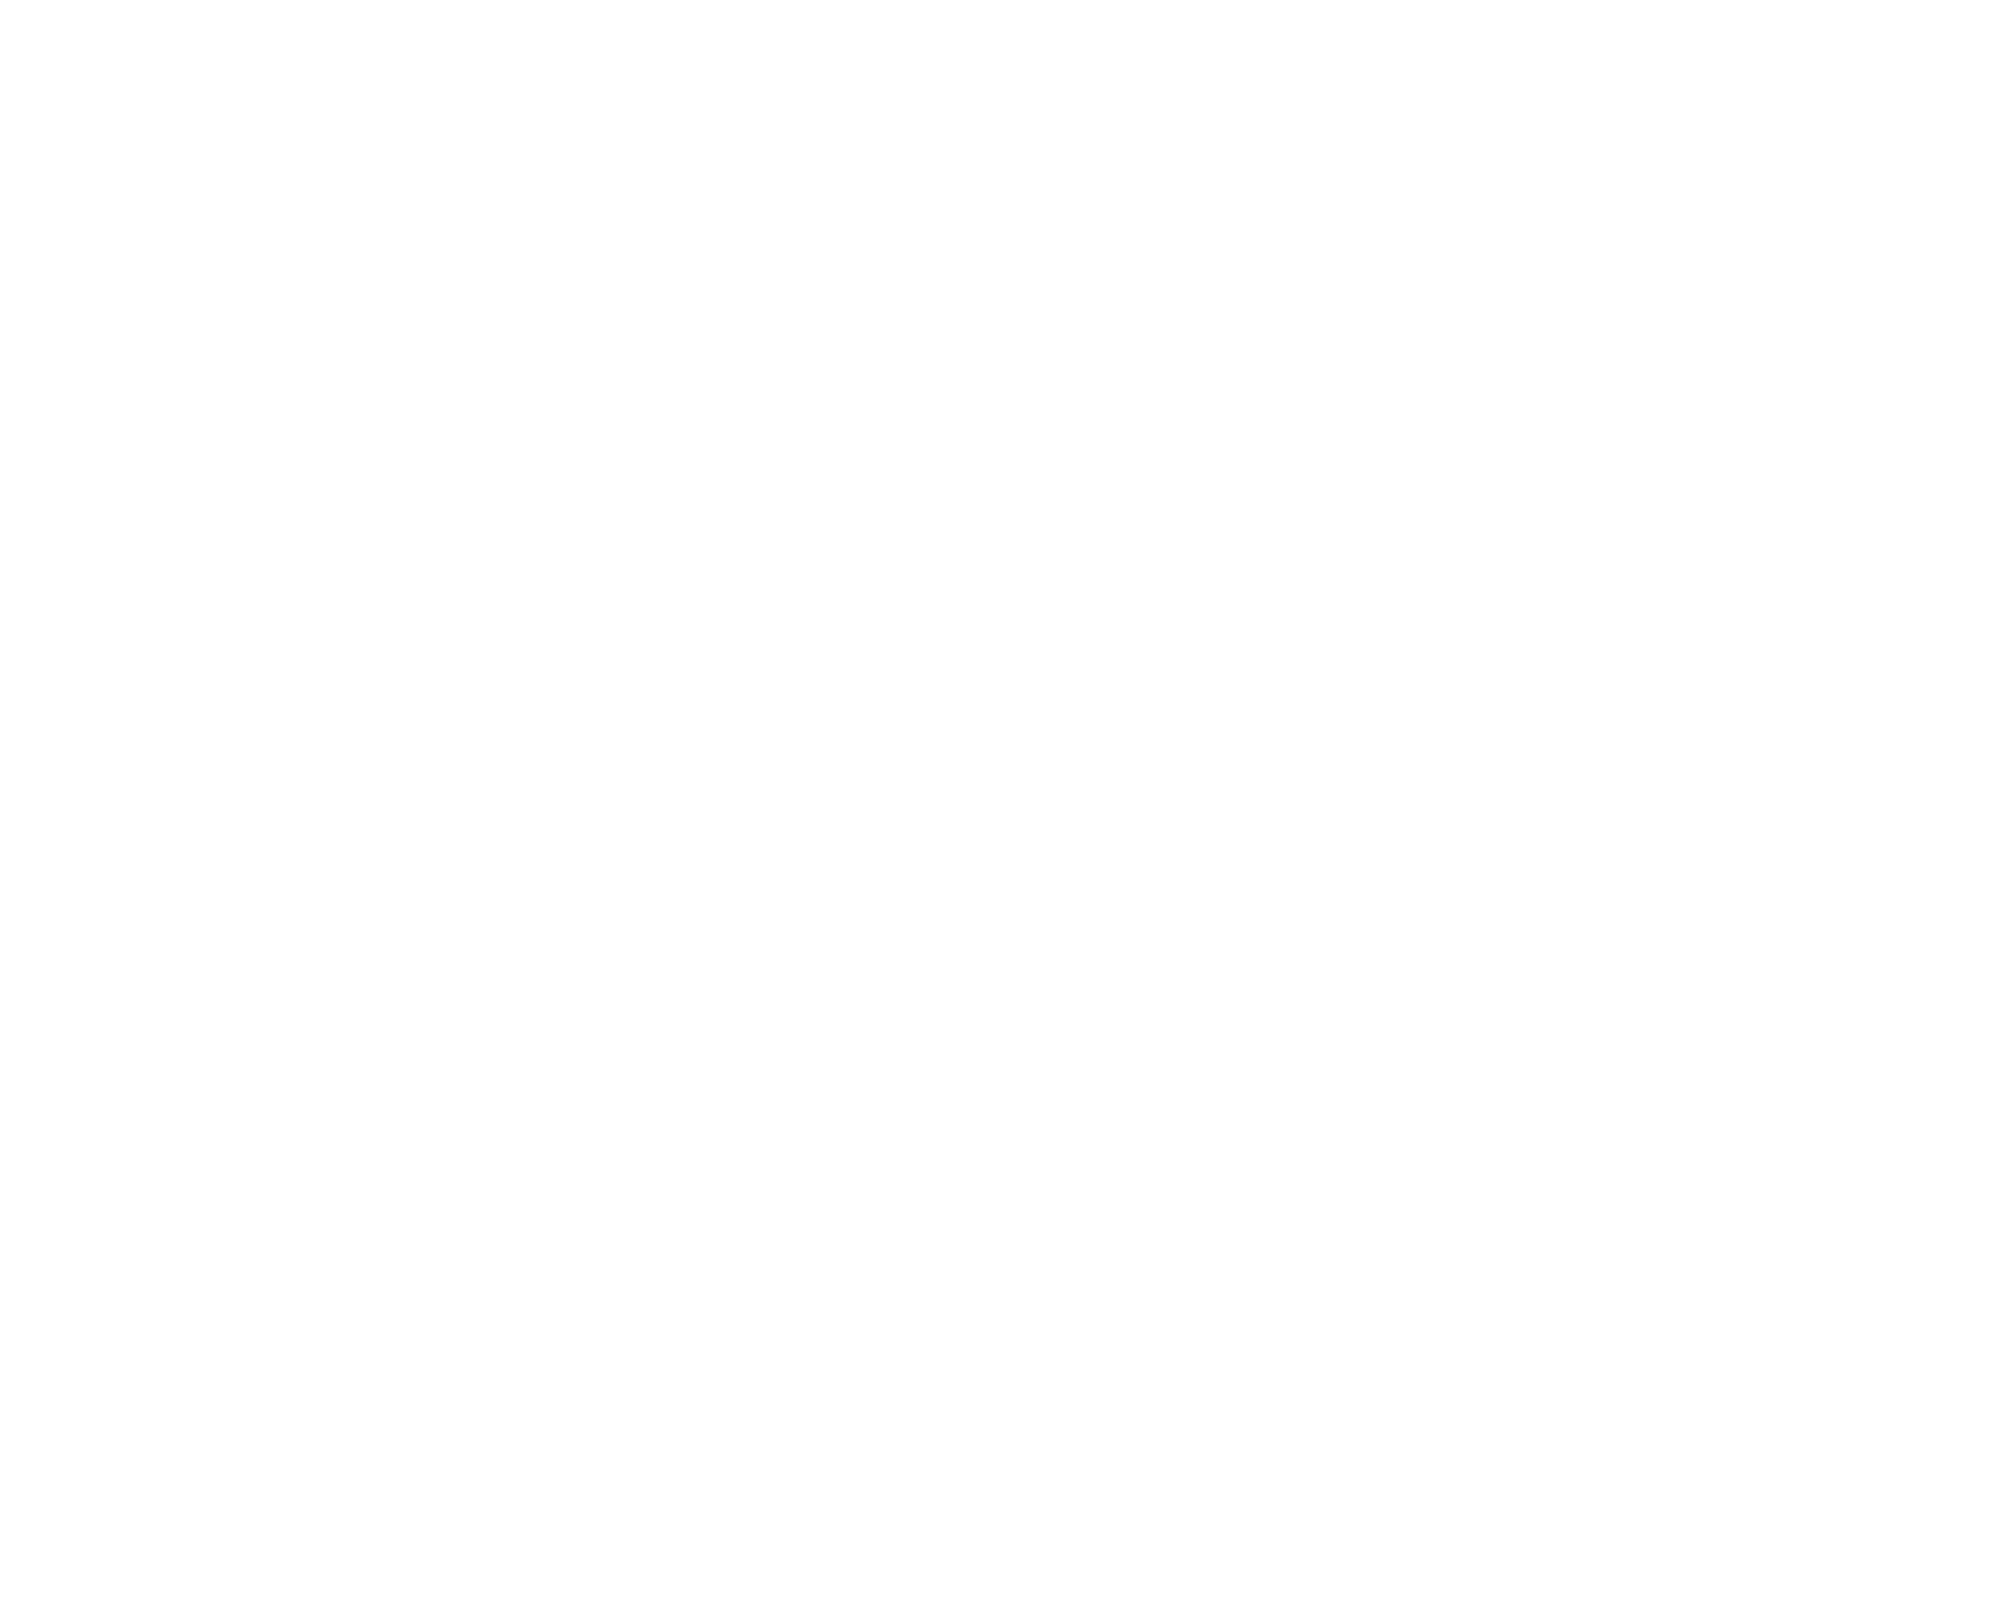

<IPython.core.display.Javascript object>


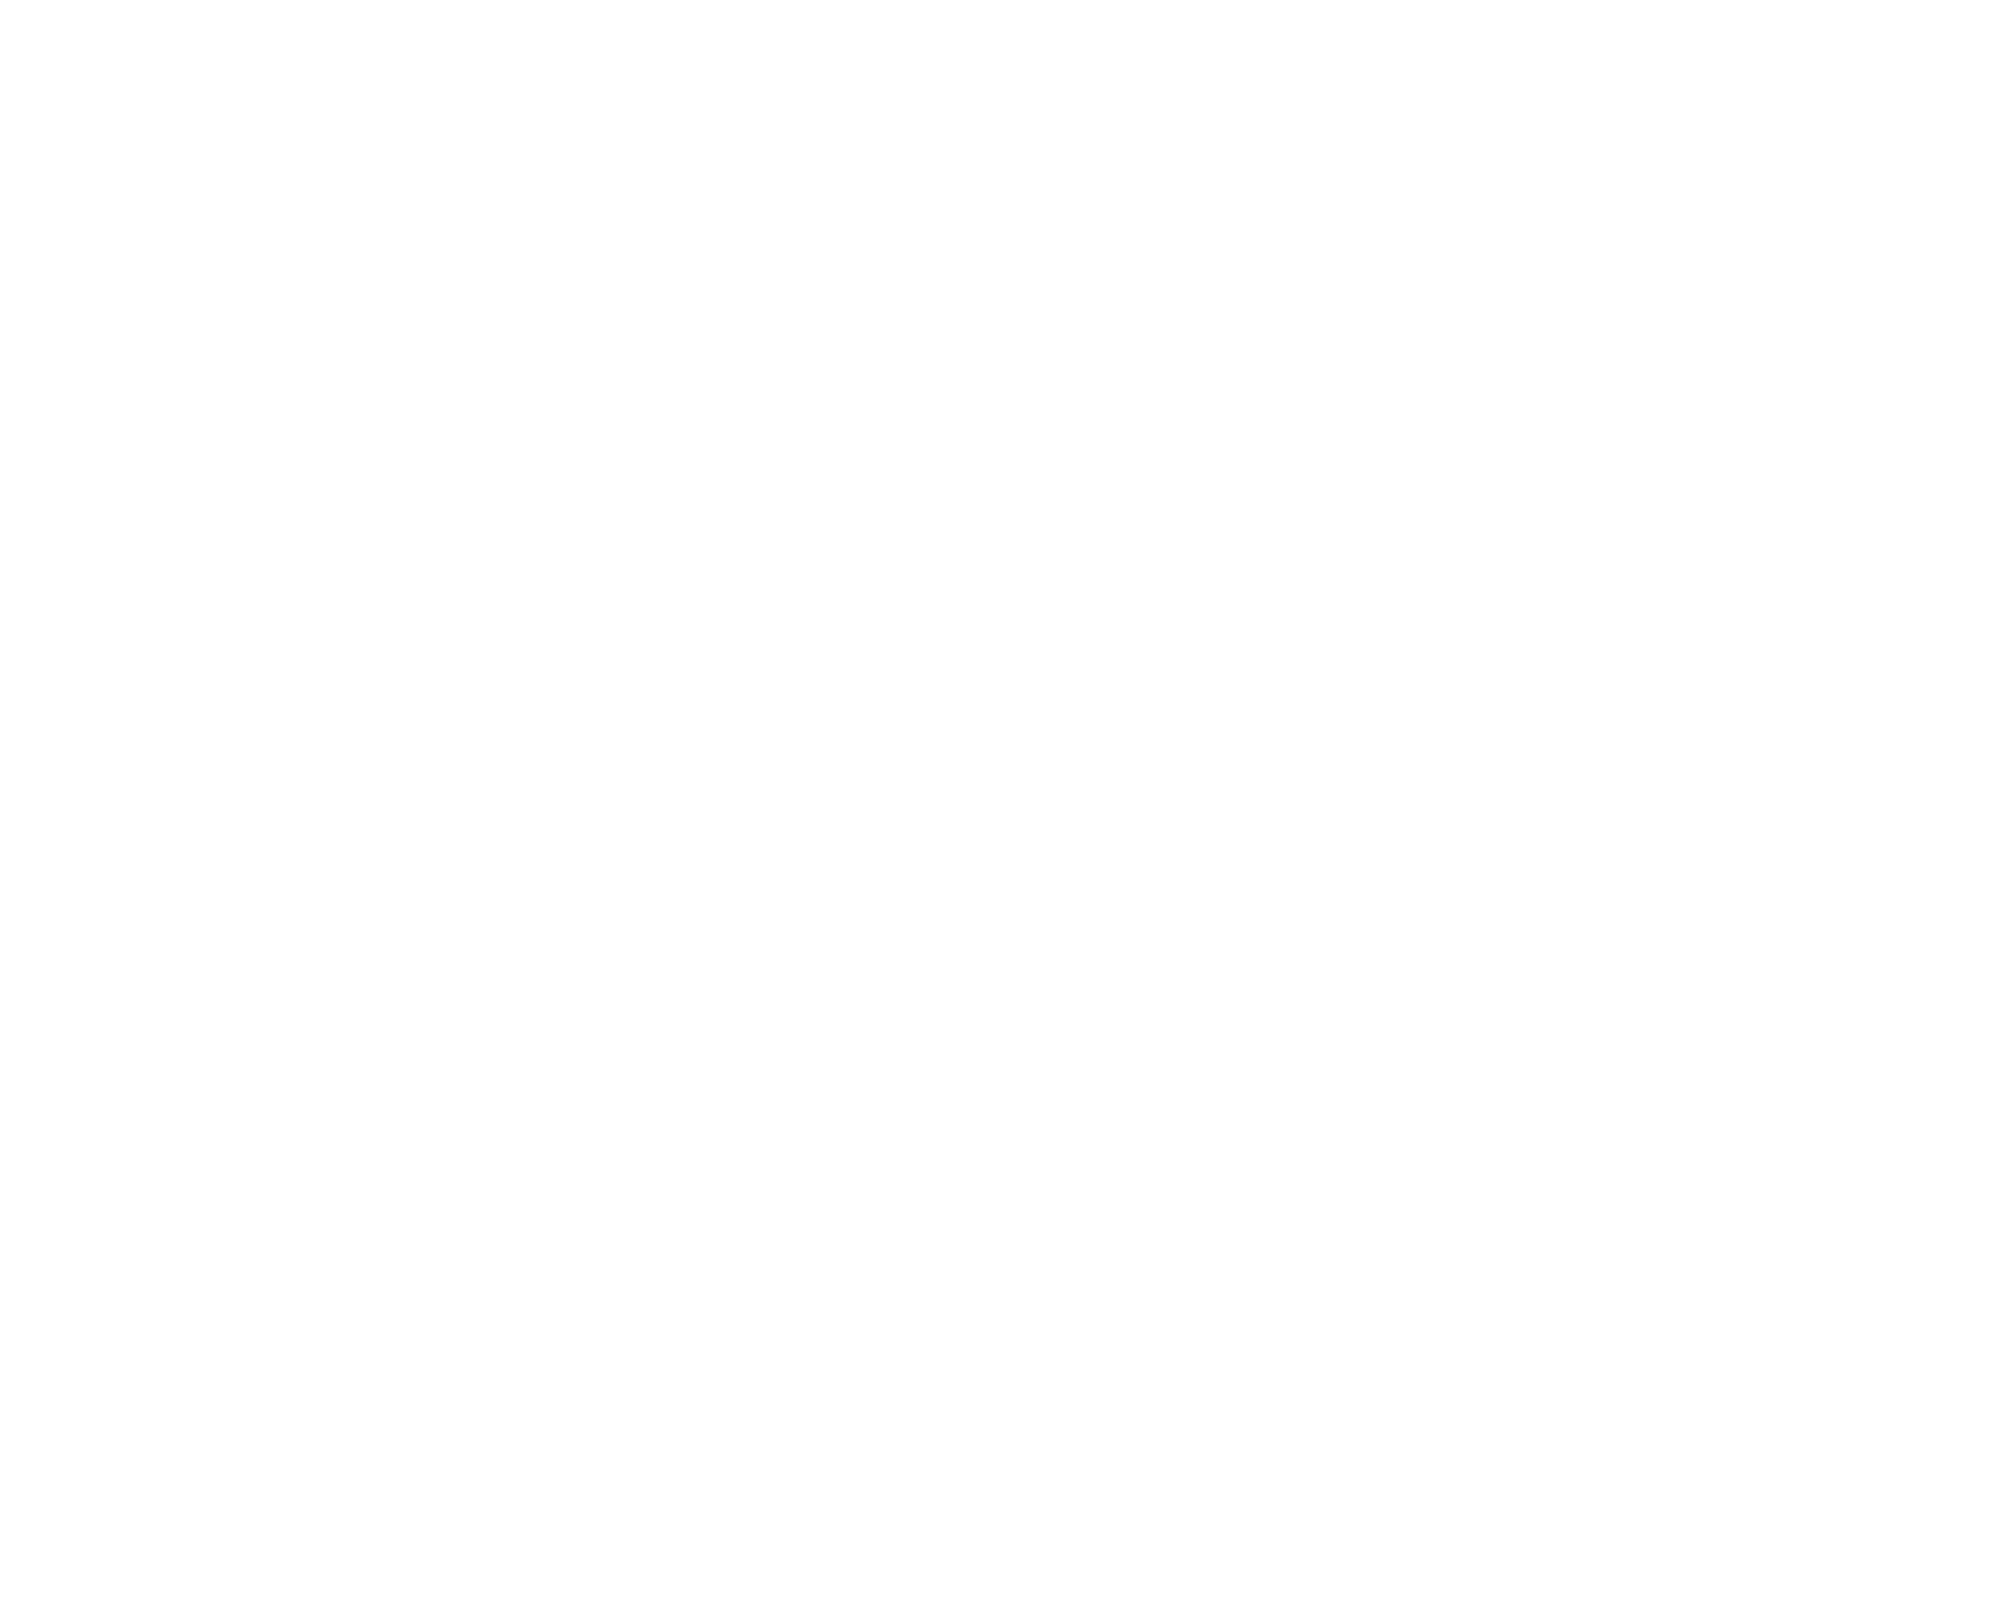

In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import datetime

%matplotlib notebook

from IPython.display import display, HTML


one_drive_folder = "../Incident Prediction"

# Location on oOneDrive of PD input data and location where we want to save generated files
pd_data_input = "/pagerduty_Incident_data/incidents/"
pd_data_output ="/pagerduty_Incident_data/generated/"

input_directory = one_drive_folder + pd_data_input
output_directory = one_drive_folder + pd_data_output

incidents = pd.DataFrame(columns=['id', 'incident_number', 'description', 'service_id', 'service_name',
                           'escalation_policy_id','escalation_policy_name','created_on', 'resolved_on'
                           'seconds_to_first_ack','seconds_to_resolve', 'auto_resolved', 
                           'escalation_count', 'auto_escalation_count', 'acknowledge_count',
                           'assignment_count', 'acknowledged_by_user_ids','acknowledged_by_user_names', 
                           'assigned_to_user_ids','resolved_by_user_id','urgency'])

#pre-processing of Pagerduty incides data starts here
#loading the Pagerduty incidents data
for root,dirs,files in os.walk(input_directory):
    for file in files:
        temp = pd.read_csv(input_directory + file)
        incidents = incidents.append(temp)
incidents.to_csv(output_directory + "all.csv")

# comnine PD data
all = pd.read_csv(output_directory + "all.csv")
compact = all[['created_on','resolved_on','service_name','description','seconds_to_resolve','urgency']].copy()
compact['created_date'] = [datetime.datetime.date(pd.to_datetime(d,utc=True)) for d in compact['created_on']]
compact['created_time'] = [datetime.datetime.time(pd.to_datetime(d,utc=True)) for d in compact['created_on']]
compact['created_datetime'] = [pd.to_datetime(d,utc=True) for d in compact['created_on']]
compact_datetime = compact

#cleanup PD data
temp1 = compact_datetime[~compact_datetime.service_name.str.contains("BCOM")]
temp2 = temp1[~temp1.service_name.str.contains("STARS")]
temp3 = temp2[~temp2.service_name.str.contains("DaaS")]
temp4 = temp3[~temp3.service_name.str.contains("EDPOC")]
temp5 = temp4[~temp4.service_name.str.contains("TEST")]
temp6 = temp5[~temp5.service_name.str.contains("perf tasks")]
temp7 = temp6[~temp6.service_name.str.contains("escalation")]
temp8 = temp7[~temp7.service_name.str.contains("prometheus")]
temp9 = temp8[~temp8.service_name.str.contains("stella")]
temp10 = temp9[~temp9.service_name.str.contains("Stackdriver")]
temp11 = temp10[~temp10.service_name.str.contains("Test")]
temp12 = temp11[~temp11.service_name.str.contains("EMLP")]
temp13 = temp12[~temp12.service_name.str.contains("testing")]
temp14 = temp13[~temp13.service_name.str.contains("Demo")]
temp15 = temp14[~temp14.service_name.str.contains("Default")]
temp16 = temp15[~temp15.service_name.str.contains("Escalation")]
temp17 = temp16[~temp16.service_name.str.contains("Escalations")]
filtered_incidents = temp17[~temp17.service_name.str.contains("Perf")]
filtered_pd_incidents = filtered_incidents
servicenames = filtered_pd_incidents.service_name.unique()

#Loading JIRA tickets data
jira_data_input = "/JIRA/"
input_directory = one_drive_folder + jira_data_input 
all_jira = pd.read_csv(input_directory + "jira_filtered.csv")
all_jira.set_index('Created')

#pre-process JIRA data
sev_compact = all_jira[['Created','Summary','Description','Custom field (Brand)','Custom field (Channel)','Custom field (Component)', 'Issue key']].copy()
sev_compact['jira_ticket'] = sev_compact['Issue key'].astype(str)
del sev_compact['Issue key']
sev_compact['created_date'] = [datetime.datetime.date(pd.to_datetime(d,utc=True)) for d in sev_compact['Created']]
sev_compact['created_time'] = [datetime.datetime.time(pd.to_datetime(d,utc=True)) for d in sev_compact['Created']]
sev_compact['created_datetime'] = [pd.to_datetime(d,utc=True) for d in sev_compact['Created']]
sev_compact['service_name'] = ['jira_sev1_issue' for d in sev_compact['Created']]
sev_compact['description'] = [sev_compact['Description'] for d in sev_compact['Description']]
sev_compact.set_index('created_date')
sev_compact_datetime = sev_compact
tempj1 = sev_compact_datetime[~sev_compact_datetime['Custom field (Component)'].str.contains("MSP-Order")]
order_to_batch_jira = tempj1[~tempj1['Summary'].str.contains("Orders To Batch")]
order_to_batch_jira_sab = order_to_batch_jira
jira_otb = order_to_batch_jira
del jira_otb['description']
del jira_otb['Description']

# function definition - which will take a list of JIRA issues, PD incidents and time frame as parameters 
#                       and generates graphs for each jira issue over the specified timeframe. 
def plot_jira_vs_incidents(jira_issues, pd_incidents, relative_time_window, output_folder):
    #jira_issues -> pre-processed pandas dataframe at least with columns "created_datetime" and "service_name"
                #"created_datetime" -> jira issue created timestamp
    #pd_incidents -> pre-processed pandas dataframe at least with columns "created_datetime", "service_name", "service_name", "description", 
                #relative_time_window -> integer value, this value will be used to decide how many units of time to go 
                #before and after of an JIRA issue's timestamp to look for pd incidents
    #output_folder -> to save generated charts
    
    import pandasql as ps
    import numpy as np

    jira_issues['created_datetime_plus'] = jira_issues.created_datetime + pd.DateOffset(hours=relative_time_window)
    jira_issues['created_datetime_minus'] = jira_issues.created_datetime - pd.DateOffset(hours=relative_time_window)
    
    sqlcode = '''
    select  pd_incidents.service_name pd_service_name, 
            pd_incidents.description pd_description,
            pd_incidents.created_datetime pd_created_datetime,
            jira_issues.created_datetime jira_created_datetime,
            jira_issues.service_name jira_service_name,
            jira_issues.jira_ticket jira_ticket
    from jira_issues
    left outer join pd_incidents on pd_incidents.created_datetime >= jira_issues.created_datetime_minus 
    and pd_incidents.created_datetime <= jira_issues.created_datetime_plus
    '''
    combined = ps.sqldf(sqlcode,locals())
    combined = combined.mask(combined.eq('None')).dropna()
    combined['pd_created_datetime'] = [pd.to_datetime(d,utc=True) for d in combined['pd_created_datetime']]
    combined['jira_created_datetime'] = [pd.to_datetime(d,utc=True) for d in combined['jira_created_datetime']]
    
    figs = []
    axs = []
    i=0
    jiraissuetimestamps = combined['jira_created_datetime'].unique()
    for jiraissuetimestamp in jiraissuetimestamps:
        fig, ax = plt.subplots()
        figs.append(fig)
        axs.append(ax)
        figs[i].set_figheight(8)
        figs[i].set_figwidth(10)
        figs[i].subplots_adjust(top=0.90)
        #print(jiraissuetimestamp)
        mask = (combined['jira_created_datetime'] == jiraissuetimestamp)
        combined_filtered = combined.loc[mask]
        jiraticket = combined_filtered.jira_ticket.unique()
        figs[i].suptitle('JIRA Ticket ' + str(jiraticket[0]) + ' Vs PagerDuty Incidents', fontweight='bold', fontsize=8)
        jira_grouped = combined_filtered.groupby(['jira_created_datetime','jira_service_name']).count()['pd_description'].reset_index()
        pd_incidents_grouped = combined_filtered.groupby(['pd_created_datetime','pd_service_name']).count()['pd_description'].reset_index().sort_values('pd_service_name', ascending=True)
        jira_plus_pd_grouped = pd_incidents_grouped.append(jira_grouped)

        jiraservicenamelist = jira_grouped.jira_service_name.unique()
        pdservicenamelist = pd_incidents_grouped.pd_service_name.unique()

        for servicename in pdservicenamelist:
            color = 'blue'
            scale = 3
            axs[i].margins(x=-0.001, y=0)
            axs[i].scatter(pd_incidents_grouped['pd_created_datetime'],pd_incidents_grouped['pd_service_name'],c=color,s=scale)
        for servicename in jiraservicenamelist:
            color = 'red'
            scale = 100
            axs[i].margins(x=-0.001, y=0)
            axs[i].scatter(jira_grouped['jira_created_datetime'],jira_grouped['jira_service_name'],c=color,s=scale)
        axs[i].set_title('JIRA Ticket Timestamp: ' + str(jiraissuetimestamp),fontsize=7)    
        axs[i].grid(True)  
        for tick in axs[i].xaxis.get_major_ticks():
                tick.label.set_fontsize(5)  
                tick.label.set_rotation('45')
        for tick in axs[i].yaxis.get_major_ticks():
                tick.label.set_fontsize(5)  
                tick.label.set_rotation('45')

        axs[i].set_ylabel('PagerDuty Service Names \n',horizontalalignment='left', fontweight='bold', fontsize=7)
        axs[i].set_xlabel('\n Timestamps',horizontalalignment='left', fontweight='bold', fontsize=7)
        axs[i].set_xlabel('\n Timestamps',horizontalalignment='left', fontweight='bold', fontsize=7)
        plt.savefig(output_directory + 'JIRA_Ticket_' + str(jiraticket[0]) + '.png')
        i=i+1
        
# call the function by passing pre-processed dataframes
plot_jira_vs_incidents(jira_otb,filtered_incidents, 1,output_directory)
